# **Aravindan N's Machine Learning Project Notebook**

In [1]:
# Import the necessarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
import warnings
from scipy.stats import zscore
warnings.filterwarnings("ignore")

## **Problem 1**

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### **1.1. Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.**

In [2]:
# Load the datset
election_df = pd.read_excel('Election_Data.xlsx', sheet_name=1)
election_df.head()

Unnamed: 0    vote  age  ...  Europe  political.knowledge  gender
0           1  Labour   43  ...       2                    2  female
1           2  Labour   36  ...       5                    2    male
2           3  Labour   35  ...       3                    2    male
3           4  Labour   24  ...       4                    0  female
4           5  Labour   41  ...       6                    2    male

[5 rows x 10 columns]

In [3]:
# Drop the unnamed column 
election_df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
election_df.head()

vote  age  economic.cond.national  ...  Europe  political.knowledge  gender
0  Labour   43                       3  ...       2                    2  female
1  Labour   36                       4  ...       5                    2    male
2  Labour   35                       4  ...       3                    2    male
3  Labour   24                       4  ...       4                    0  female
4  Labour   41                       2  ...       6                    2    male

[5 rows x 9 columns]

In [ ]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [ ]:
election_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [5]:
election_df.duplicated().sum()

8

In [6]:
# Removing duplicate rows
print(f'Shape of the dataset before removing duplicates{election_df.shape}')
election_df.drop_duplicates(inplace=True)
print(f'Shape of the dataset after removing duplicates{election_df.shape}')

Shape of the dataset before removing duplicates(1525, 9)
Shape of the dataset after removing duplicates(1517, 9)


In [7]:
election_df_stat = election_df.describe().T
election_df_stat

count       mean        std  ...   50%   75%   max
age                      1517.0  54.241266  15.701741  ...  53.0  67.0  93.0
economic.cond.national   1517.0   3.245221   0.881792  ...   3.0   4.0   5.0
economic.cond.household  1517.0   3.137772   0.931069  ...   3.0   4.0   5.0
Blair                    1517.0   3.335531   1.174772  ...   4.0   4.0   5.0
Hague                    1517.0   2.749506   1.232479  ...   2.0   4.0   5.0
Europe                   1517.0   6.740277   3.299043  ...   6.0  10.0  11.0
political.knowledge      1517.0   1.540541   1.084417  ...   2.0   2.0   3.0

[7 rows x 8 columns]

In [8]:
election_df_stat['Skew']=election_df.skew(axis=0)
election_df_stat['Kurtosis']=election_df.kurtosis(axis=0)
election_df_stat

count       mean        std  ...   max      Skew  Kurtosis
age                      1517.0  54.241266  15.701741  ...  93.0  0.139800 -0.943708
economic.cond.national   1517.0   3.245221   0.881792  ...   5.0 -0.238474 -0.256575
economic.cond.household  1517.0   3.137772   0.931069  ...   5.0 -0.144148 -0.209035
Blair                    1517.0   3.335531   1.174772  ...   5.0 -0.539514 -1.060248
Hague                    1517.0   2.749506   1.232479  ...   5.0  0.146191 -1.395161
Europe                   1517.0   6.740277   3.299043  ...  11.0 -0.141891 -1.236843
political.knowledge      1517.0   1.540541   1.084417  ...   3.0 -0.422928 -1.222260

[7 rows x 10 columns]

### **1.2. Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.**

#### **Uni-Variate Analysis**

In [9]:
col_list1 = election_df.select_dtypes(['float64', 'int64']).columns.to_list()
col_list2 = election_df.select_dtypes('object').columns.to_list()

In [ ]:
palette1 = itertools.cycle(sns.color_palette(palette='Set1'))
palette1 = itertools.cycle(sns.color_palette(palette='Set2'))

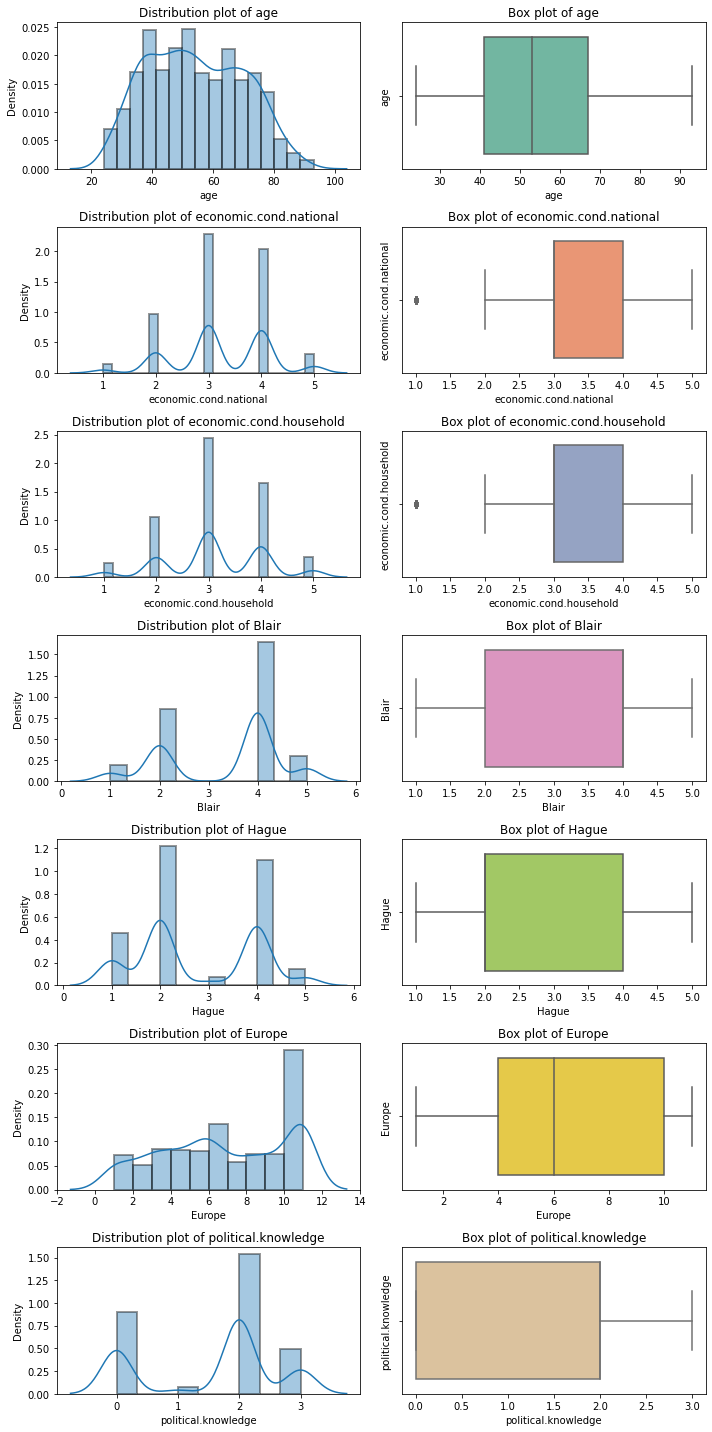

In [ ]:
# Distribution and boxplots of the variables

a = len(election_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(10,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(election_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = election_df[i], orient='h', palette=palette1)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
#Outlier detection from Interquartile range (IQR) in duplicate removed data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

for i in col_list1:
    Q1 = election_df[i].quantile(q=0.25)
    Q3 = election_df[i].quantile(q=0.75)
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in {}: {}'.format(i, L_outliers))
    print('Upper outliers in {}: {}'.format(i, U_outliers),'\n')
    print('Number of outliers in {} upper: {}'.format(i, election_df[election_df[i]>U_outliers][i].count()))
    print('Number of outliers in {} lower: {}'.format(i, election_df[election_df[i]<L_outliers][i].count()),'\n')
    print('% of Outlier in {} upper: {}%'.format(i, round(election_df[election_df[i]>U_outliers][i].count()*100/len(election_df),2)))
    print('% of Outlier in {} lower: {}%'.format(i, round(election_df[election_df[i]<L_outliers][i].count()*100/len(election_df),2)),'\n')
    print('###########################################', '\n')

Lower outliers in age: 2.0
Upper outliers in age: 106.0 

Number of outliers in age upper: 0
Number of outliers in age lower: 0 

% of Outlier in age upper: 0.0%
% of Outlier in age lower: 0.0% 

########################################### 

Lower outliers in economic.cond.national: 1.5
Upper outliers in economic.cond.national: 5.5 

Number of outliers in economic.cond.national upper: 0
Number of outliers in economic.cond.national lower: 37 

% of Outlier in economic.cond.national upper: 0.0%
% of Outlier in economic.cond.national lower: 2.44% 

########################################### 

Lower outliers in economic.cond.household: 1.5
Upper outliers in economic.cond.household: 5.5 

Number of outliers in economic.cond.household upper: 0
Number of outliers in economic.cond.household lower: 65 

% of Outlier in economic.cond.household upper: 0.0%
% of Outlier in economic.cond.household lower: 4.28% 

########################################### 

Lower outliers in Blair: -1.0
Upper outl

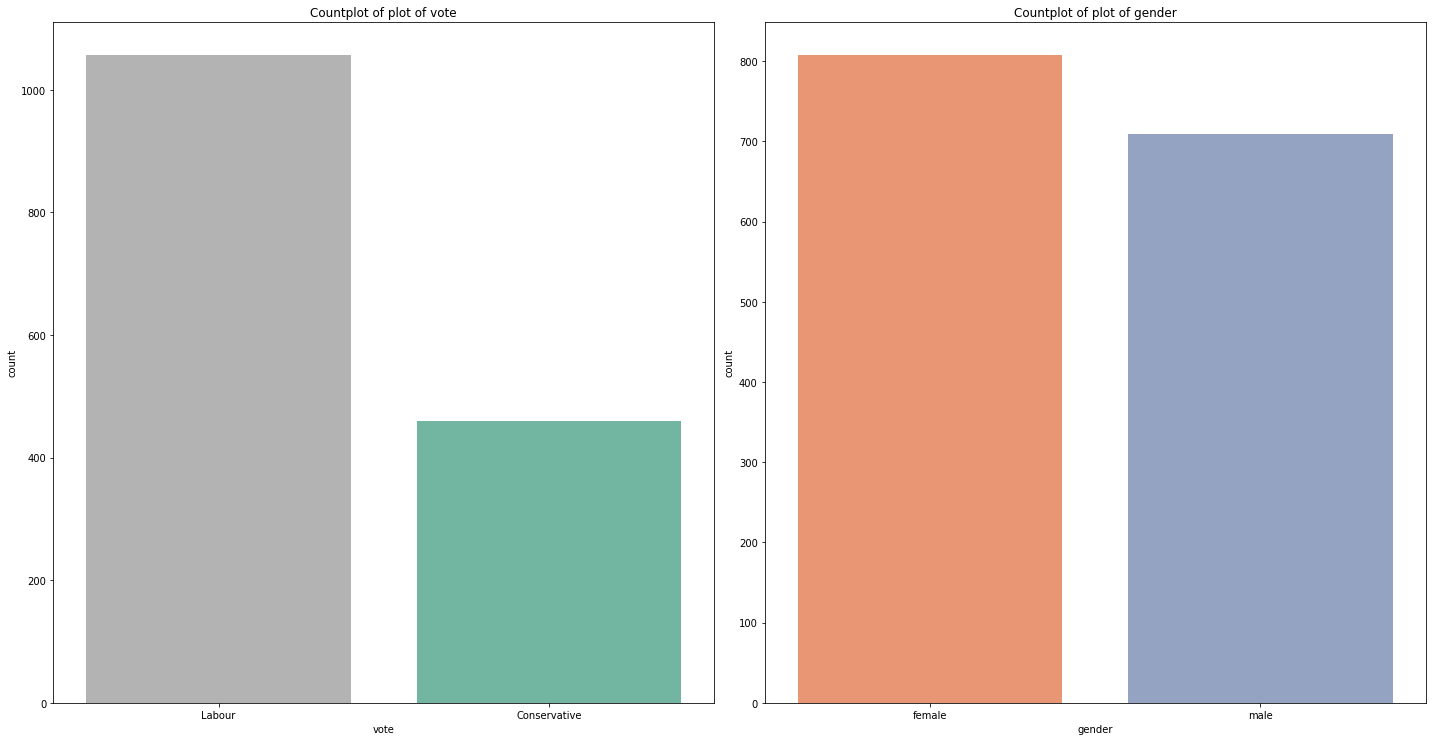

In [ ]:
#Bar plots of the categorical variables

a = len(election_df.select_dtypes('object').columns)  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig2 = plt.figure(figsize=(20,20))

for i in col_list2:
    plt.subplot(a, b, c)
    plt.title('Countplot of plot of {}'.format(i))
    plt.xlabel(i)
    sns.countplot(data=election_df, x=election_df[i], palette=palette1);
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
election_df['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

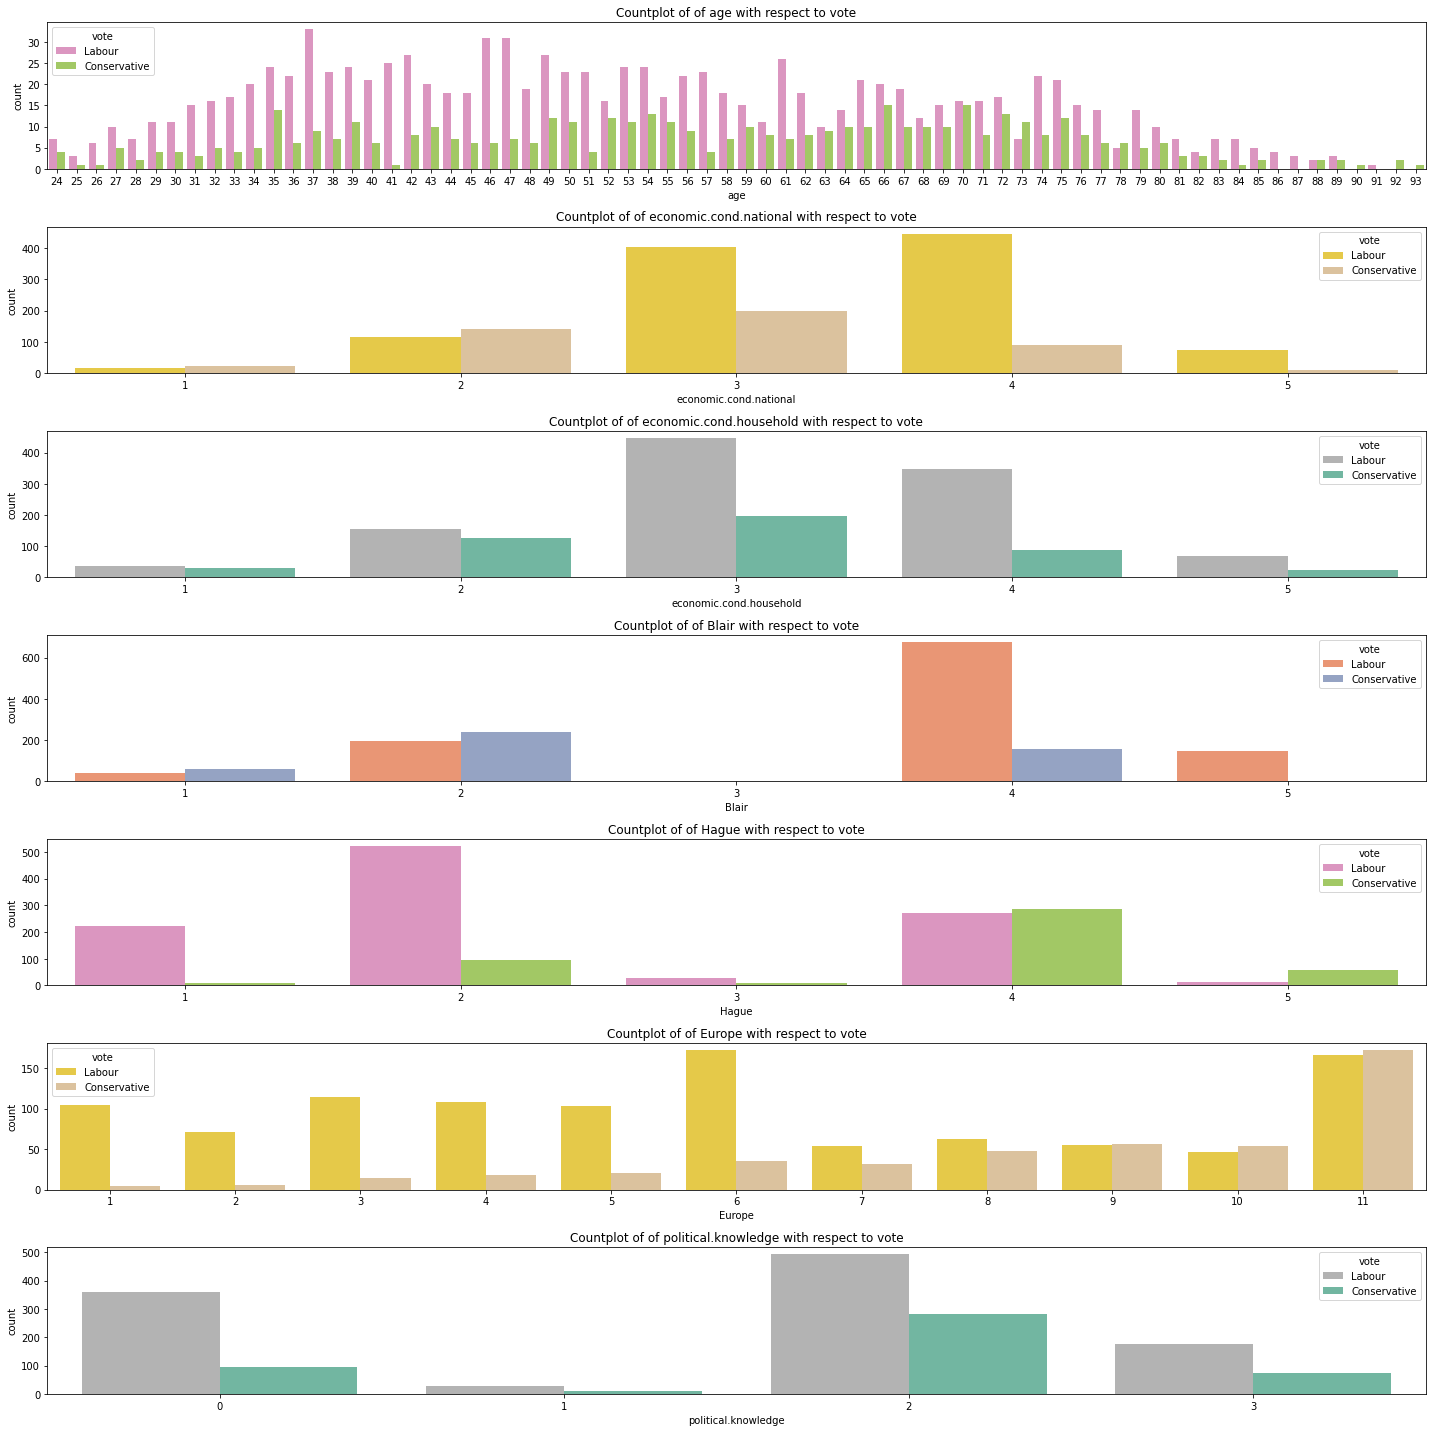

In [ ]:
# Count plots of the categorical variables

a = len(election_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 1 # number of columns
c = 1  # initialize plot counter

fig3 = plt.figure(figsize=(20,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Countplot of of {} with respect to vote'.format(i))
    plt.xlabel(i)
    sns.countplot(data=election_df, x=election_df[i], hue='vote', palette=palette1);
    c = c + 1
  
plt.tight_layout()
plt.show()

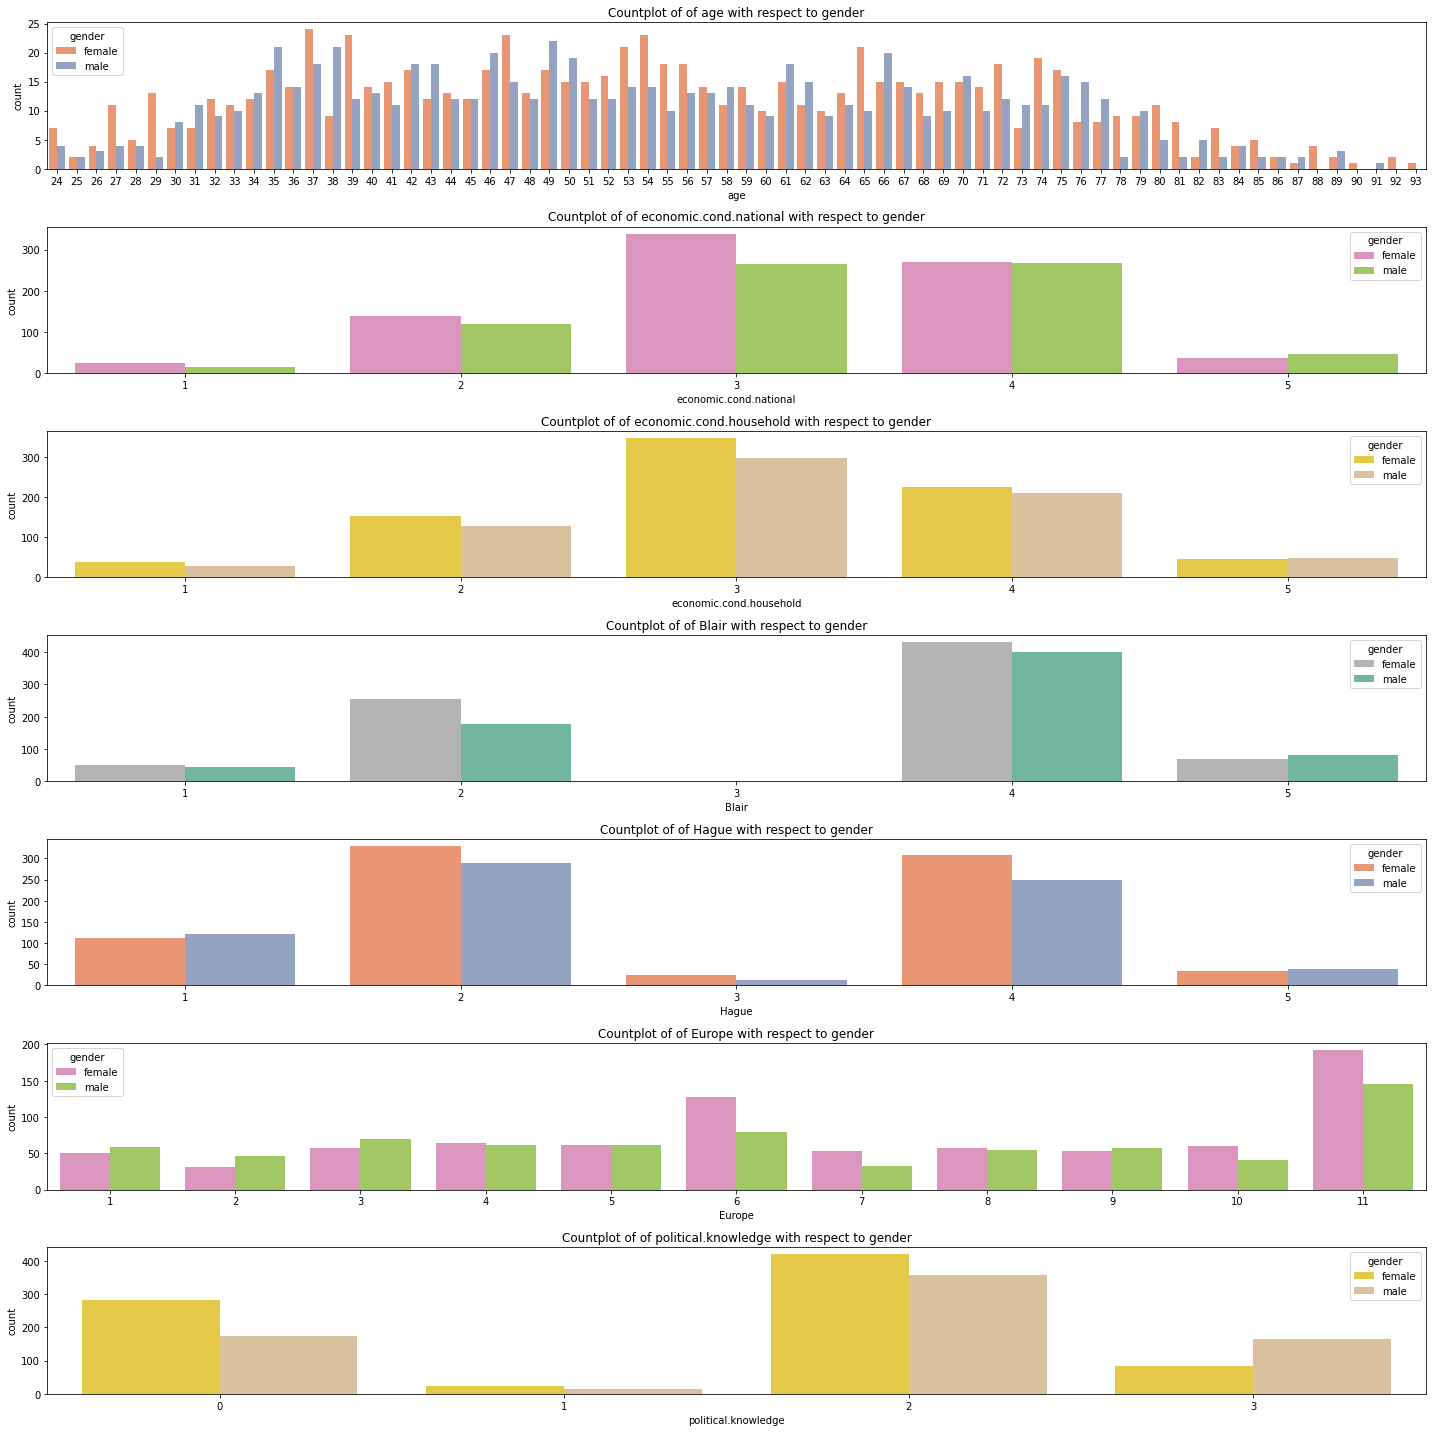

In [ ]:
# Count plots of the categorical variables

a = len(election_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 1 # number of columns
c = 1  # initialize plot counter

fig4 = plt.figure(figsize=(20,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Countplot of of {} with respect to gender'.format(i))
    plt.xlabel(i)
    sns.countplot(data=election_df, x=election_df[i], hue='gender', palette=palette1);
    c = c + 1
  
plt.tight_layout()
plt.show()

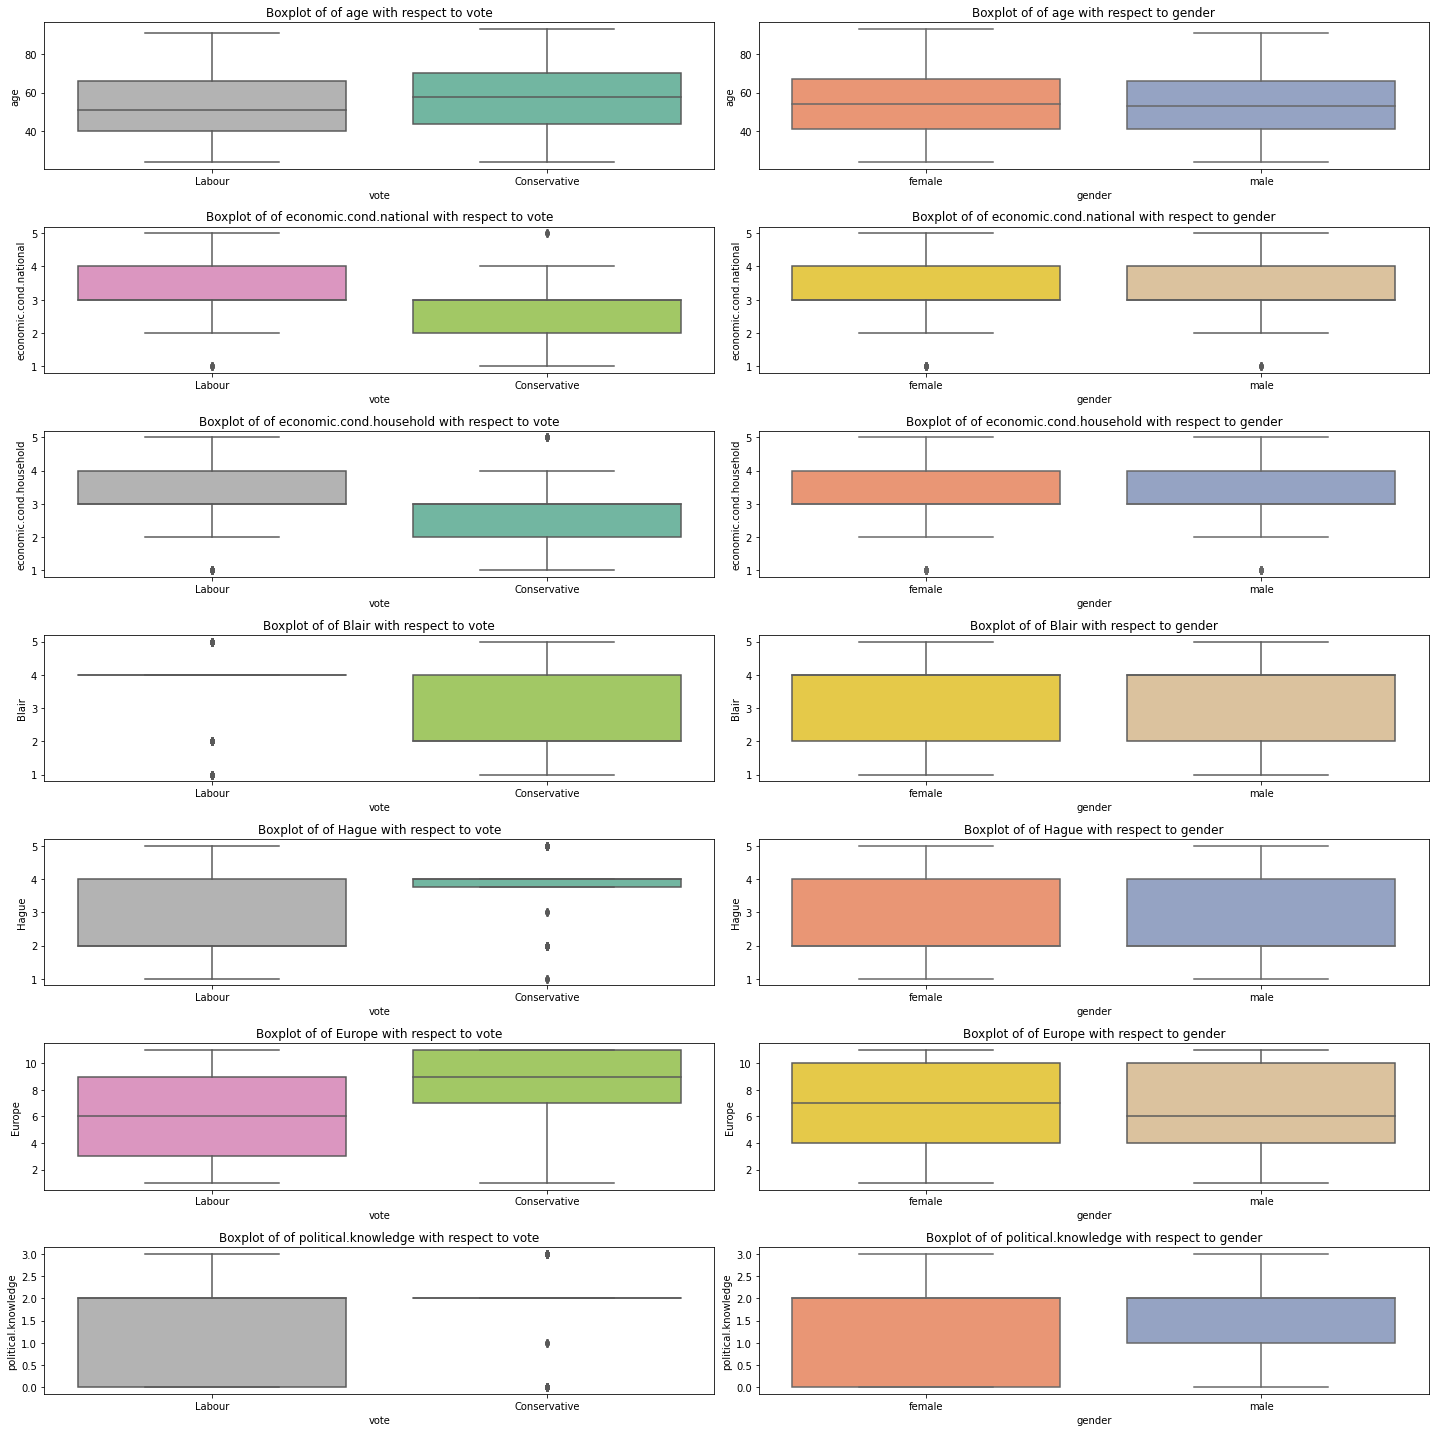

In [ ]:
# Box plots of the categorical variables

a = len(election_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig5 = plt.figure(figsize=(20,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Boxplot of of {} with respect to vote'.format(i))
    #plt.xlabel(i)
    sns.boxplot(data=election_df, x='vote', y=election_df[i], palette=palette1);
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Boxplot of of {} with respect to gender'.format(i))
    #plt.xlabel(i)
    sns.boxplot(data=election_df, x='gender', y=election_df[i], palette=palette1);
    c = c + 1

plt.tight_layout()
plt.show()

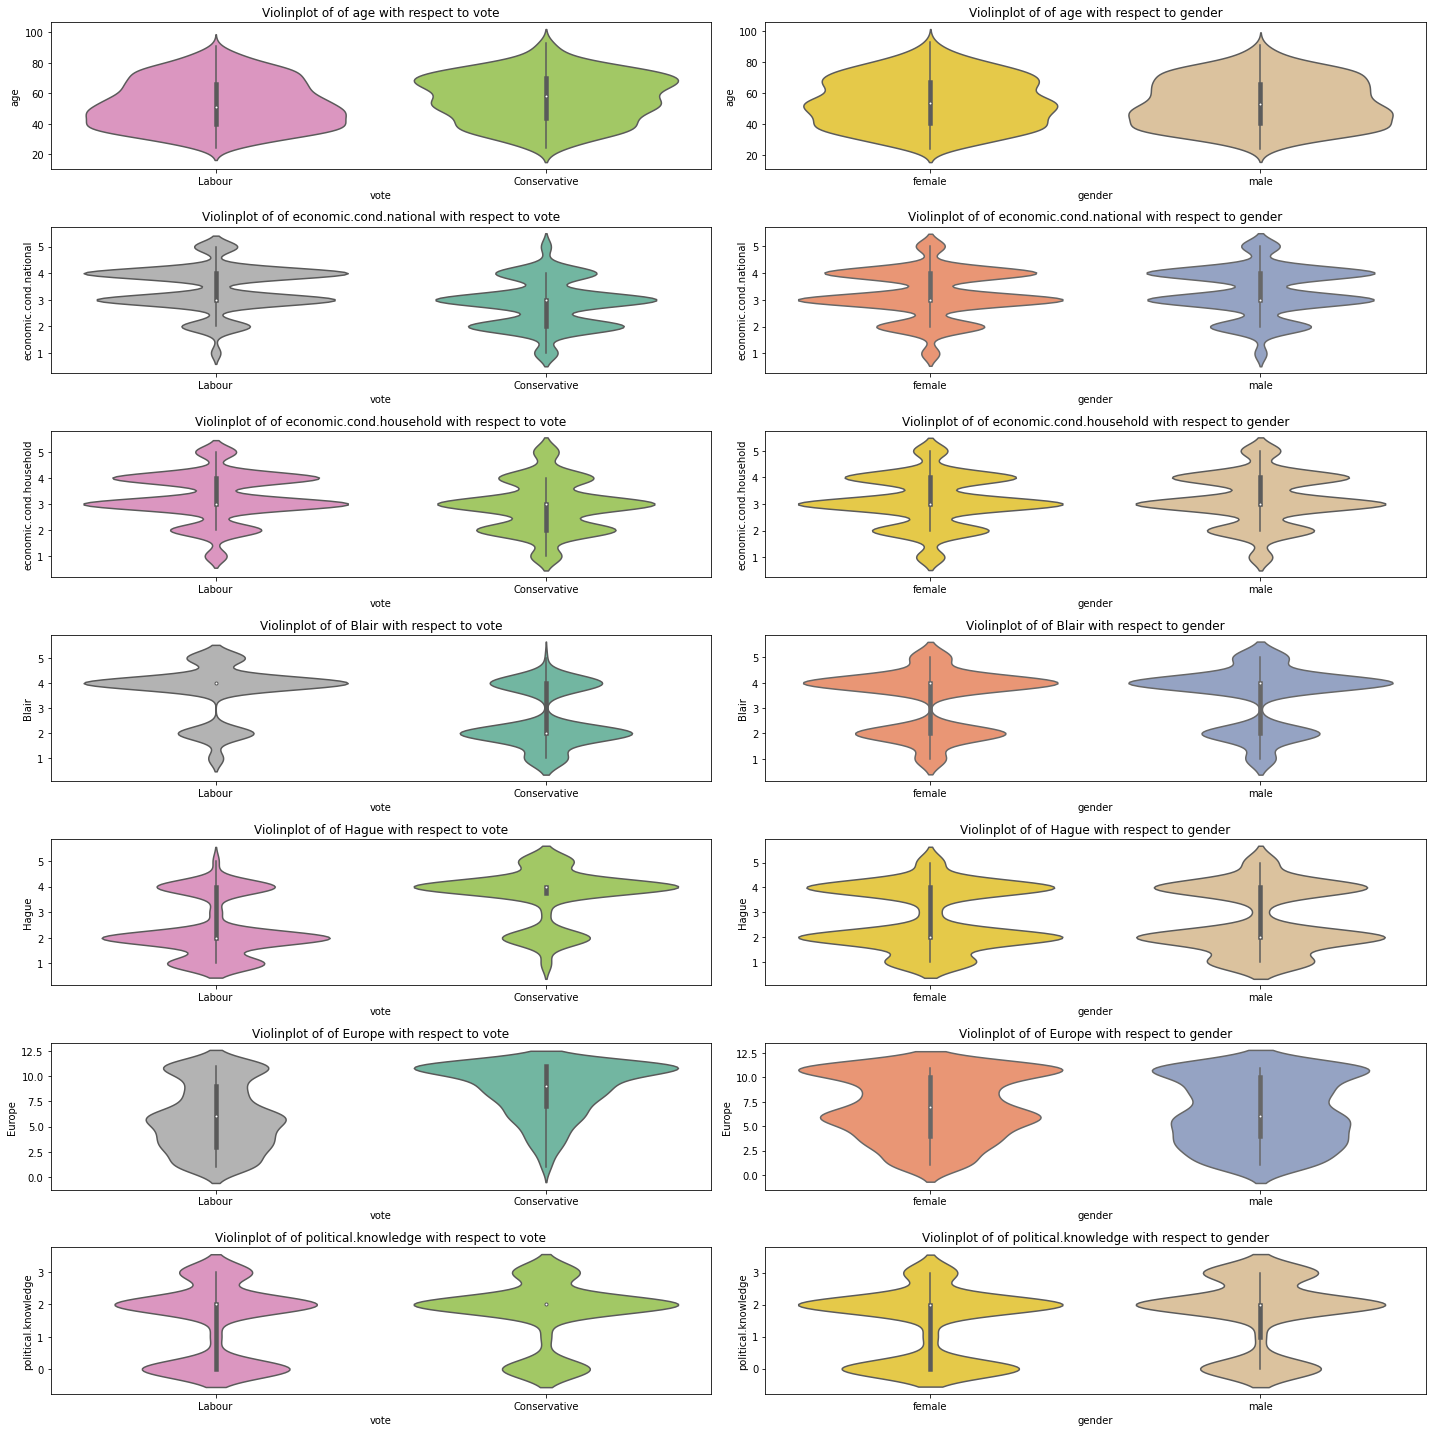

In [ ]:
# Box plots of the categorical variables

a = len(election_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig6 = plt.figure(figsize=(20,20))

for i in col_list1:
    
    plt.subplot(a, b, c)
    plt.title('Violinplot of of {} with respect to vote'.format(i))
    #plt.xlabel(i)
    sns.violinplot(data=election_df, x='vote', y=election_df[i], palette=palette1);
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Violinplot of of {} with respect to gender'.format(i))
    #plt.xlabel(i)
    sns.violinplot(data=election_df, x='gender', y=election_df[i], palette=palette1);
    c = c + 1

plt.tight_layout()
plt.show()

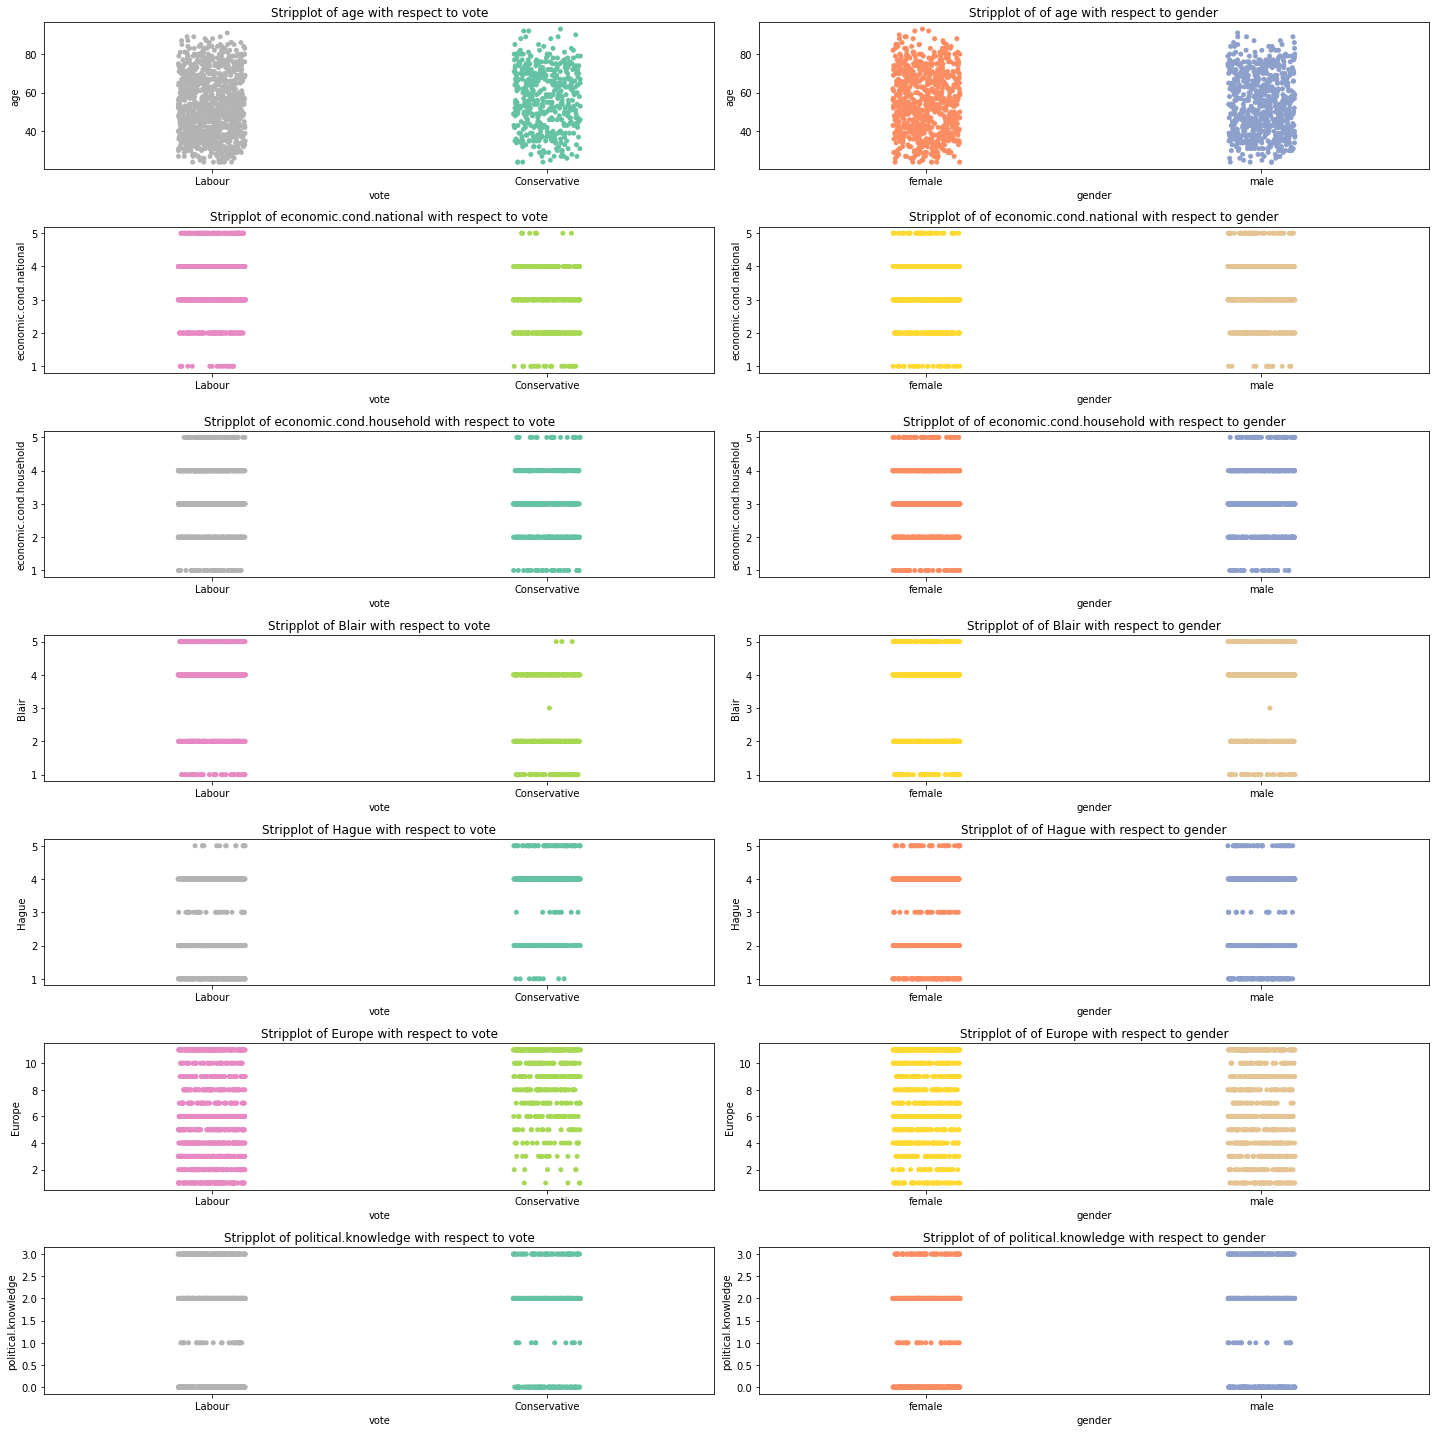

In [ ]:
# Box plots of the categorical variables

a = len(election_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig7 = plt.figure(figsize=(20,20))

for i in col_list1:
    
    plt.subplot(a, b, c)
    plt.title('Stripplot of {} with respect to vote'.format(i))
    #plt.xlabel(i)
    sns.stripplot(data=election_df, x='vote', y=election_df[i], jitter=True, palette=palette1);
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Stripplot of of {} with respect to gender'.format(i))
    #plt.xlabel(i)
    sns.stripplot(data=election_df, x='gender', y=election_df[i], jitter=True, palette=palette1);
    c = c + 1

plt.tight_layout()
plt.show()

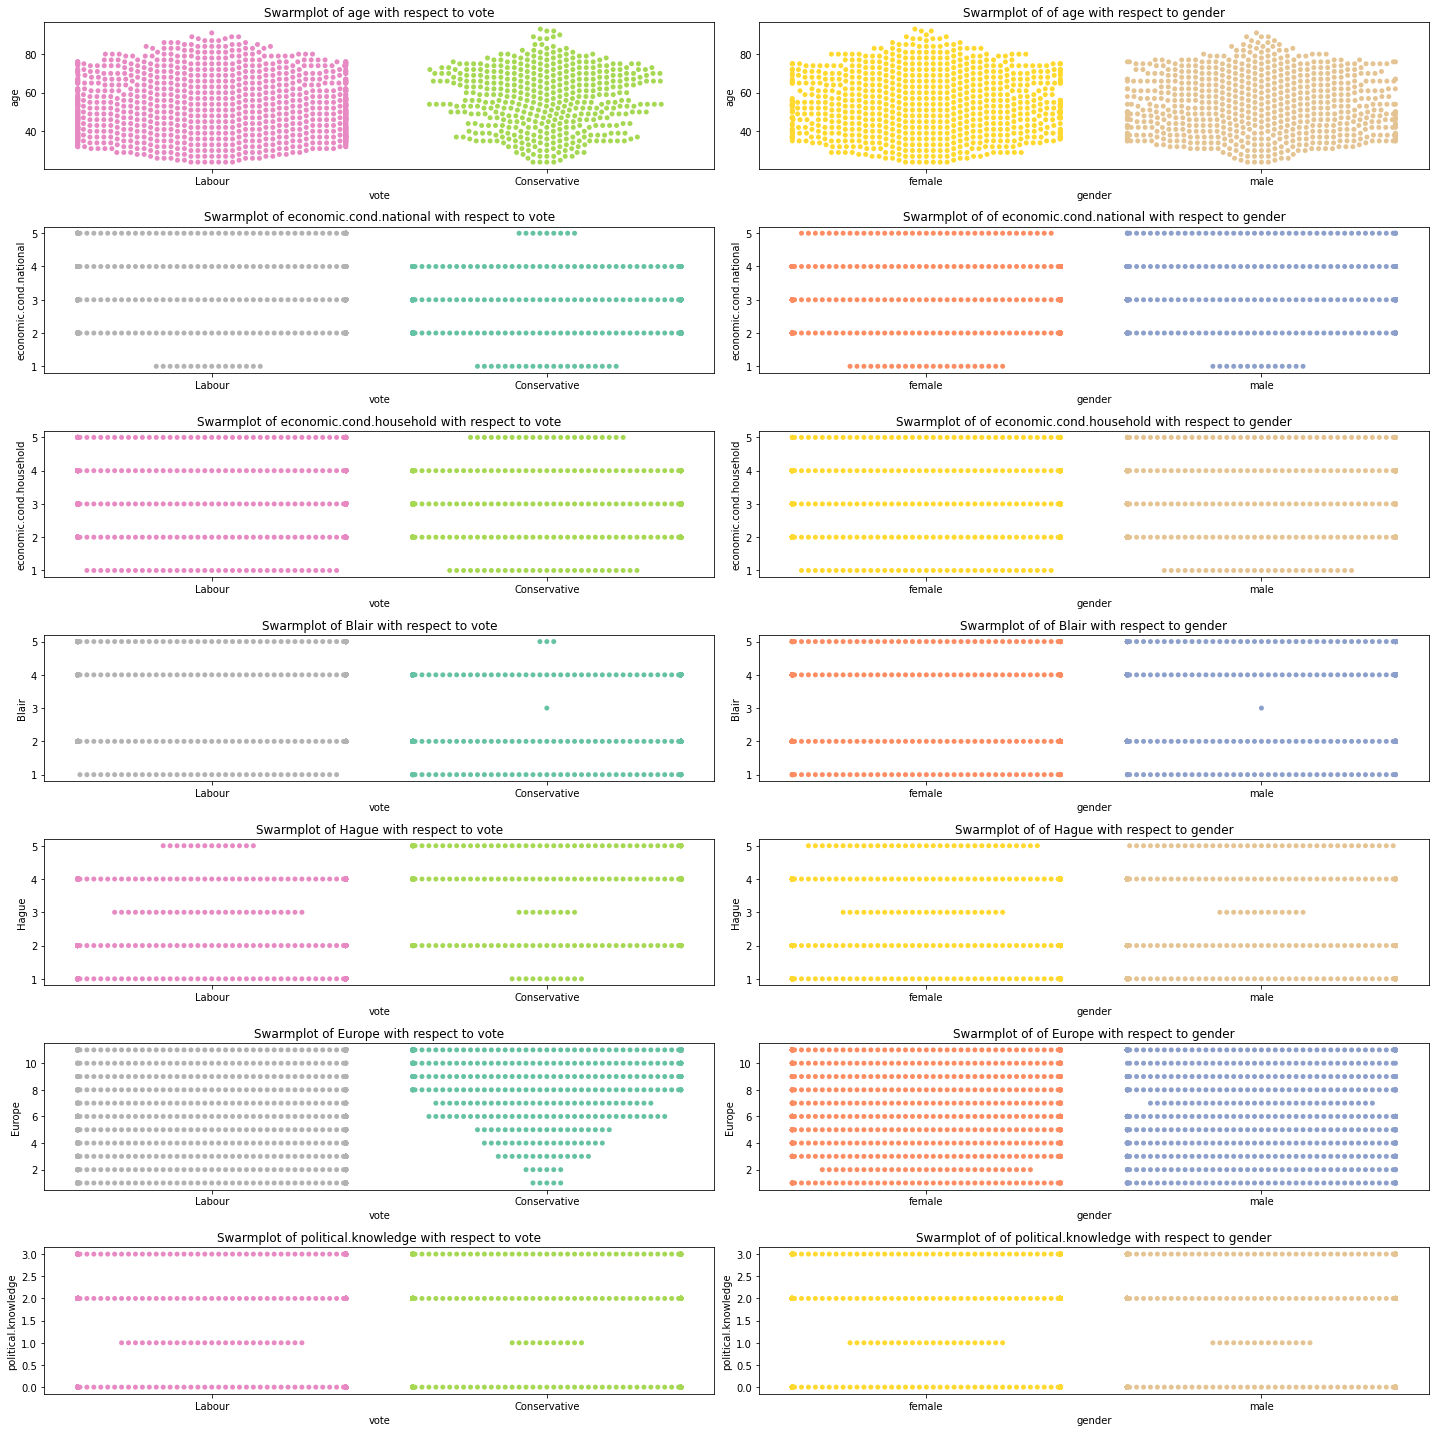

In [ ]:
# Box plots of the categorical variables

a = len(election_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig8 = plt.figure(figsize=(20,20))

for i in col_list1:
    
    plt.subplot(a, b, c)
    plt.title('Swarmplot of {} with respect to vote'.format(i))
    #plt.xlabel(i)
    sns.swarmplot(data=election_df, x='vote', y=election_df[i], dodge=True, palette=palette1);
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Swarmplot of of {} with respect to gender'.format(i))
    #plt.xlabel(i)
    sns.swarmplot(data=election_df, x='gender', y=election_df[i], dodge=True, palette=palette1);
    c = c + 1

plt.tight_layout()
plt.show()

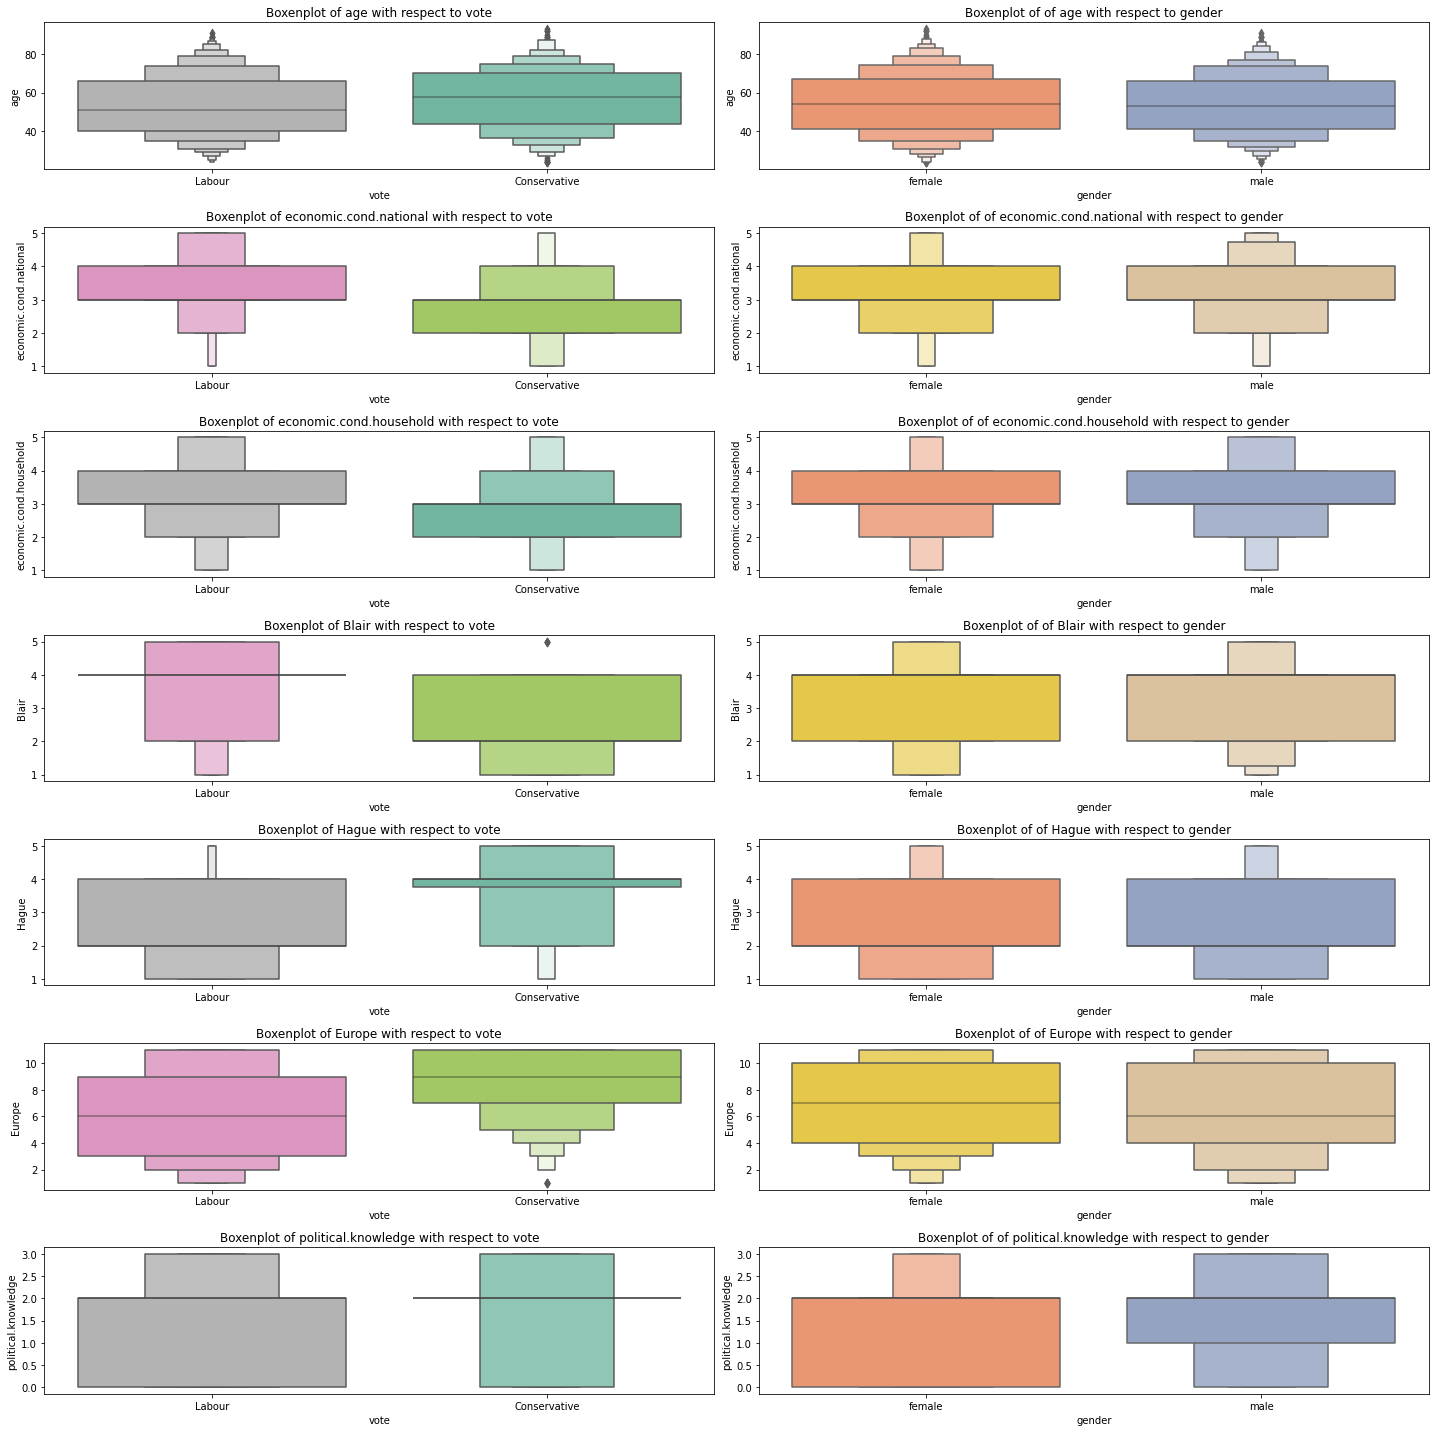

In [ ]:
# Box plots of the categorical variables

a = len(election_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig9 = plt.figure(figsize=(20,20))

for i in col_list1:
    
    plt.subplot(a, b, c)
    plt.title('Boxenplot of {} with respect to vote'.format(i))
    #plt.xlabel(i)
    sns.boxenplot(data=election_df, x='vote', y=election_df[i], palette=palette1);
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Boxenplot of of {} with respect to gender'.format(i))
    #plt.xlabel(i)
    sns.boxenplot(data=election_df, x='gender', y=election_df[i], palette=palette1);
    c = c + 1

plt.tight_layout()
plt.show()

### **Bi-Variate Analysis**

<Figure size 720x720 with 0 Axes>

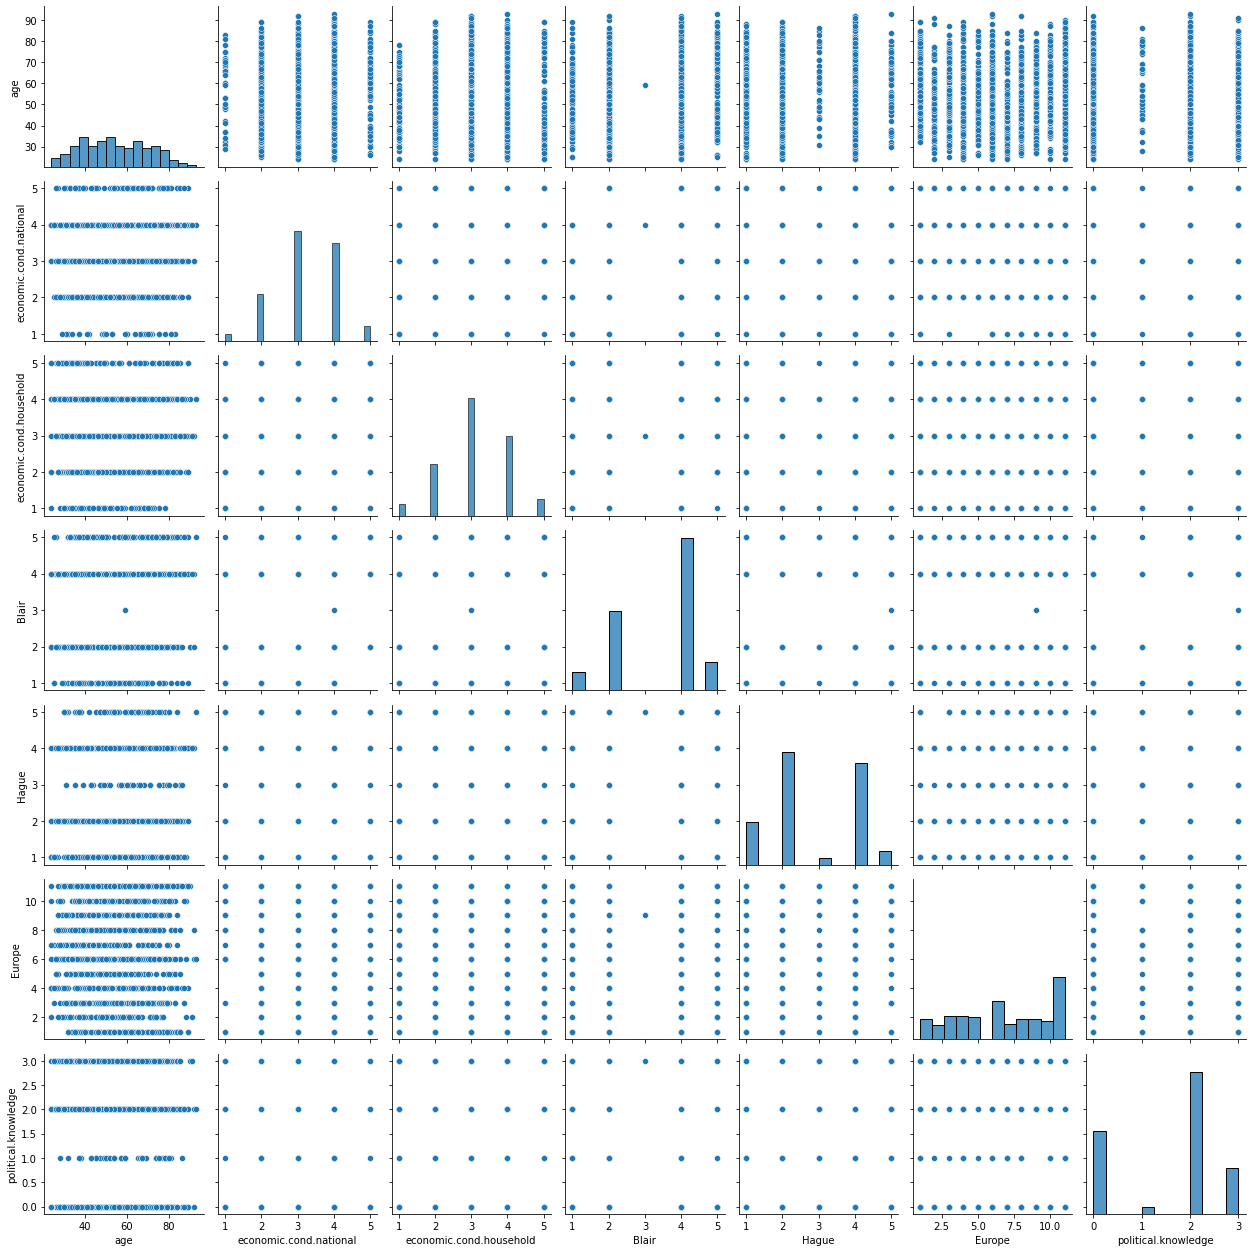

In [ ]:
# Pair plot of the numerical variables
fig10 = plt.figure(figsize=(10,10))
sns.pairplot(data=election_df[col_list1], palette='Set1')
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

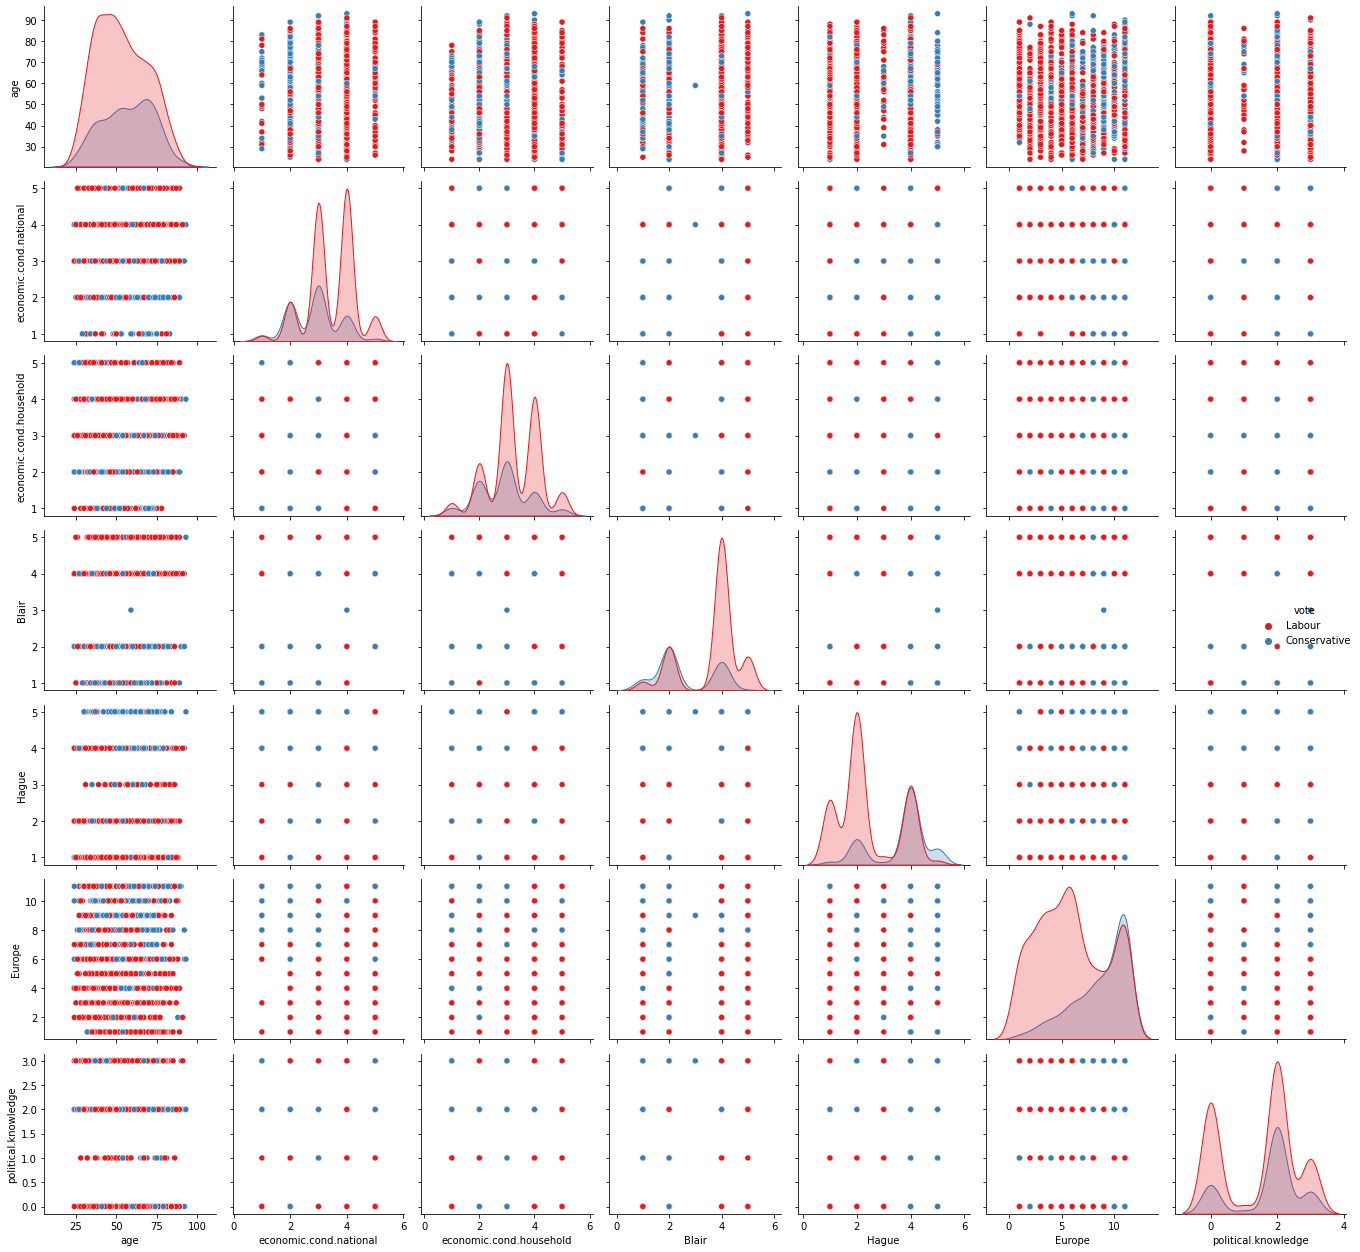

In [ ]:
# Pair plot of the numerical variables
fig11 = plt.figure(figsize=(10,10))
sns.pairplot(data=election_df, hue='vote', palette='Set1')
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

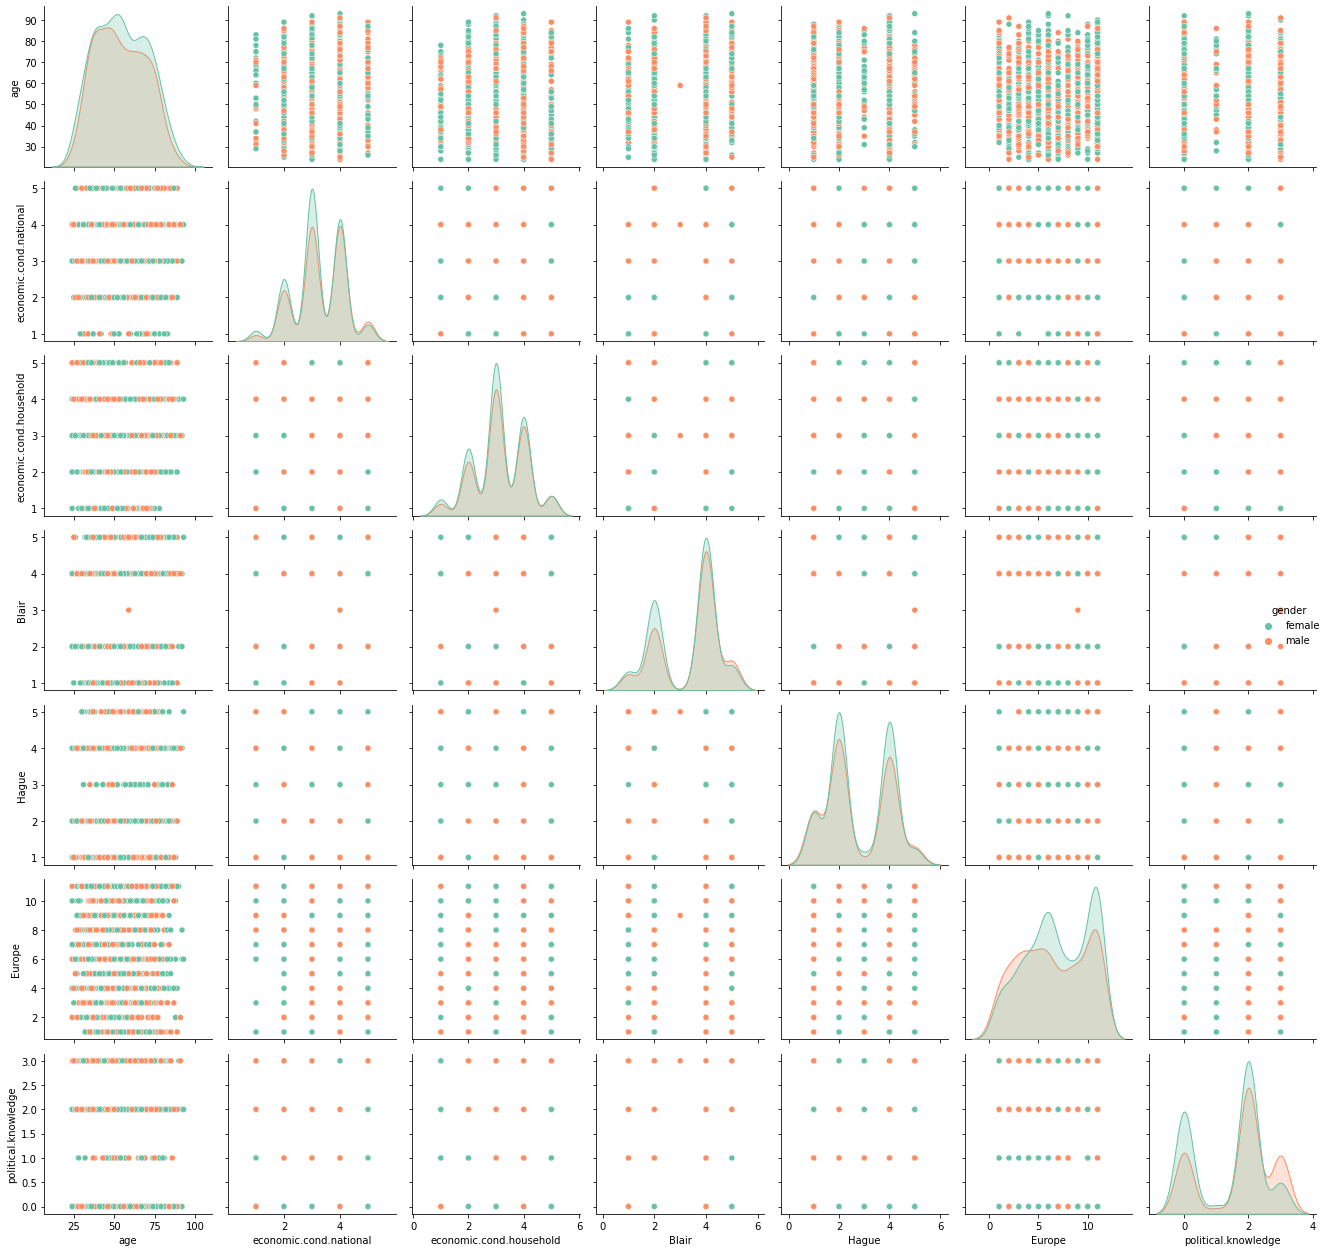

In [ ]:
# Pair plot of the numerical variables
fig12 = plt.figure(figsize=(10,10))
sns.pairplot(data=election_df, hue='gender', palette='Set2')
plt.tight_layout()
plt.show()

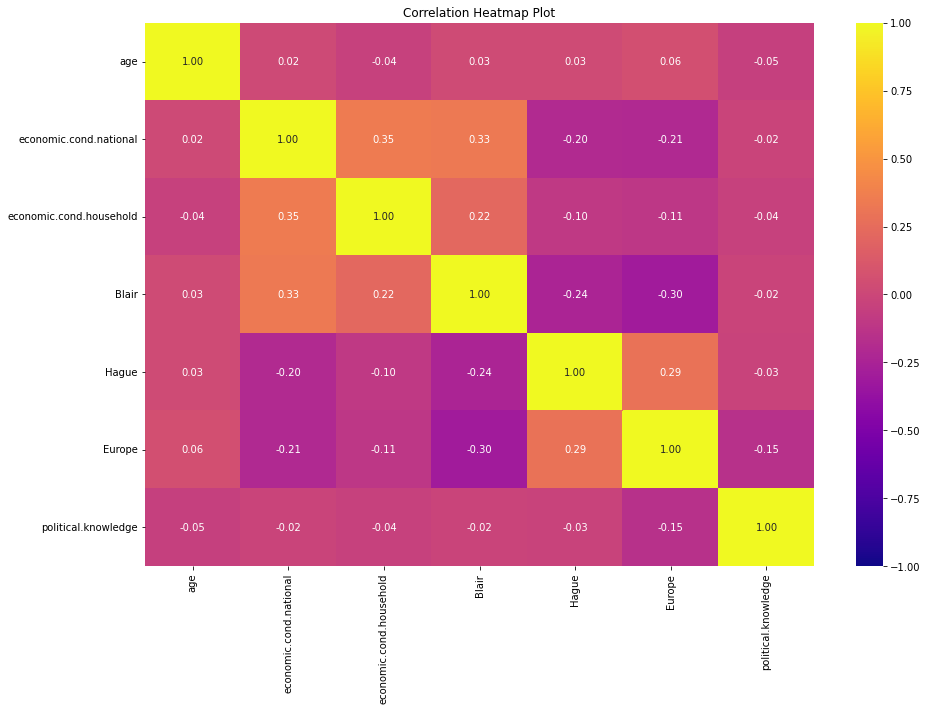

In [ ]:
fig13=plt.figure(figsize=(15,10))
sns.heatmap(round(election_df.corr(),2),fmt='.2f',annot=True,cmap='plasma', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()

### **1.3. Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.**

#### **Data Encoding**

In [10]:
for feature in col_list2: 
    print('\n')
    print('Feature:',feature)
    print(pd.Categorical(election_df[feature].unique()))
    print(pd.Categorical(election_df[feature].unique()).codes)
    election_df[feature] = pd.Categorical(election_df[feature]).codes



Feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


Feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [11]:
election_df.head()

vote  age  economic.cond.national  ...  Europe  political.knowledge  gender
0     1   43                       3  ...       2                    2       0
1     1   36                       4  ...       5                    2       1
2     1   35                       4  ...       3                    2       1
3     1   24                       4  ...       4                    0       0
4     1   41                       2  ...       6                    2       1

[5 rows x 9 columns]

Scaling
We are not going to scale the data for Logistic regression, LDA and Naive Baye’s models as it is
not necessary.
But in case of KNN it is necessary to scale the data, as it a distance-based algorithm (typically
based on Euclidean distance). Scaling the data gives similar weightage to all the variables.

## Train-Test Split

In [12]:
election_df_copy = election_df.copy(deep=True)
election_df_copy.head()

vote  age  economic.cond.national  ...  Europe  political.knowledge  gender
0     1   43                       3  ...       2                    2       0
1     1   36                       4  ...       5                    2       1
2     1   35                       4  ...       3                    2       1
3     1   24                       4  ...       4                    0       0
4     1   41                       2  ...       6                    2       1

[5 rows x 9 columns]

In [13]:
X= election_df_copy.drop("vote",axis=1)
y=election_df_copy.pop('vote')
X.head()

age  economic.cond.national  ...  political.knowledge  gender
0   43                       3  ...                    2       0
1   36                       4  ...                    2       1
2   35                       4  ...                    2       1
3   24                       4  ...                    0       0
4   41                       2  ...                    2       1

[5 rows x 8 columns]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [15]:
print('X_scaled_train',X_train.shape)
print('X_scaled_test',X_test.shape)
print('y_scaled_train',y_train.shape)
print('y_scaled_test',y_test.shape)

X_scaled_train (1061, 8)
X_scaled_test (456, 8)
y_scaled_train (1061,)
y_scaled_test (456,)


In [16]:
# Z-Score Scaling

X_scaled = X.apply(zscore)
X_scaled.head()

age  economic.cond.national  ...  political.knowledge    gender
0 -0.716161               -0.278185  ...             0.423832 -0.936736
1 -1.162118                0.856242  ...             0.423832  1.067536
2 -1.225827                0.856242  ...             0.423832  1.067536
3 -1.926617                0.856242  ...            -1.421084 -0.936736
4 -0.843577               -1.412613  ...             0.423832  1.067536

[5 rows x 8 columns]

In [17]:
X_scaled.describe().T

count          mean  ...       75%       max
age                      1517.0  1.917458e-17  ...  0.812836  2.469250
economic.cond.national   1517.0 -1.984789e-16  ...  0.856242  1.990670
economic.cond.household  1517.0 -2.397189e-16  ...  0.926367  2.000755
Blair                    1517.0 -1.034842e-16  ...  0.565802  1.417312
Hague                    1517.0  5.386448e-17  ...  1.014951  1.826592
Europe                   1517.0  6.293947e-17  ...  0.988407  1.291625
political.knowledge      1517.0 -7.665442e-16  ...  0.423832  1.346290
gender                   1517.0  2.648581e-16  ...  1.067536  1.067536

[8 rows x 8 columns]

In [18]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [19]:
print('X_scaled_train',X_scaled_train.shape)
print('X_scaled_test',X_scaled_test.shape)
print('y_scaled_train',y_scaled_train.shape)
print('y_scaled_test',y_scaled_test.shape)

X_scaled_train (1061, 8)
X_scaled_test (456, 8)
y_scaled_train (1061,)
y_scaled_test (456,)


## **1.4. Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)**

## Build Models

In [24]:
# Instantiate the models

#Instantiate the Logistic Regression Model
clfLR = LogisticRegression(random_state=1)

# Instantiate the LDA model
clfLDA = LinearDiscriminantAnalysis()

# Instantiate the KNN Classifier
clfKNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform')

# Instantiate the Gaussian Naive Bias Classifier
clfNB = GaussianNB()

# Instantiate the Gaussian Classifier for the Ensemble Random Forest Classifier Model
clfRF=RandomForestClassifier(n_estimators=100, random_state=1)

# Instantiate the Adaboost Classifier Model
clfADB = AdaBoostClassifier(random_state=1)

# Instantiate the Gradient Boosting Model
clfGBC = GradientBoostingClassifier(n_estimators = 50,random_state=1)

# Instantiate the Support Vector Machine Model
clfSVM = svm.SVC(probability=True)

# Instantiate the XGBoost Model
clfXGB=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

# Instantiate the Bagging Classifier Model
clfBGCL = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=1)

In [25]:
model_names = {clfLR:'Logistic Regression', clfLDA:'Linear Discriminant Analysis', clfKNN:'K-Nearest Neighbours Classifier', clfNB:'Gaussian Naive Bias Classifier', clfRF:'Ensemble Random Forest', clfADB:'Ada Boost',clfGBC:'Gradient Boosting', clfSVM:'Support Vector Machine', clfXGB:'XGBoost', clfBGCL:'Bagging Classifier Model'}

In [26]:
def model_func(model, x_train, x_test, Y_train, Y_test):

  #Fit the model on the training data
  model.fit(x_train, Y_train)
  
  # Predict on both train and test set
  Y_train_predict = model.predict(x_train)
  Y_test_predict = model.predict(x_test)

  # Print classification report for the training data
  print('Classification report for the {} model on the training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

  # Display the confusion matrix for the train data
  sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
  plt.title('Confusion Matrix for the {} model on the training set'.format(model_names[model]))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the train data
  fpr_train, tpr_train, thresholds = roc_curve(Y_train,model.predict_proba(x_train)[:,1])
  plt.plot(fpr_train, tpr_train, marker='.')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model on the training set'.format(model_names[model]))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_train'.format(model_names[model])], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the train set

  acc_train = accuracy_score(Y_train,Y_train_predict)
  roc_train = roc_auc_score(Y_train,model.predict_proba(x_train)[:,1])
  precision_train = precision_score(Y_train,Y_train_predict)
  recall_train = recall_score(Y_train,Y_train_predict)
  f1_train = f1_score(Y_train,Y_train_predict)
  train_scores = cross_val_score(model, x_train, Y_train, cv=10)
  mean_cv_score_train = np.mean(train_scores)
  
  print('############################################Testing Set################################################', '\n')

  # Print classification report for the testing data
  print('Classification report for the {} model on the testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

  # Display the confusion matrix for the test data
  sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
  plt.title('Confusion Matrix for the {} model on the testing set'.format(model_names[model]))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the test data
  fpr_test, tpr_test, thresholds = roc_curve(Y_test,model.predict_proba(x_test)[:,1])
  plt.plot(fpr_test, tpr_test, marker='*')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model on the testing set'.format(model_names[model]))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_test'.format(model_names[model])], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the test set
  acc_test = accuracy_score(Y_test,Y_test_predict)
  roc_test = roc_auc_score(Y_test,model.predict_proba(x_test)[:,1])
  precision_test = precision_score(Y_test,Y_test_predict)
  recall_test = recall_score(Y_test,Y_test_predict)
  f1_test = f1_score(Y_test,Y_test_predict)
  test_scores = cross_val_score(model, x_test, Y_test, cv=10)
  mean_cv_score_test = np.mean(test_scores)
  
  # Display the performance metrics in a dataframe
  index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
  data = pd.DataFrame({'Train':[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       'Test':[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
  round(data,3)
  print('The performance metrics for the {} model'.format(model_names[model]))
  return data

## Get Performance Metrics for the Models

### Logistic Regression - Without Scaling

Classification report for the Logistic Regression model on the training set is 
               precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



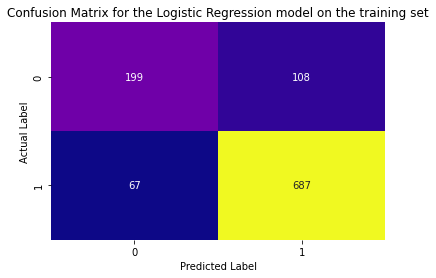

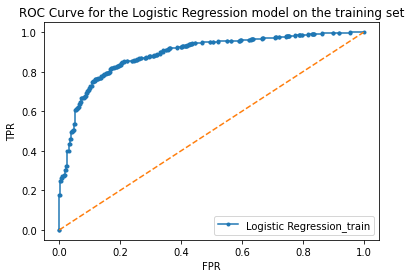



############################################Testing Set################################################ 

Classification report for the Logistic Regression model on the testing set is 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



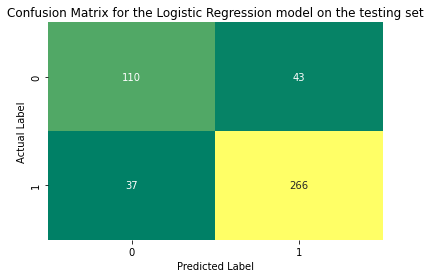

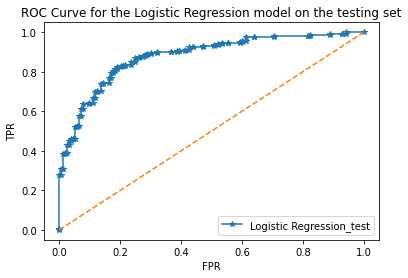



The performance metrics for the Logistic Regression model


Train      Test
Accuracy       0.835061  0.824561
ROC-AUC        0.889799  0.879096
Precision      0.864151  0.860841
Recall         0.911141  0.877888
F1-Score       0.887024  0.869281
Mean_CV_Score  0.831300  0.835507

In [ ]:
model_func(clfLR, X_train, X_test, y_train, y_test)

### Logistic Regresssion With Scaling

Classification report for the Logistic Regression model on the training set is 
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



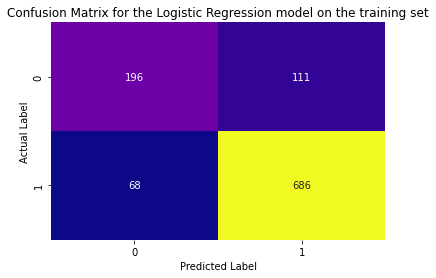

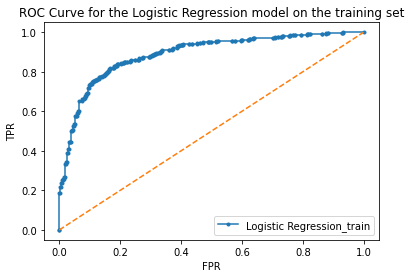



############################################Testing Set################################################ 

Classification report for the Logistic Regression model on the testing set is 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



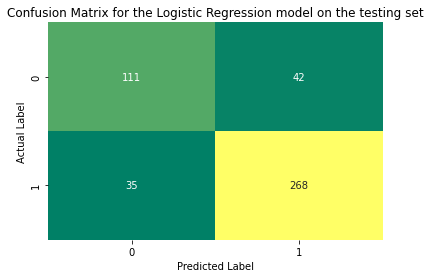

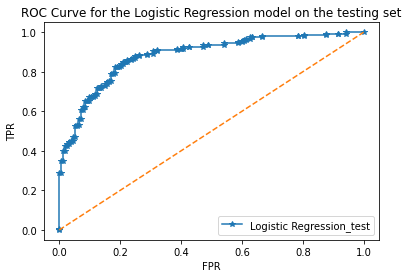



The performance metrics for the Logistic Regression model


Train      Test
Accuracy       0.831291  0.831140
ROC-AUC        0.889998  0.882741
Precision      0.860728  0.864516
Recall         0.909814  0.884488
F1-Score       0.884591  0.874388
Mean_CV_Score  0.831300  0.835507

In [ ]:
model_func(clfLR, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

### Linear Discriminant Analysis - Without Scaling

Classification report for the Linear Discriminant Analysis model on the training set is 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



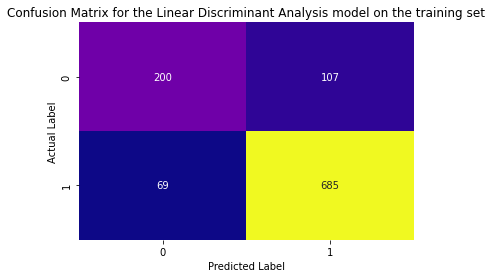

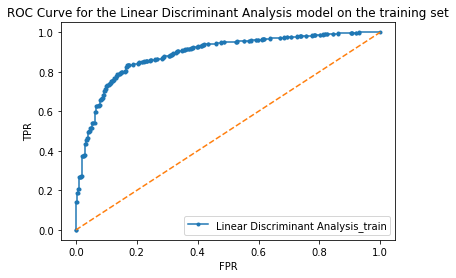



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model on the testing set is 
               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



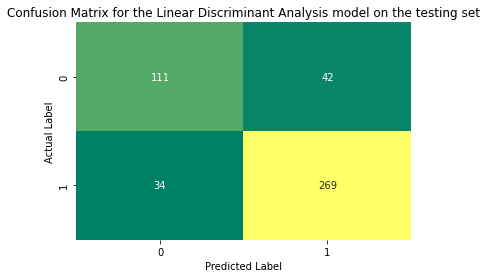

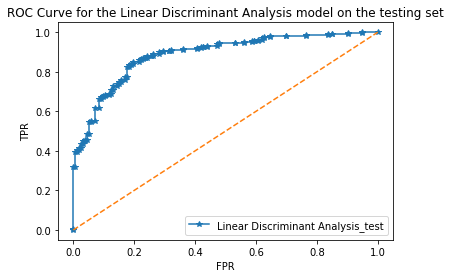



The performance metrics for the Linear Discriminant Analysis model


Train      Test
Accuracy       0.834119  0.833333
ROC-AUC        0.889367  0.887638
Precision      0.864899  0.864952
Recall         0.908488  0.887789
F1-Score       0.886158  0.876221
Mean_CV_Score  0.825666  0.839952

In [ ]:
model_func(clfLDA, X_train, X_test, y_train, y_test)

### Linear Discriminant Analysis - With Scaling

Classification report for the Linear Discriminant Analysis model on the training set is 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



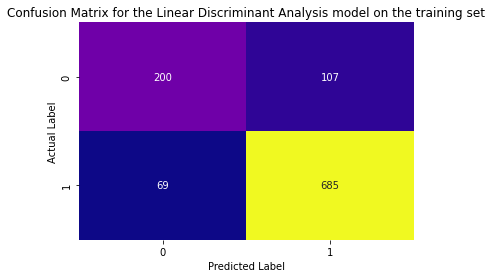

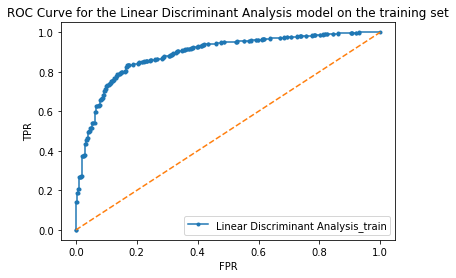



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model on the testing set is 
               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



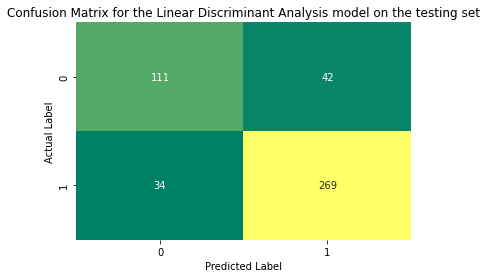

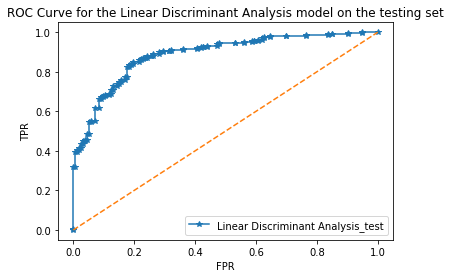



The performance metrics for the Linear Discriminant Analysis model


Train      Test
Accuracy       0.834119  0.833333
ROC-AUC        0.889367  0.887638
Precision      0.864899  0.864952
Recall         0.908488  0.887789
F1-Score       0.886158  0.876221
Mean_CV_Score  0.825666  0.839952

In [ ]:
model_func(clfLDA, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

## **1.5. Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)**

### KNN Model - Without Scaling

Classification report for the K-Nearest Neighbours Classifier model on the training set is 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



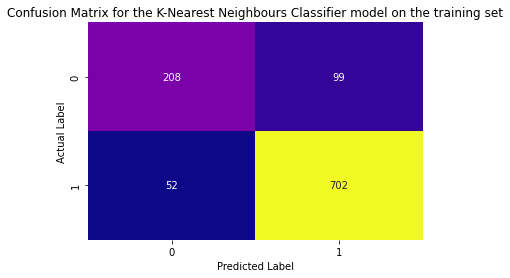

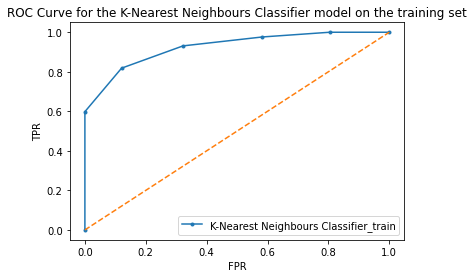



############################################Testing Set################################################ 

Classification report for the K-Nearest Neighbours Classifier model on the testing set is 
               precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



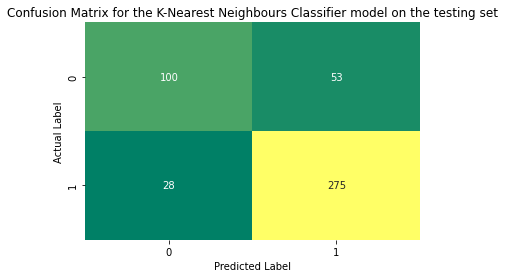

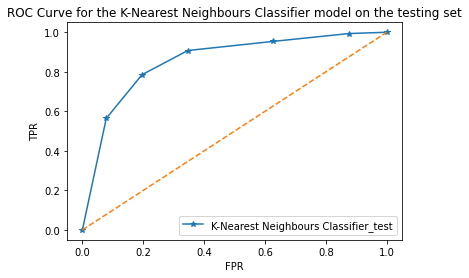



The performance metrics for the K-Nearest Neighbours Classifier model


Train      Test
Accuracy       0.857681  0.822368
ROC-AUC        0.924783  0.855940
Precision      0.876404  0.838415
Recall         0.931034  0.907591
F1-Score       0.902894  0.871632
Mean_CV_Score  0.795486  0.780676

In [ ]:
model_func(clfKNN, X_train, X_test, y_train, y_test)

### KNN Model - With Scaling

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled_train, y_scaled_train)
    # evaluate accuracy
    scores = knn.score(X_scaled_train, y_scaled_train)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.0,
 0.1291234684260132,
 0.1291234684260132,
 0.14137606032045236,
 0.1442035815268614,
 0.15174363807728553,
 0.15457115928369458,
 0.1583411875589067,
 0.1583411875589067,
 0.16116870876531575,
 0.1602262016965127,
 0.15457115928369458,
 0.1639962299717248,
 0.1621112158341188,
 0.16493873704052775,
 0.15928369462770975,
 0.1602262016965127,
 0.15739868049010364,
 0.1602262016965127]

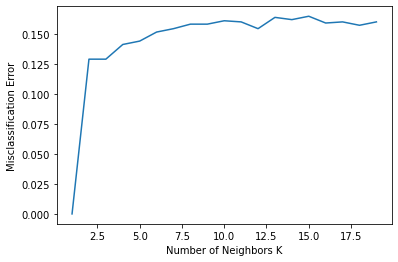

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled_train, y_scaled_train)
    # evaluate accuracy
    scores = knn.score(X_scaled_test, y_scaled_test)
    ac_scores.append(scores)
    
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.22587719298245612,
 0.19298245614035092,
 0.1885964912280702,
 0.17543859649122806,
 0.1885964912280702,
 0.18201754385964908,
 0.1842105263157895,
 0.17763157894736847,
 0.16885964912280704,
 0.17105263157894735,
 0.16447368421052633,
 0.17763157894736847,
 0.16885964912280704,
 0.17324561403508776,
 0.16228070175438591,
 0.16666666666666663,
 0.1557017543859649,
 0.16666666666666663]

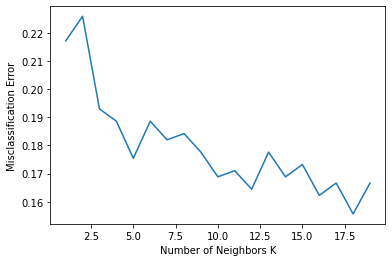

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Classification report for the K-Nearest Neighbours Classifier model on the training set is 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



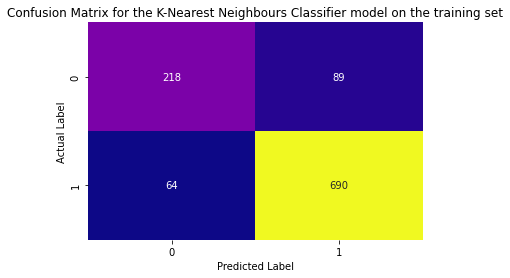

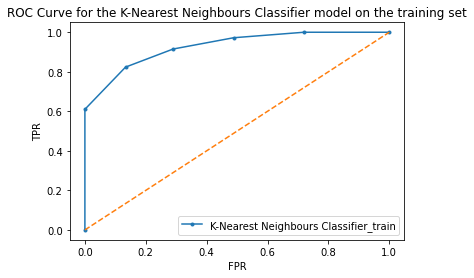



############################################Testing Set################################################ 

Classification report for the K-Nearest Neighbours Classifier model on the testing set is 
               precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



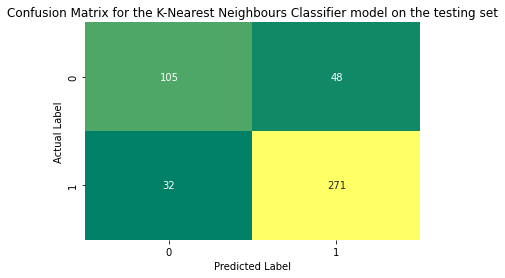

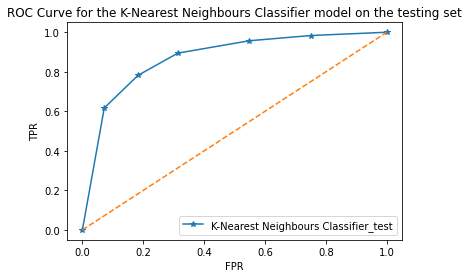



The performance metrics for the K-Nearest Neighbours Classifier model


Train      Test
Accuracy       0.855796  0.824561
ROC-AUC        0.927339  0.870241
Precision      0.885751  0.849530
Recall         0.915119  0.894389
F1-Score       0.900196  0.871383
Mean_CV_Score  0.816214  0.804783

In [ ]:
model_func(clfKNN, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

### Gaussian Naive Bias Classifier - Without Scaling

Classification report for the Gaussian Naive Bias Classifier model on the training set is 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



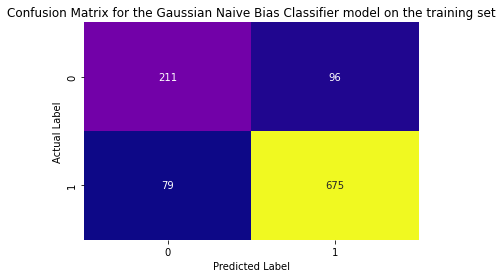

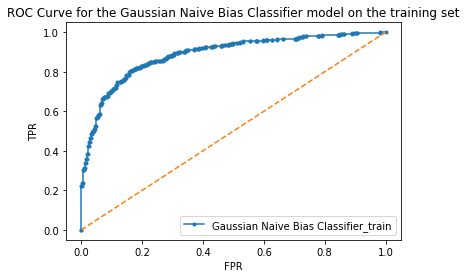



############################################Testing Set################################################ 

Classification report for the Gaussian Naive Bias Classifier model on the testing set is 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



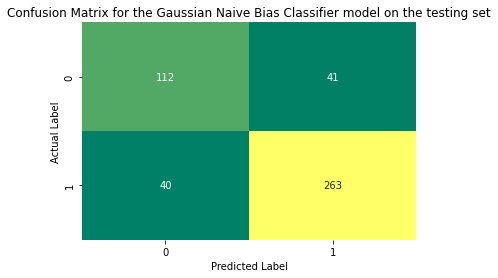

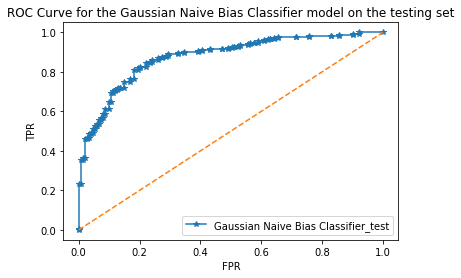



The performance metrics for the Gaussian Naive Bias Classifier model


Train      Test
Accuracy       0.835061  0.822368
ROC-AUC        0.887938  0.876356
Precision      0.875486  0.865132
Recall         0.895225  0.867987
F1-Score       0.885246  0.866557
Mean_CV_Score  0.828487  0.828889

In [ ]:
model_func(clfNB, X_train, X_test, y_train, y_test)

### Gaussian Naive Bias Classifier - With Scaling

Classification report for the Gaussian Naive Bias Classifier model on the training set is 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



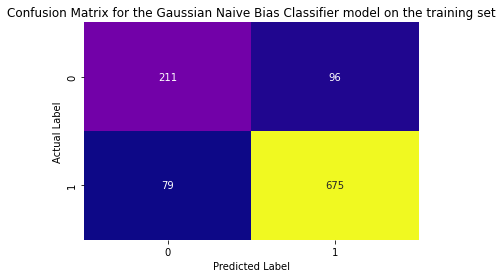

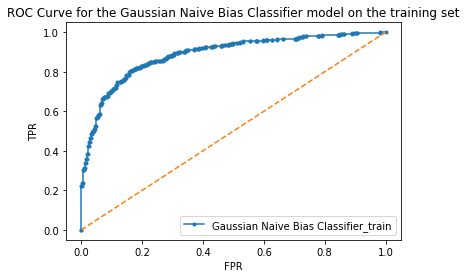



############################################Testing Set################################################ 

Classification report for the Gaussian Naive Bias Classifier model on the testing set is 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



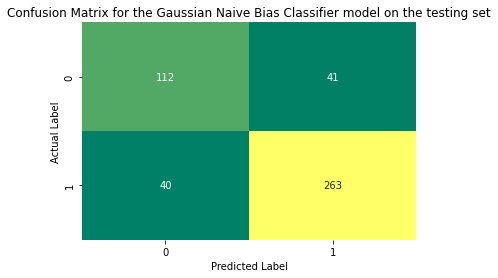

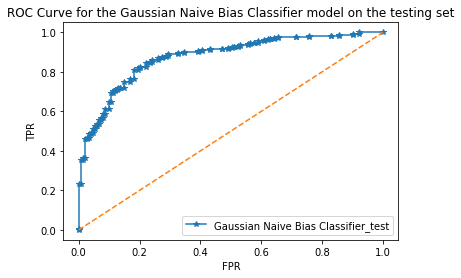



The performance metrics for the Gaussian Naive Bias Classifier model


Train      Test
Accuracy       0.835061  0.822368
ROC-AUC        0.887938  0.876356
Precision      0.875486  0.865132
Recall         0.895225  0.867987
F1-Score       0.885246  0.866557
Mean_CV_Score  0.828487  0.828889

In [ ]:
model_func(clfNB, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

## **1.6. Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.**

### **Custom Function for getting Model Performance Parameters after Model Tuning**

In [ ]:
# Custom Function after grid search

def grid_model_func(model, best_grid_estimator, x_train, x_test, Y_train, Y_test):

  # Predict on both train and test set
  Y_train_predict = best_grid_estimator.predict(x_train)
  Y_test_predict = best_grid_estimator.predict(x_test)

  # Print classification report for the training data
  print('Classification report for the {} model after grid search on the training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

  # Display the confusion matrix for the train data
  sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
  plt.title('Confusion Matrix for the {} model after grid search on the training set'.format(model_names[model]))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the train data
  fpr_train, tpr_train, thresholds = roc_curve(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
  plt.plot(fpr_train, tpr_train, marker='.')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model after grid search on the training set'.format(model_names[model]))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_train_GS'.format(model_names[model])], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the train set

  acc_train = accuracy_score(Y_train,Y_train_predict)
  roc_train = roc_auc_score(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
  precision_train = precision_score(Y_train,Y_train_predict)
  recall_train = recall_score(Y_train,Y_train_predict)
  f1_train = f1_score(Y_train,Y_train_predict)
  train_scores = cross_val_score(best_grid_estimator, x_train, Y_train, cv=10)
  mean_cv_score_train = np.mean(train_scores)
  
  print('############################################Testing Set################################################', '\n')

  # Print classification report for the testing data
  print('Classification report for the {} model after grid search on the testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

  # Display the confusion matrix for the test data
  sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
  plt.title('Confusion Matrix for the {} model after grid search on the testing set'.format(model_names[model]))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the test data
  fpr_test, tpr_test, thresholds = roc_curve(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
  plt.plot(fpr_test, tpr_test, marker='*')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model after grid search on the testing set'.format(model_names[model]))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_test_GS'.format(model_names[model])], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the test set
  acc_test = accuracy_score(Y_test,Y_test_predict)
  roc_test = roc_auc_score(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
  precision_test = precision_score(Y_test,Y_test_predict)
  recall_test = recall_score(Y_test,Y_test_predict)
  f1_test = f1_score(Y_test,Y_test_predict)
  test_scores = cross_val_score(best_grid_estimator, x_test, Y_test, cv=10)
  mean_cv_score_test = np.mean(test_scores)
  
  # Display the performance metrics in a dataframe
  index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
  data = pd.DataFrame({'Train':[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       'Test':[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
  round(data,3)
  print('The performance metrics for the {} model after grid search'.format(model_names[model]))
  return data

### **Custom Function for Getting Best Estimator**

In [ ]:
# Custom function for getting best estimator

def grid (model, parameter_grid, X, y):
  param_grid = parameter_grid

  grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs=-1)

  #Fit the model on the training data
  grid_search.fit(X, y)

  #Print the best parameters after grid search
  grid_search.best_params_

  print(grid_search.best_params_)
  
  # Create the best grid estimator
  best_grid_estimator = grid_search.best_estimator_

  return best_grid_estimator

### Parameter Grid for KNN Classifier

In [ ]:
param_grid_KNN = {
    'n_neighbors': [2,3,4,5],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski','euclidean','manhattan'],
  }

#### Performance metrics for KNN model after grid search without scaling

In [ ]:
best_grid_estimator_KNN = grid(clfKNN, param_grid_KNN, X_train, y_train)

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}


Classification report for the K-Nearest Neighbours Classifier model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



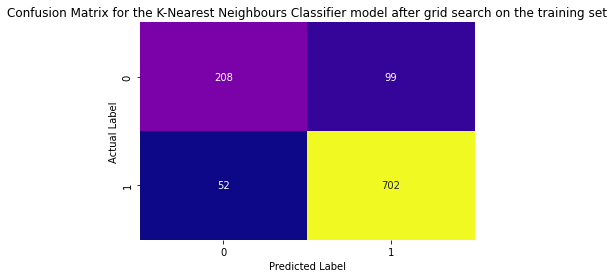

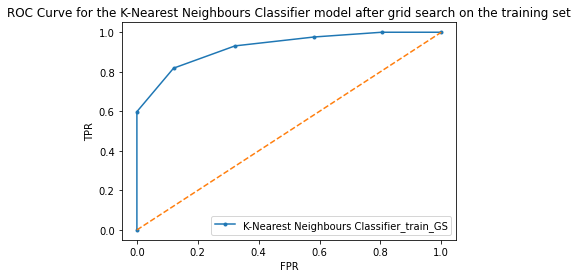



############################################Testing Set################################################ 

Classification report for the K-Nearest Neighbours Classifier model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



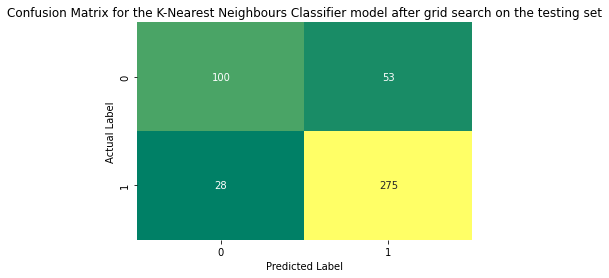

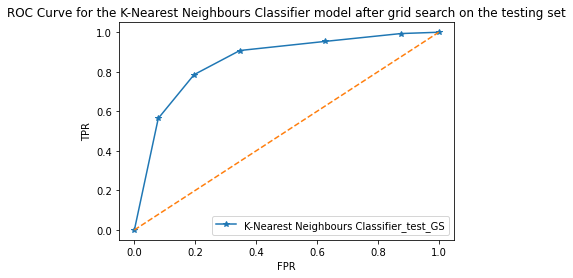



The performance metrics for the K-Nearest Neighbours Classifier model after grid search


Train      Test
Accuracy       0.857681  0.822368
ROC-AUC        0.924783  0.855940
Precision      0.876404  0.838415
Recall         0.931034  0.907591
F1-Score       0.902894  0.871632
Mean_CV_Score  0.795486  0.780676

In [ ]:
grid_model_func(clfKNN, best_grid_estimator_KNN, X_train, X_test, y_train, y_test)

#### Performance metrics for KNN model after grid search with scaling

In [ ]:
best_grid_estimator_KNN_scaled = grid(clfKNN, param_grid_KNN, X_scaled_train, y_scaled_train)

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}


Classification report for the K-Nearest Neighbours Classifier model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



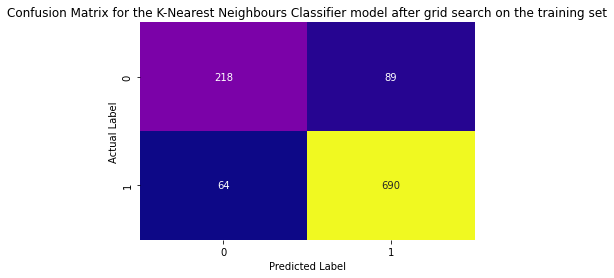

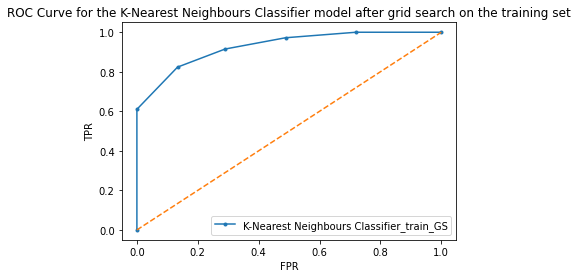



############################################Testing Set################################################ 

Classification report for the K-Nearest Neighbours Classifier model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



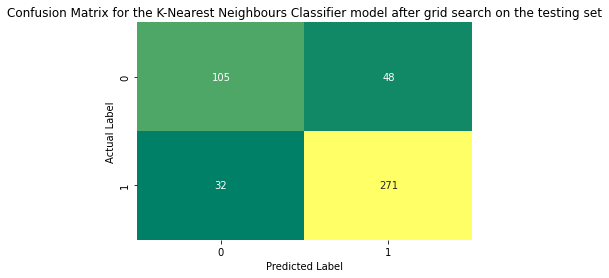

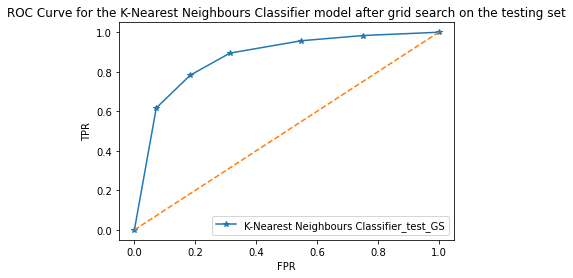



The performance metrics for the K-Nearest Neighbours Classifier model after grid search


Train      Test
Accuracy       0.855796  0.824561
ROC-AUC        0.927339  0.870241
Precision      0.885751  0.849530
Recall         0.915119  0.894389
F1-Score       0.900196  0.871383
Mean_CV_Score  0.816214  0.804783

In [ ]:
grid_model_func(clfKNN, best_grid_estimator_KNN_scaled, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

### Parameter Grid for Gaussian Naive Bias Classifier

In [ ]:
param_grid_NB = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

#### Performance metrics for Gaussian Naive Bias model after grid search without scaling

In [ ]:
best_grid_estimator_NB = grid(clfNB, param_grid_NB, X_train, y_train)

{'var_smoothing': 0.0006579332246575676}


Classification report for the Gaussian Naive Bias Classifier model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



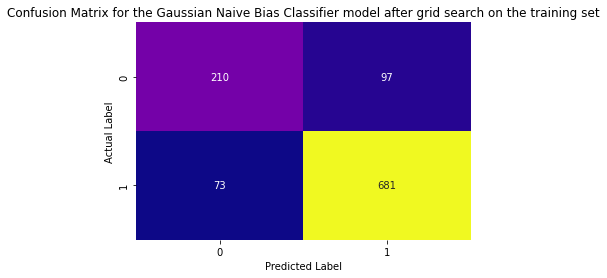

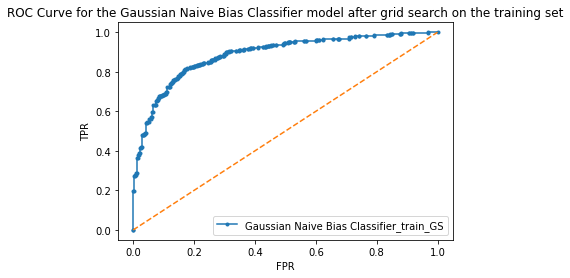



############################################Testing Set################################################ 

Classification report for the Gaussian Naive Bias Classifier model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



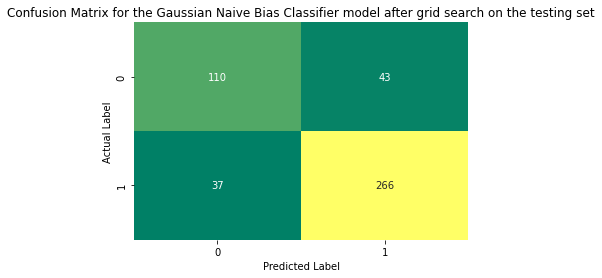

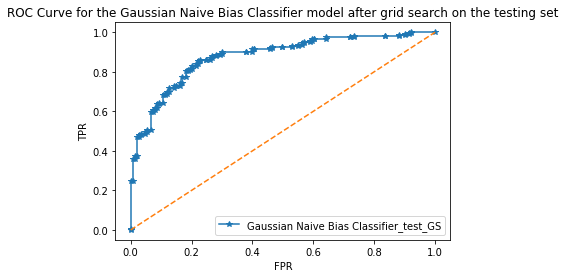



The performance metrics for the Gaussian Naive Bias Classifier model after grid search


Train      Test
Accuracy       0.839774  0.824561
ROC-AUC        0.887302  0.878686
Precision      0.875321  0.860841
Recall         0.903183  0.877888
F1-Score       0.889034  0.869281
Mean_CV_Score  0.830356  0.828937

In [ ]:
grid_model_func(clfNB, best_grid_estimator_NB, X_train, X_test, y_train, y_test)

#### Performance metrics for Gaussian Naive Bias model after grid search without scaling

In [ ]:
best_grid_estimator_NB_scaled = grid(clfNB, param_grid_NB, X_scaled_train, y_scaled_train)

{'var_smoothing': 0.43287612810830584}


Classification report for the Gaussian Naive Bias Classifier model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



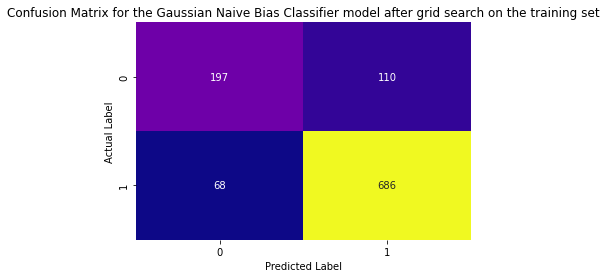

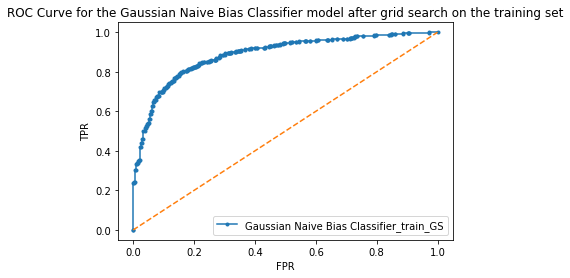



############################################Testing Set################################################ 

Classification report for the Gaussian Naive Bias Classifier model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



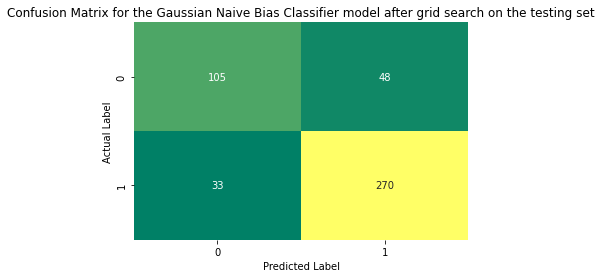

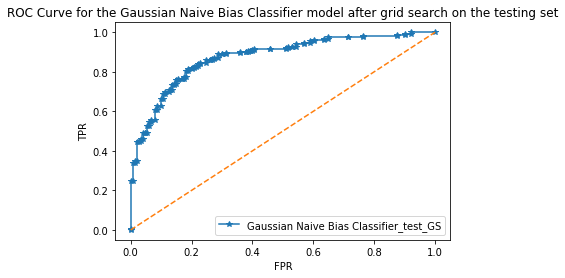



The performance metrics for the Gaussian Naive Bias Classifier model after grid search


Train      Test
Accuracy       0.832234  0.822368
ROC-AUC        0.887920  0.875968
Precision      0.861809  0.849057
Recall         0.909814  0.891089
F1-Score       0.885161  0.869565
Mean_CV_Score  0.830347  0.826763

In [ ]:
grid_model_func(clfNB, best_grid_estimator_NB_scaled, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

### Parmeter Grid for Logistic Regression

In [ ]:
# Parameter Grid for Logistic Regression
param_grid_LR = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'tol': [0.0001,0.00001,0.000001],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'max_iter': [100,1000,10000,100000],
  }

##### Performance metrics for Logistic Regression model after grid search without scaling

In [ ]:
best_grid_estimator_LR = grid(clfLR, param_grid_LR, X_train, y_train)

{'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga', 'tol': 1e-05}


Classification report for the Logistic Regression model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



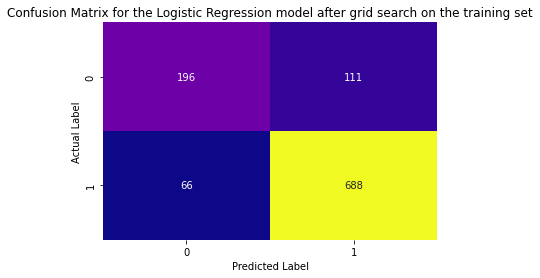

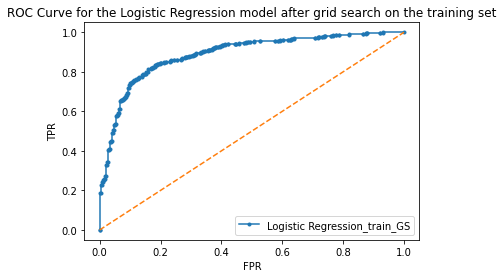



############################################Testing Set################################################ 

Classification report for the Logistic Regression model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



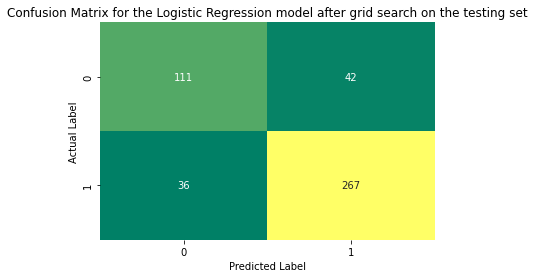

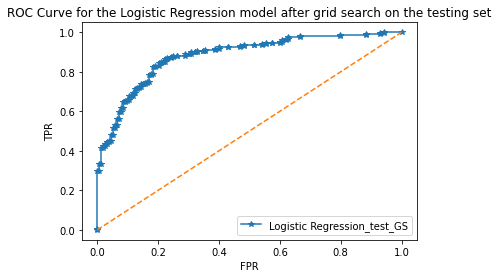



The performance metrics for the Logistic Regression model after grid search


Train      Test
Accuracy       0.833176  0.828947
ROC-AUC        0.890141  0.882180
Precision      0.861076  0.864078
Recall         0.912467  0.881188
F1-Score       0.886027  0.872549
Mean_CV_Score  0.830356  0.831111

In [ ]:
grid_model_func(clfLR, best_grid_estimator_LR, X_train, X_test, y_train, y_test)

##### Performance metrics for Logistic Regression model after grid search with scaling

In [ ]:
best_grid_estimator_LR_scaled = grid(clfLR, param_grid_LR, X_scaled_train, y_scaled_train)

{'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


Classification report for the Logistic Regression model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



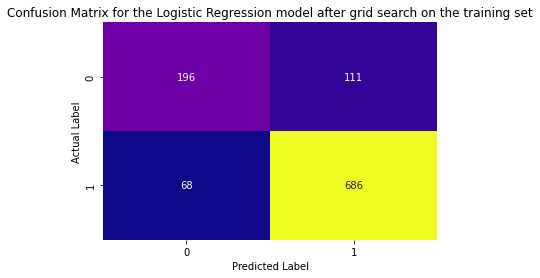

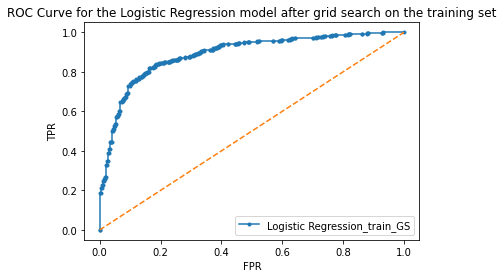



############################################Testing Set################################################ 

Classification report for the Logistic Regression model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



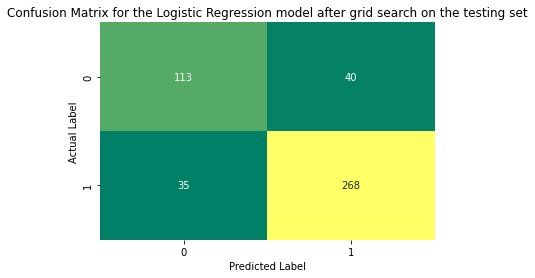

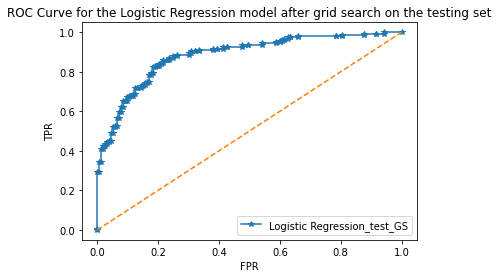



The performance metrics for the Logistic Regression model after grid search


Train      Test
Accuracy       0.831291  0.835526
ROC-AUC        0.889990  0.882784
Precision      0.860728  0.870130
Recall         0.909814  0.884488
F1-Score       0.884591  0.877250
Mean_CV_Score  0.831300  0.837729

In [ ]:
grid_model_func(clfLR, best_grid_estimator_LR_scaled, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

### Parameter Grid for Linear Discriminant Analysis

In [ ]:
param_grid_LDA = {
    'solver':['svd', 'lsqr', 'eigen'],
    'tol': [0.0001,0.00001,0.000001],
    }

##### Performance metrics for LDA after grid search without scaling

In [ ]:
best_grid_estimator_LDA = grid(clfLDA, param_grid_LDA, X_train, y_train)

{'solver': 'svd', 'tol': 0.0001}


Classification report for the Linear Discriminant Analysis model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



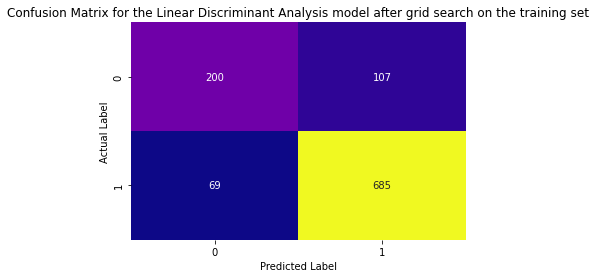

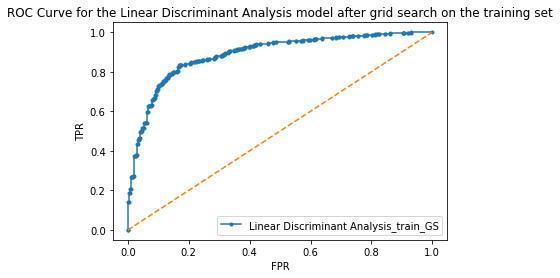



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



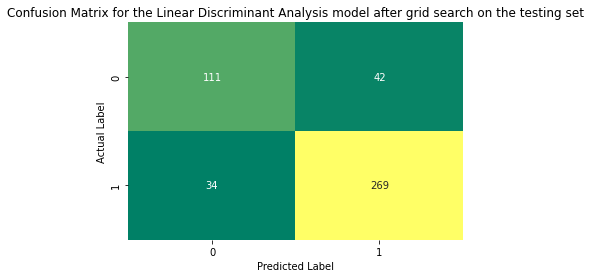

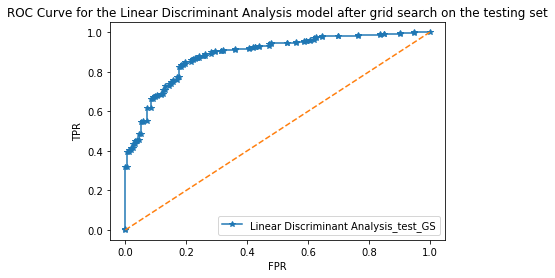



The performance metrics for the Linear Discriminant Analysis model after grid search


Train      Test
Accuracy       0.834119  0.833333
ROC-AUC        0.889367  0.887638
Precision      0.864899  0.864952
Recall         0.908488  0.887789
F1-Score       0.886158  0.876221
Mean_CV_Score  0.825666  0.839952

In [ ]:
grid_model_func(clfLDA, best_grid_estimator_LDA, X_train, X_test, y_train, y_test)

##### Performance metrics for Linear Discriminant Analysis with grid search after scaling

In [ ]:
best_grid_estimator_LDA_scaled = grid(clfLDA, param_grid_LDA, X_scaled_train, y_scaled_train)

{'solver': 'svd', 'tol': 0.0001}


Classification report for the Linear Discriminant Analysis model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



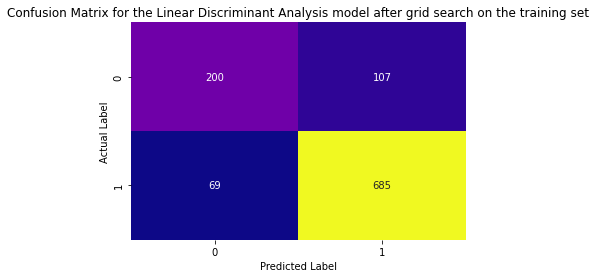

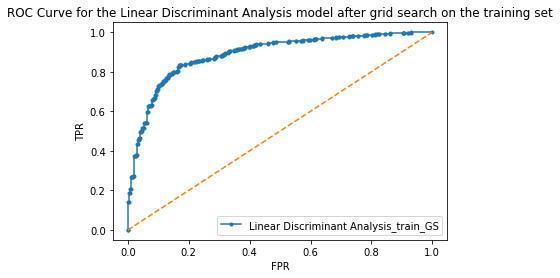



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



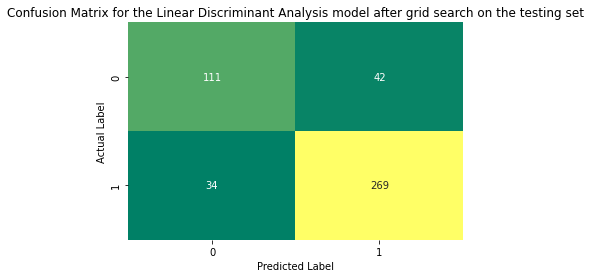

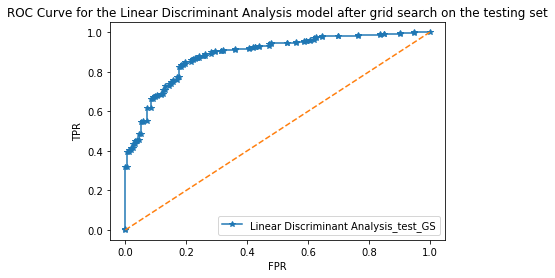



The performance metrics for the Linear Discriminant Analysis model after grid search


Train      Test
Accuracy       0.834119  0.833333
ROC-AUC        0.889367  0.887638
Precision      0.864899  0.864952
Recall         0.908488  0.887789
F1-Score       0.886158  0.876221
Mean_CV_Score  0.825666  0.839952

In [ ]:
grid_model_func(clfLDA, best_grid_estimator_LDA_scaled, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test )

### Ensemble Random Forest

##### Ensemble Random Forest without Scaling

Classification report for the Ensemble Random Forest model on the training set is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



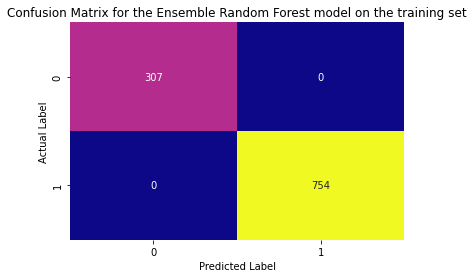

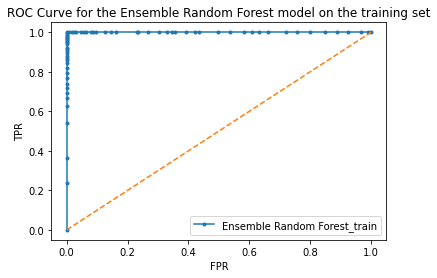



############################################Testing Set################################################ 

Classification report for the Ensemble Random Forest model on the testing set is 
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



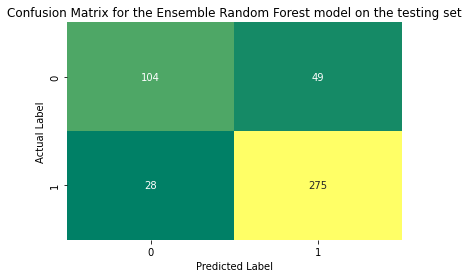

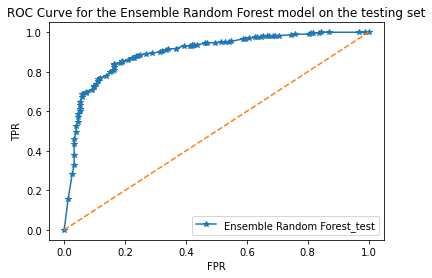



The performance metrics for the Ensemble Random Forest model


Train      Test
Accuracy       1.000000  0.831140
ROC-AUC        1.000000  0.895414
Precision      1.000000  0.848765
Recall         1.000000  0.907591
F1-Score       1.000000  0.877193
Mean_CV_Score  0.819988  0.795845

In [ ]:
model_func(clfRF, X_train, X_test, y_train, y_test)

##### Ensemble Random Forest With Scaling

Classification report for the Ensemble Random Forest model on the training set is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



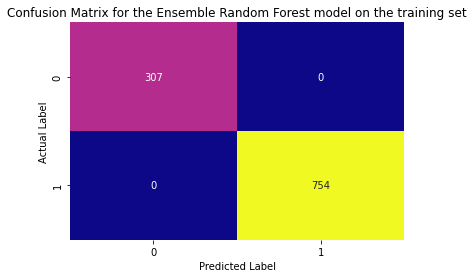

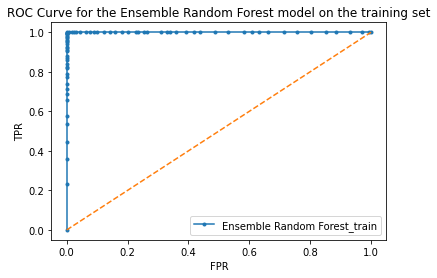



############################################Testing Set################################################ 

Classification report for the Ensemble Random Forest model on the testing set is 
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



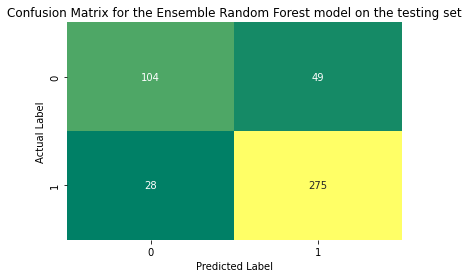

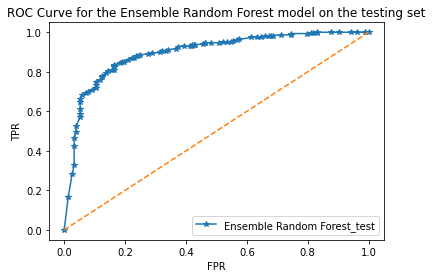



The performance metrics for the Ensemble Random Forest model


Train      Test
Accuracy       1.000000  0.831140
ROC-AUC        1.000000  0.895533
Precision      1.000000  0.848765
Recall         1.000000  0.907591
F1-Score       1.000000  0.877193
Mean_CV_Score  0.819988  0.793671

In [ ]:
model_func(clfRF, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

##### Parameter Grid for Random Forest

In [ ]:
param_grid_RF = {
    'n_estimators':[100, 250, 500],
    'criterion': ['gini', 'entropy'],
    'max_features':['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False], 
    'max_samples': [100, 250, 500],
    }

##### Ensemble Random Forest with grid search without scaling

In [ ]:
best_grid_estimator_RF = grid(clfRF, param_grid_RF, X_train, y_train)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'max_samples': 250, 'n_estimators': 100}


Classification report for the Ensemble Random Forest model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       307
           1       0.91      0.95      0.93       754

    accuracy                           0.90      1061
   macro avg       0.89      0.86      0.87      1061
weighted avg       0.90      0.90      0.90      1061



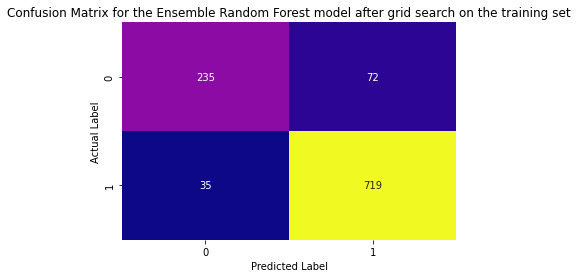

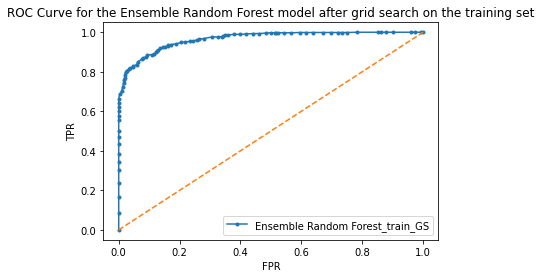



############################################Testing Set################################################ 

Classification report for the Ensemble Random Forest model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.81      0.69      0.74       153
           1       0.85      0.92      0.89       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.82       456
weighted avg       0.84      0.84      0.84       456



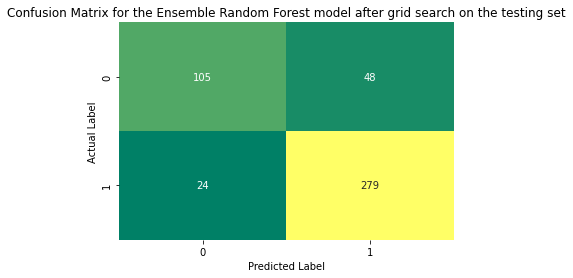

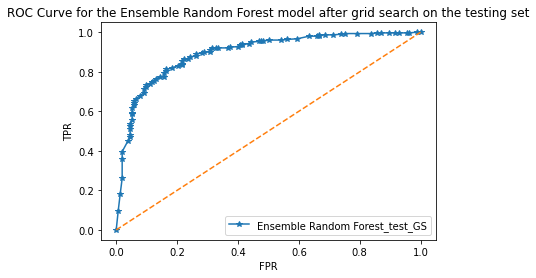



The performance metrics for the Ensemble Random Forest model after grid search


Train      Test
Accuracy       0.899152  0.842105
ROC-AUC        0.966820  0.895080
Precision      0.908976  0.853211
Recall         0.953581  0.920792
F1-Score       0.930744  0.885714
Mean_CV_Score  0.836934  0.784879

In [ ]:
grid_model_func(clfRF, best_grid_estimator_RF, X_train, X_test, y_train, y_test)

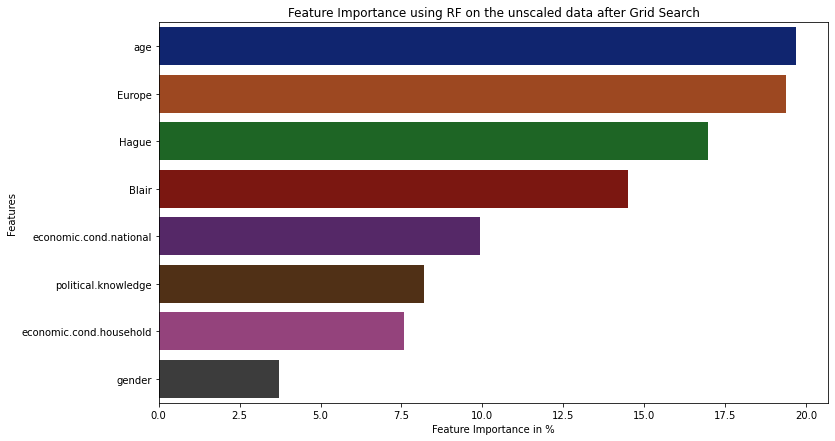

In [ ]:
clfRF1=RandomForestClassifier(bootstrap= True, criterion= 'gini', max_features= 'log2', max_samples= 250, n_estimators= 100)

#Fit the model on the training data
clfRF1.fit(X_train, y_train)

x=pd.DataFrame(clfRF1.feature_importances_*100,index=X.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF on the unscaled data after Grid Search')
plt.show()

##### Ensemble Random Forest Model after grid search with scaling

In [ ]:
best_grid_estimator_RF_scaled = grid(clfRF, param_grid_RF, X_scaled_train, y_scaled_train)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'max_samples': 250, 'n_estimators': 250}


Classification report for the Ensemble Random Forest model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       307
           1       0.91      0.95      0.93       754

    accuracy                           0.90      1061
   macro avg       0.89      0.86      0.87      1061
weighted avg       0.90      0.90      0.90      1061



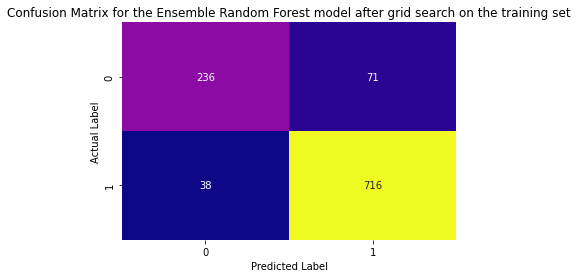

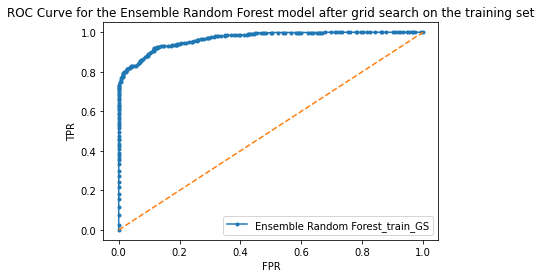



############################################Testing Set################################################ 

Classification report for the Ensemble Random Forest model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



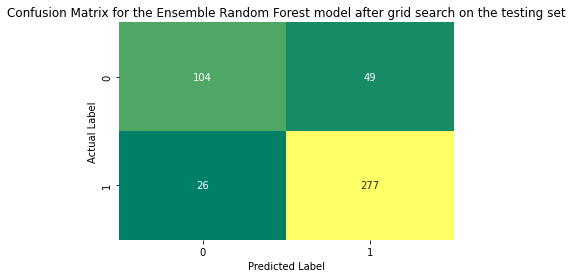

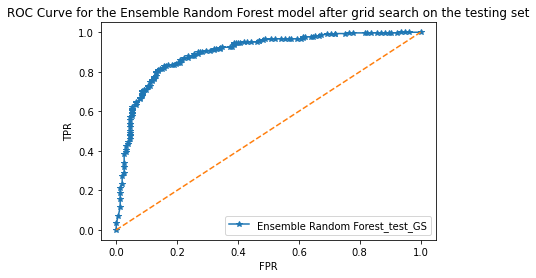



The performance metrics for the Ensemble Random Forest model after grid search


Train      Test
Accuracy       0.897267  0.835526
ROC-AUC        0.968479  0.897560
Precision      0.909784  0.849693
Recall         0.949602  0.914191
F1-Score       0.929267  0.880763
Mean_CV_Score  0.835038  0.791546

In [ ]:
grid_model_func(clfRF, best_grid_estimator_RF_scaled, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test )

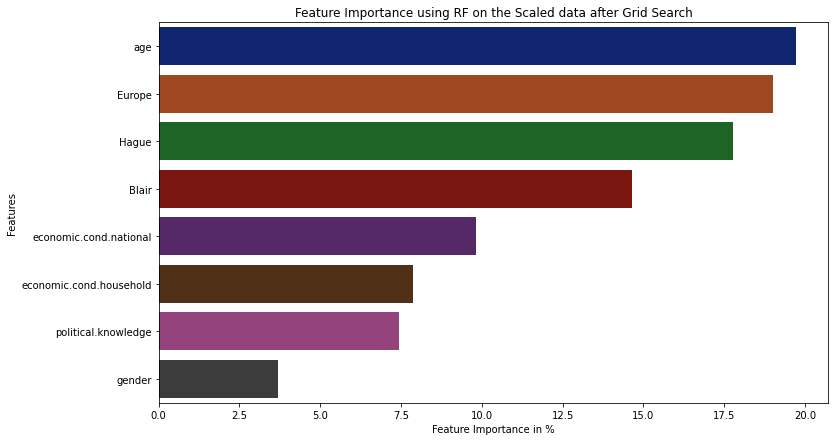

In [ ]:
clfRF1=RandomForestClassifier(bootstrap= True, criterion= 'gini', max_features= 'log2', max_samples= 250, n_estimators= 250)

#Fit the model on the training data
clfRF1.fit(X_scaled_train, y_scaled_train)

x=pd.DataFrame(clfRF1.feature_importances_*100,index=X.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF on the Scaled data after Grid Search')
plt.show()

### Bagging Classifier

##### Bagging Classifier without scaling

Classification report for the Bagging Classifier Model model on the training set is 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       307
           1       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.96      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



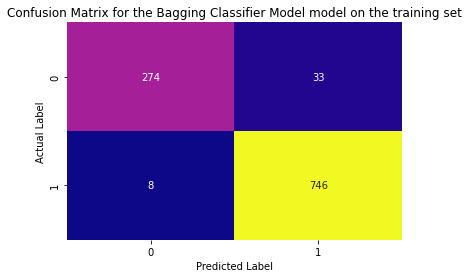

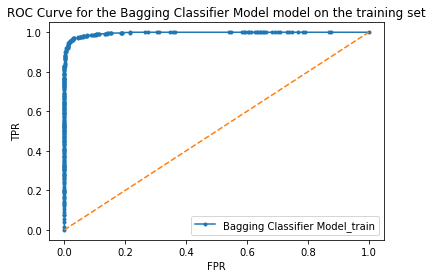



############################################Testing Set################################################ 

Classification report for the Bagging Classifier Model model on the testing set is 
               precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



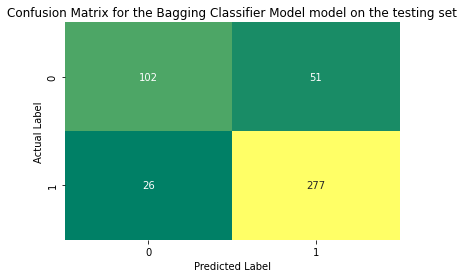

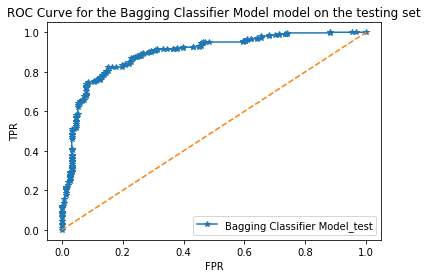



The performance metrics for the Bagging Classifier Model model


Train      Test
Accuracy       0.961357  0.831140
ROC-AUC        0.995745  0.894681
Precision      0.957638  0.844512
Recall         0.989390  0.914191
F1-Score       0.973255  0.877971
Mean_CV_Score  0.833169  0.795894

In [ ]:
model_func(clfBGCL, X_train, X_test, y_train, y_test)

##### Bagging Classifier With Scaling

Classification report for the Bagging Classifier Model model on the training set is 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       307
           1       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.96      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



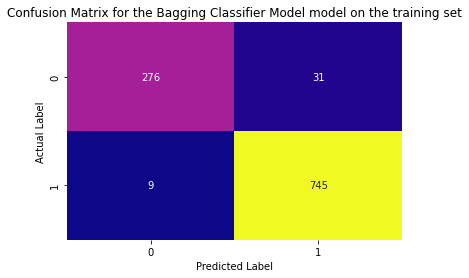

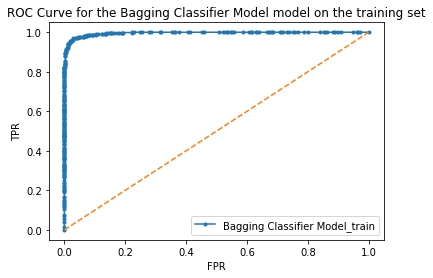



############################################Testing Set################################################ 

Classification report for the Bagging Classifier Model model on the testing set is 
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



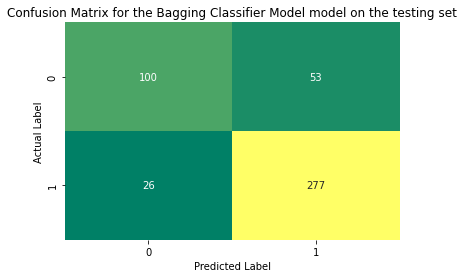

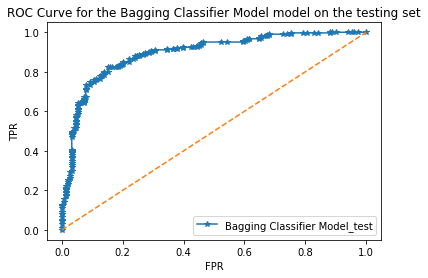



The performance metrics for the Bagging Classifier Model model


Train      Test
Accuracy       0.962300  0.826754
ROC-AUC        0.995641  0.894929
Precision      0.960052  0.839394
Recall         0.988064  0.914191
F1-Score       0.973856  0.875197
Mean_CV_Score  0.829404  0.798068

In [ ]:
model_func(clfBGCL, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

##### Parameter Grid for Bagging Classifier

In [ ]:
param_grid_BGCL = {
          'base_estimator__max_features': [None, 'auto'],
          'bootstrap_features': [False, True],
          'max_samples': [100, 250, 500],
}

##### Bagging Classifier after grid search without scaling

In [ ]:
best_grid_estimator_BGCL = grid(clfBGCL, param_grid_BGCL, X_train, y_train)

{'base_estimator__max_features': 'auto', 'bootstrap_features': False, 'max_samples': 500}


Classification report for the Bagging Classifier Model model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       307
           1       0.91      0.96      0.93       754

    accuracy                           0.90      1061
   macro avg       0.90      0.86      0.88      1061
weighted avg       0.90      0.90      0.90      1061



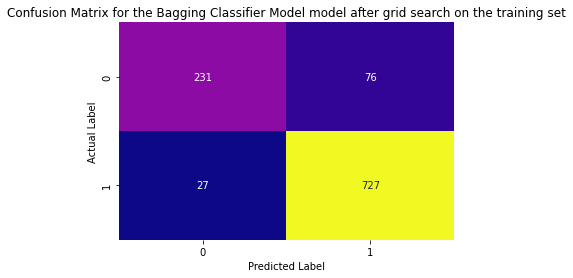

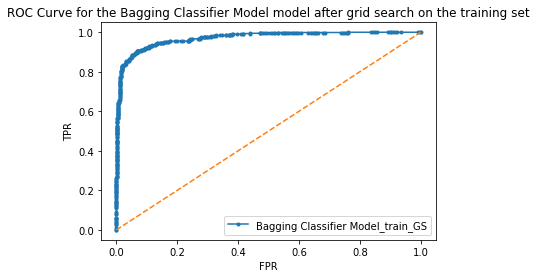



############################################Testing Set################################################ 

Classification report for the Bagging Classifier Model model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



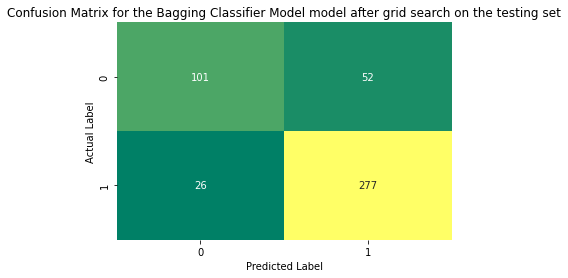

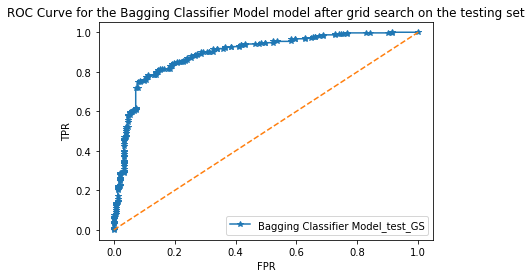



The performance metrics for the Bagging Classifier Model model after grid search


Train      Test
Accuracy       0.902922  0.828947
ROC-AUC        0.971308  0.894314
Precision      0.905355  0.841945
Recall         0.964191  0.914191
F1-Score       0.933847  0.876582
Mean_CV_Score  0.840725       NaN

In [ ]:
grid_model_func(clfBGCL, best_grid_estimator_BGCL, X_train, X_test, y_train, y_test)

##### Bagging Classifier after grid search with scaling

In [ ]:
best_grid_estimator_BGCL_scaled = grid(clfBGCL, param_grid_BGCL, X_scaled_train, y_scaled_train)

{'base_estimator__max_features': 'auto', 'bootstrap_features': False, 'max_samples': 500}


Classification report for the Bagging Classifier Model model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.90      0.76      0.82       307
           1       0.91      0.96      0.93       754

    accuracy                           0.90      1061
   macro avg       0.90      0.86      0.88      1061
weighted avg       0.90      0.90      0.90      1061



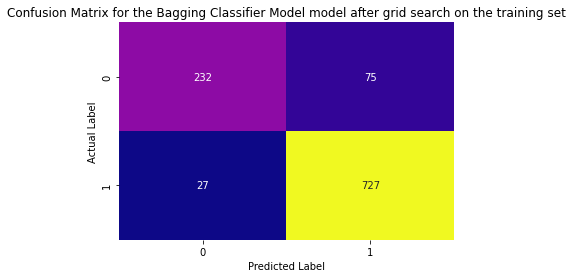

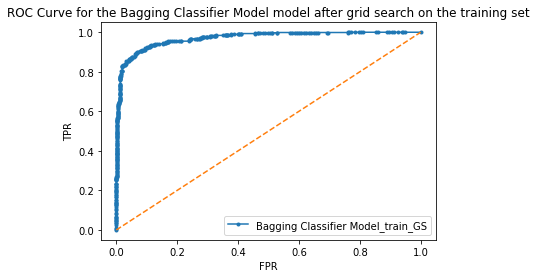



############################################Testing Set################################################ 

Classification report for the Bagging Classifier Model model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



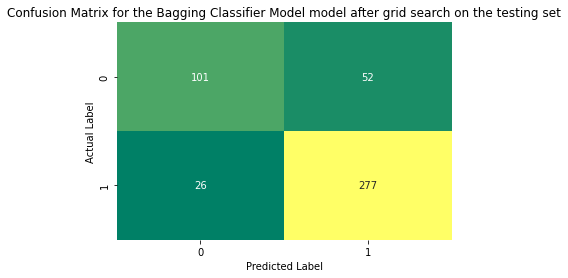

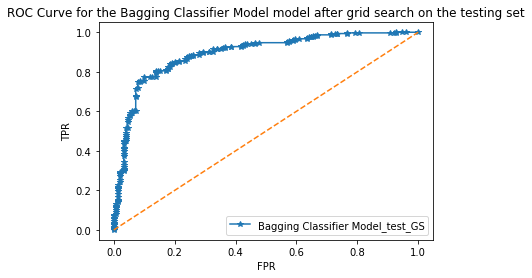



The performance metrics for the Bagging Classifier Model model after grid search


Train      Test
Accuracy       0.903864  0.828947
ROC-AUC        0.970973  0.893958
Precision      0.906484  0.841945
Recall         0.964191  0.914191
F1-Score       0.934447  0.876582
Mean_CV_Score  0.839781       NaN

In [ ]:
grid_model_func(clfBGCL, best_grid_estimator_BGCL_scaled, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test )

### Adaptive Boost

##### Adaptive Boost Classifier Without Sclaing

Classification report for the Ada Boost model on the training set is 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



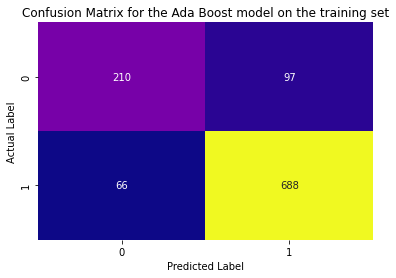

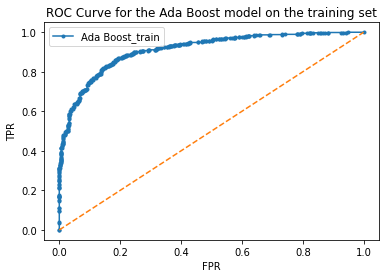



############################################Testing Set################################################ 

Classification report for the Ada Boost model on the testing set is 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



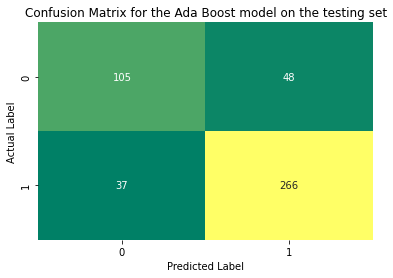

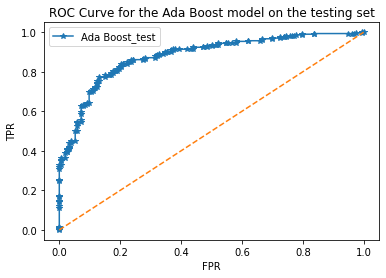



The performance metrics for the Ada Boost model


Train      Test
Accuracy       0.846371  0.813596
ROC-AUC        0.911899  0.880552
Precision      0.876433  0.847134
Recall         0.912467  0.877888
F1-Score       0.894087  0.862237
Mean_CV_Score  0.823770  0.774251

In [ ]:
model_func(clfADB, X_train, X_test, y_train, y_test)

##### Adaptive Boost With Scaling

Classification report for the Ada Boost model on the training set is 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



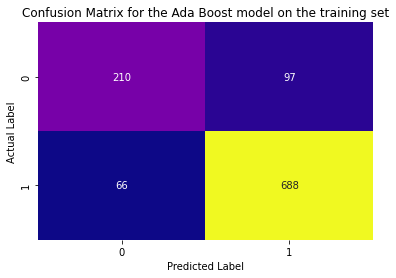

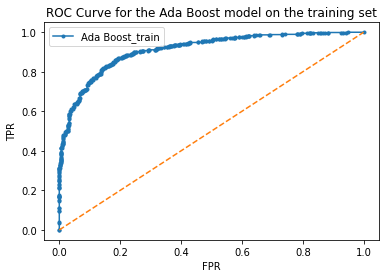



############################################Testing Set################################################ 

Classification report for the Ada Boost model on the testing set is 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



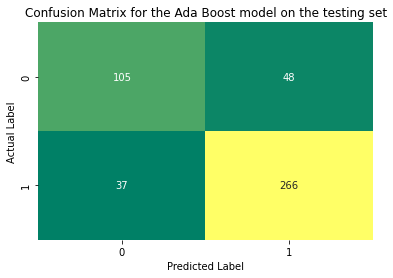

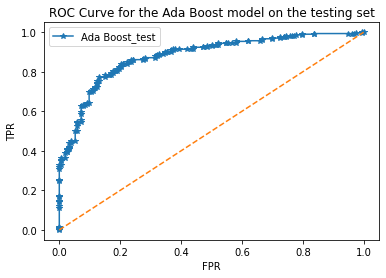



The performance metrics for the Ada Boost model


Train      Test
Accuracy       0.846371  0.813596
ROC-AUC        0.911899  0.880552
Precision      0.876433  0.847134
Recall         0.912467  0.877888
F1-Score       0.894087  0.862237
Mean_CV_Score  0.823770  0.776473

In [ ]:
model_func(clfADB, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

##### Parameter grid for Adaboost Model

In [ ]:
param_grid_ADB = {
          'n_estimators': [50, 100, 150],
          'learning_rate': [1.0, 1.5, 2.0],
          'algorithm': ['SAMME', 'SAMME.R'],
}

##### Adaboost model after grid search without scaling

In [ ]:
best_grid_estimator_ADB = grid(clfADB, param_grid_ADB, X_train, y_train)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}


Classification report for the Ada Boost model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.76      0.66      0.71       307
           1       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



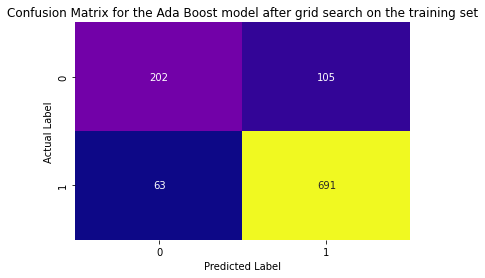

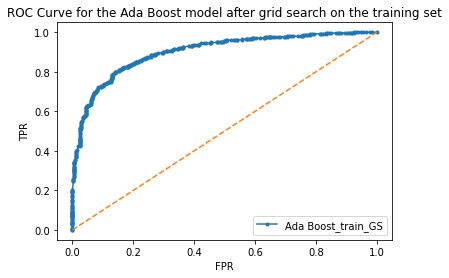



############################################Testing Set################################################ 

Classification report for the Ada Boost model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



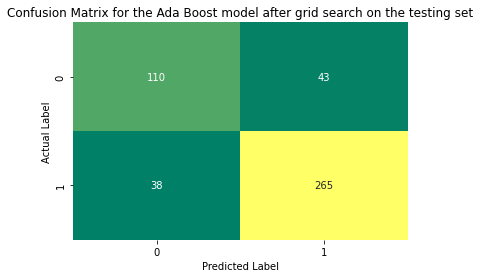

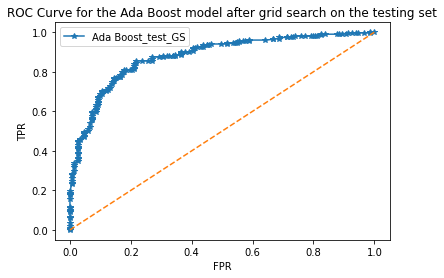



The performance metrics for the Ada Boost model after grid search


Train      Test
Accuracy       0.841659  0.822368
ROC-AUC        0.901943  0.879107
Precision      0.868090  0.860390
Recall         0.916446  0.874587
F1-Score       0.891613  0.867430
Mean_CV_Score  0.830356  0.802657

In [ ]:
grid_model_func(clfADB, best_grid_estimator_ADB, X_train, X_test, y_train, y_test)

##### Adaboost after grid search with scaling

In [ ]:
best_grid_estimator_ADB_scaled = grid(clfADB, param_grid_ADB, X_scaled_train, y_scaled_train)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}


Classification report for the Ada Boost model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.76      0.66      0.71       307
           1       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



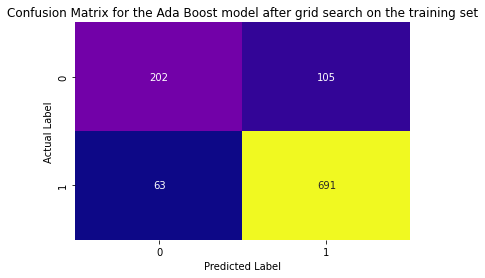

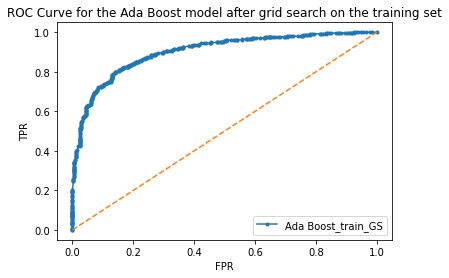



############################################Testing Set################################################ 

Classification report for the Ada Boost model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



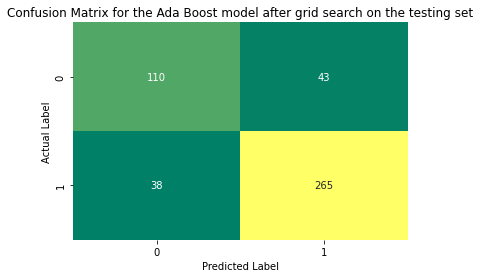

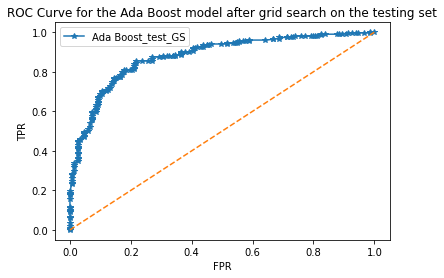



The performance metrics for the Ada Boost model after grid search


Train      Test
Accuracy       0.841659  0.822368
ROC-AUC        0.901943  0.879107
Precision      0.868090  0.860390
Recall         0.916446  0.874587
F1-Score       0.891613  0.867430
Mean_CV_Score  0.830356  0.802657

In [ ]:
grid_model_func(clfADB, best_grid_estimator_ADB_scaled, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

### Gradient Boosting

#### Gradient Bossting Model Without Scaling

Classification report for the Gradient Boosting model on the training set is 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



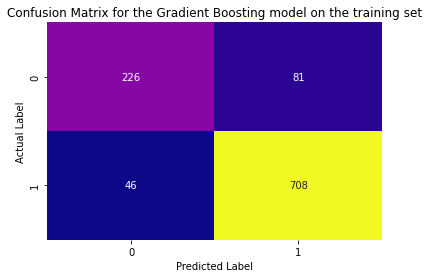

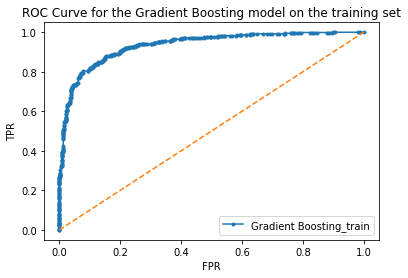



############################################Testing Set################################################ 

Classification report for the Gradient Boosting model on the testing set is 
               precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



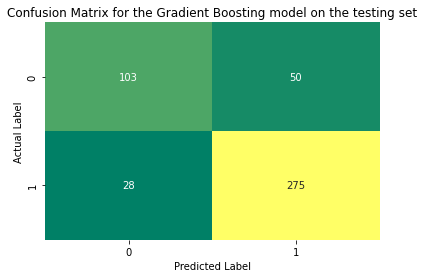

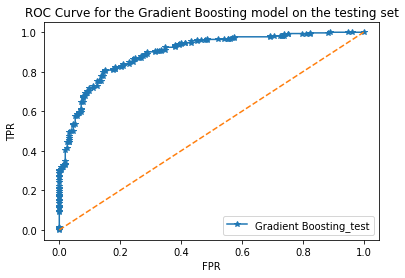



The performance metrics for the Gradient Boosting model


Train      Test
Accuracy       0.880302  0.828947
ROC-AUC        0.935275  0.897366
Precision      0.897338  0.846154
Recall         0.938992  0.907591
F1-Score       0.917693  0.875796
Mean_CV_Score  0.835981  0.796135

In [ ]:
model_func(clfGBC, X_train, X_test, y_train, y_test)

##### Gradient Bossting Model With Scaling

Classification report for the Gradient Boosting model on the training set is 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



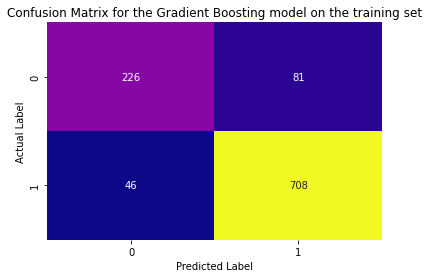

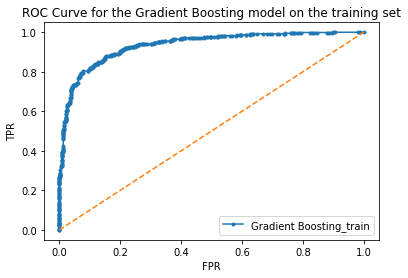



############################################Testing Set################################################ 

Classification report for the Gradient Boosting model on the testing set is 
               precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



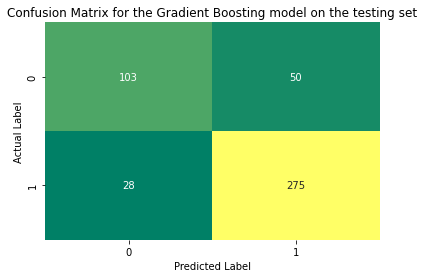

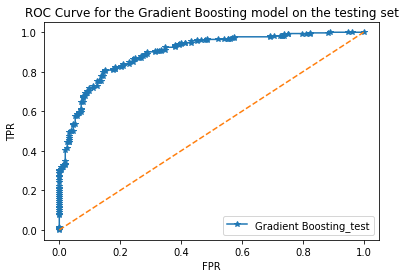



The performance metrics for the Gradient Boosting model


Train      Test
Accuracy       0.880302  0.828947
ROC-AUC        0.935275  0.897388
Precision      0.897338  0.846154
Recall         0.938992  0.907591
F1-Score       0.917693  0.875796
Mean_CV_Score  0.835981  0.796135

In [ ]:
model_func(clfGBC, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

##### Parameter Grid for Gradient Boosting Model

In [ ]:
param_grid_GBC = {
          'loss': ['deviance', 'exponential'],
          'n_estimators': [100, 150, 200],
          'learning_rate': [0.1, 0.5, 1.0],
          'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
          'max_features': ['auto', 'sqrt', 'log2'],
}

##### Gradient Boost Model after grid search without scaling

In [ ]:
best_grid_estimator_GBC = grid(clfGBC, param_grid_GBC, X_train, y_train)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_features': 'sqrt', 'n_estimators': 100}


Classification report for the Gradient Boosting model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



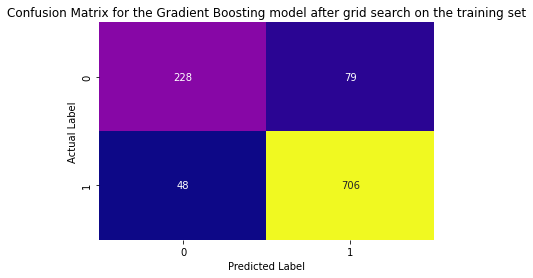

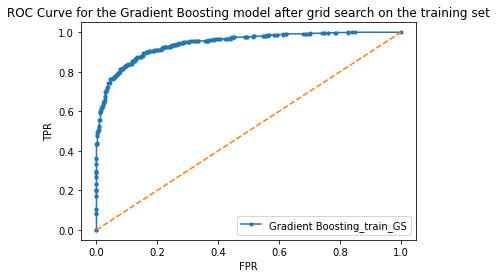



############################################Testing Set################################################ 

Classification report for the Gradient Boosting model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.78      0.71      0.75       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



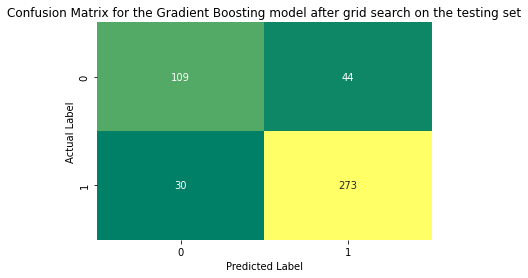

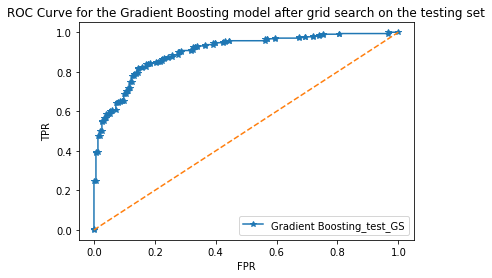



The performance metrics for the Gradient Boosting model after grid search


Train      Test
Accuracy       0.880302  0.837719
ROC-AUC        0.942789  0.901670
Precision      0.899363  0.861199
Recall         0.936340  0.900990
F1-Score       0.917479  0.880645
Mean_CV_Score  0.843546  0.811401

In [ ]:
grid_model_func(clfGBC, best_grid_estimator_GBC, X_train, X_test, y_train, y_test)

##### Gradient Bossting Model after grid search with scaling

In [ ]:
best_grid_estimator_GBC_scaled = grid(clfGBC, param_grid_GBC, X_scaled_train, y_scaled_train)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_features': 'sqrt', 'n_estimators': 100}


Classification report for the Gradient Boosting model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



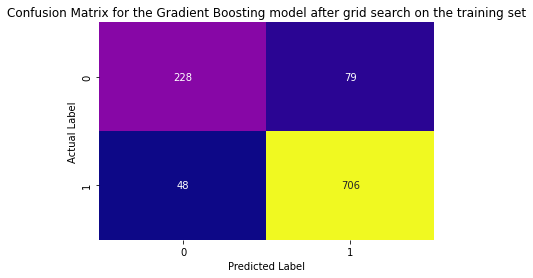

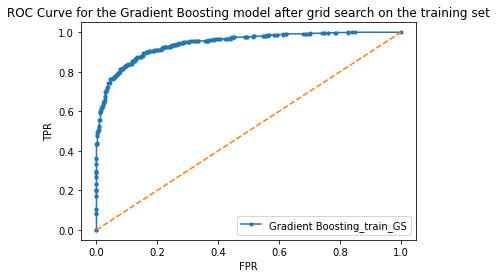



############################################Testing Set################################################ 

Classification report for the Gradient Boosting model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.78      0.71      0.75       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



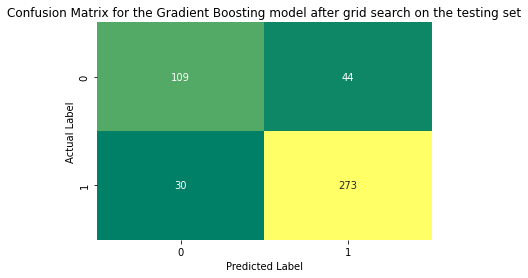

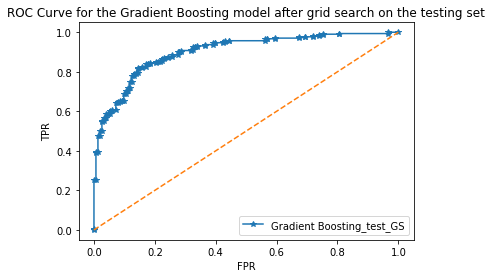



The performance metrics for the Gradient Boosting model after grid search


Train      Test
Accuracy       0.880302  0.837719
ROC-AUC        0.942789  0.901691
Precision      0.899363  0.861199
Recall         0.936340  0.900990
F1-Score       0.917479  0.880645
Mean_CV_Score  0.842603  0.811401

In [ ]:
grid_model_func(clfGBC, best_grid_estimator_GBC_scaled, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

### Support Vector Machine

Classification report for the Support Vector Machine model on the training set is 
               precision    recall  f1-score   support

           0       0.90      0.08      0.15       307
           1       0.73      1.00      0.84       754

    accuracy                           0.73      1061
   macro avg       0.81      0.54      0.50      1061
weighted avg       0.78      0.73      0.64      1061



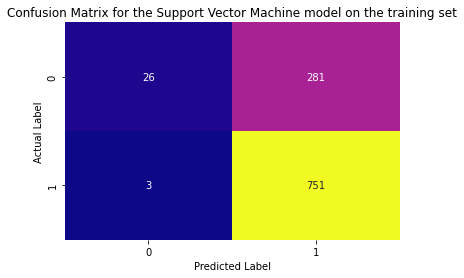

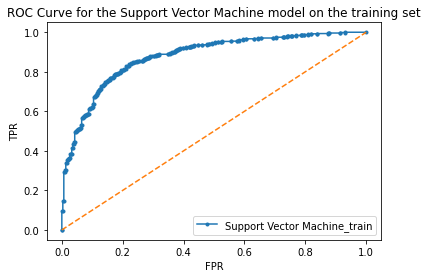



############################################Testing Set################################################ 

Classification report for the Support Vector Machine model on the testing set is 
               precision    recall  f1-score   support

           0       0.86      0.08      0.14       153
           1       0.68      0.99      0.81       303

    accuracy                           0.69       456
   macro avg       0.77      0.54      0.48       456
weighted avg       0.74      0.69      0.59       456



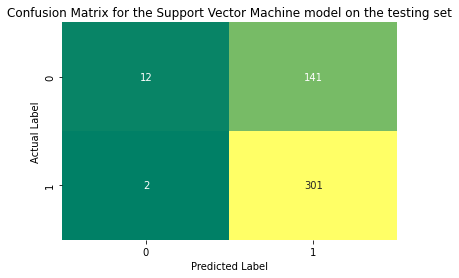

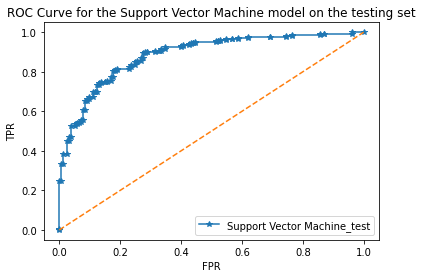



The performance metrics for the Support Vector Machine model


Train      Test
Accuracy       0.732328  0.686404
ROC-AUC        0.878325  0.885891
Precision      0.727713  0.680995
Recall         0.996021  0.993399
F1-Score       0.840985  0.808054
Mean_CV_Score  0.720076  0.664444

In [ ]:
model_func(clfSVM, X_train, X_test, y_train, y_test)

Classification report for the Support Vector Machine model on the training set is 
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       307
           1       0.89      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.86      0.87      0.86      1061



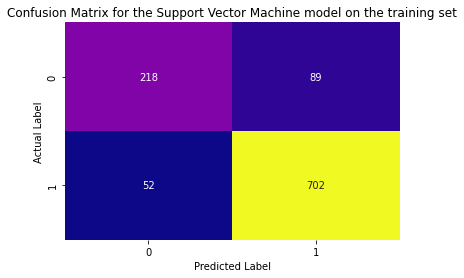

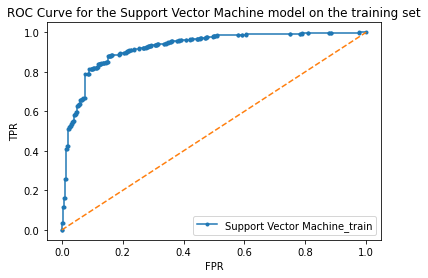



############################################Testing Set################################################ 

Classification report for the Support Vector Machine model on the testing set is 
               precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



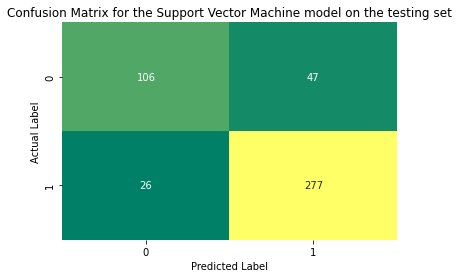

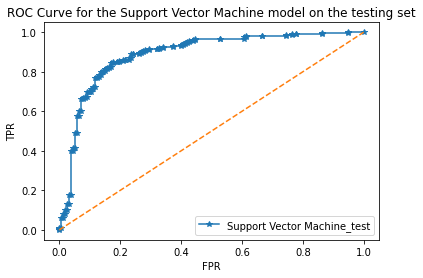



The performance metrics for the Support Vector Machine model


Train      Test
Accuracy       0.867107  0.839912
ROC-AUC        0.922999  0.888026
Precision      0.887484  0.854938
Recall         0.931034  0.914191
F1-Score       0.908738  0.883573
Mean_CV_Score  0.836034  0.822222

In [ ]:
model_func(clfSVM, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

### XGBoost

Classification report for the XGBoost model on the training set is 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.88      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



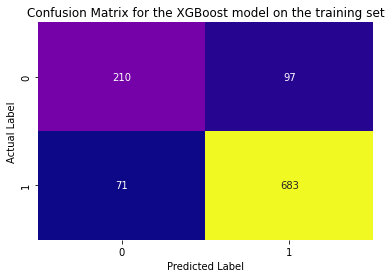

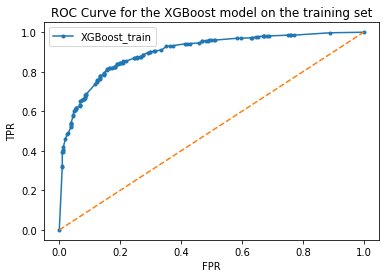



############################################Testing Set################################################ 

Classification report for the XGBoost model on the testing set is 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



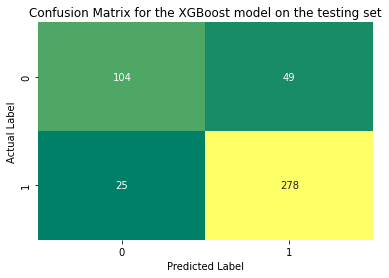

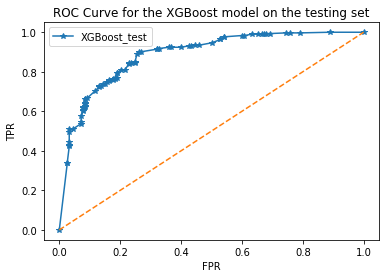



The performance metrics for the XGBoost model


Train      Test
Accuracy       0.841659  0.837719
ROC-AUC        0.899057  0.886646
Precision      0.875641  0.850153
Recall         0.905836  0.917492
F1-Score       0.890482  0.882540
Mean_CV_Score  0.816214  0.791594

In [ ]:
model_func(clfXGB, X_train, X_test, y_train, y_test)

Classification report for the XGBoost model on the training set is 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.88      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



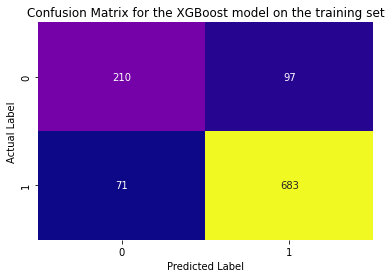

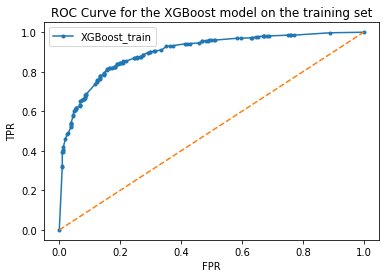



############################################Testing Set################################################ 

Classification report for the XGBoost model on the testing set is 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



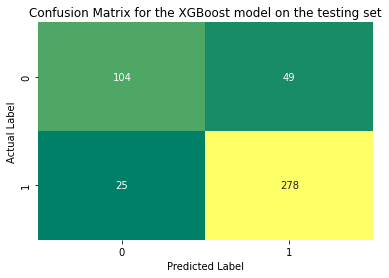

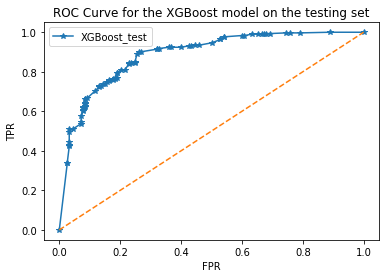



The performance metrics for the XGBoost model


Train      Test
Accuracy       0.841659  0.837719
ROC-AUC        0.899057  0.886646
Precision      0.875641  0.850153
Recall         0.905836  0.917492
F1-Score       0.890482  0.882540
Mean_CV_Score  0.816214  0.791594

In [ ]:
model_func(clfXGB, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

In [ ]:
param_grid_XGB = {
          'loss': ['deviance', 'exponential'],
          'learning_rate': [0.1,0.2,0.3],
          'n_estimators': [100,200,300],
          'criterion': ['friedman_mse', 'squared_error'],
          'max_features': ['auto', 'sqrt', 'log2']
}

## **1.7. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)**

### SMOTE

#### Perform smote on the train Data Set

In [20]:
smote_unscaled = SMOTE(random_state=1)

X_train_res, y_train_res = smote_unscaled.fit_resample(X_train, y_train)

In [21]:
smote_scaled = SMOTE(random_state=1)

X_scaled_train_res, y_scaled_train_res = smote_scaled.fit_resample(X_scaled_train, y_scaled_train)

#### Custoem Function for SMOTE without Grid Search

In [22]:
def model_func_smote(model, x_train, x_test, Y_train, Y_test):

  #Fit the model on the training data
  model.fit(x_train, Y_train)
  
  # Predict on both train and test set
  Y_train_predict = model.predict(x_train)
  Y_test_predict = model.predict(x_test)

  # Print classification report for the training data
  print('Classification report for the {} model on the training set after SMOTE is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

  # Display the confusion matrix for the train data
  sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
  plt.title('Confusion Matrix for the {} model on the training set after SMOTE'.format(model_names[model]))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the train data
  fpr_train, tpr_train, thresholds = roc_curve(Y_train,model.predict_proba(x_train)[:,1])
  plt.plot(fpr_train, tpr_train, marker='.')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model on the training set after SMOTE'.format(model_names[model]))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_train_SMOTE'.format(model_names[model])], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the train set

  acc_train = accuracy_score(Y_train,Y_train_predict)
  roc_train = roc_auc_score(Y_train,model.predict_proba(x_train)[:,1])
  precision_train = precision_score(Y_train,Y_train_predict)
  recall_train = recall_score(Y_train,Y_train_predict)
  f1_train = f1_score(Y_train,Y_train_predict)
  train_scores = cross_val_score(model, x_train, Y_train, cv=10)
  mean_cv_score_train = np.mean(train_scores)
  
  print('############################################Testing Set################################################', '\n')

  # Print classification report for the testing data
  print('Classification report for the {} model on the testing set after SMOTE is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

  # Display the confusion matrix for the test data
  sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
  plt.title('Confusion Matrix for the {} model on the testing set after SMOTE'.format(model_names[model]))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the test data
  fpr_test, tpr_test, thresholds = roc_curve(Y_test,model.predict_proba(x_test)[:,1])
  plt.plot(fpr_test, tpr_test, marker='*')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model on the testing set after SMOTE'.format(model_names[model]))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_test_SMOTE'.format(model_names[model])], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the test set
  acc_test = accuracy_score(Y_test,Y_test_predict)
  roc_test = roc_auc_score(Y_test,model.predict_proba(x_test)[:,1])
  precision_test = precision_score(Y_test,Y_test_predict)
  recall_test = recall_score(Y_test,Y_test_predict)
  f1_test = f1_score(Y_test,Y_test_predict)
  test_scores = cross_val_score(model, x_test, Y_test, cv=10)
  mean_cv_score_test = np.mean(test_scores)
  
  # Display the performance metrics in a dataframe
  index=['Train', 'Test']
  data = pd.DataFrame({'Accuracy':[acc_train, acc_test], 
                       'ROC-AUC':[roc_train, roc_test],
                       'Precision':[precision_train, precision_test],
                       'Recall':[recall_train, recall_test],
                       'F1-Score':[f1_train, f1_test],
                       'Mean_CV_Score':[mean_cv_score_train, mean_cv_score_test]},
                      index=index)
  round(data,3)
  print('The performance metrics for the {} model after SMOTE'.format(model_names[model]))
  return data

#### Logistic Regression Model after SMOTE without scaling

Classification report for the Logistic Regression model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



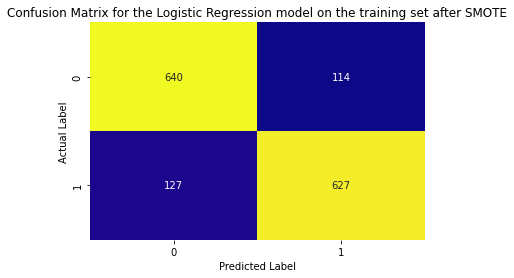

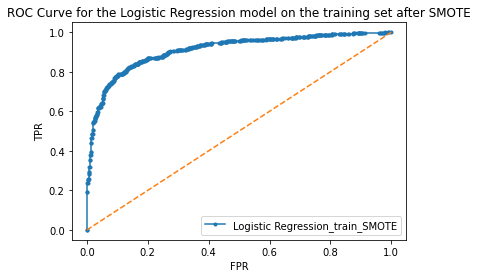



############################################Testing Set################################################ 

Classification report for the Logistic Regression model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.66      0.80      0.73       153
           1       0.89      0.79      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.78       456
weighted avg       0.81      0.80      0.80       456



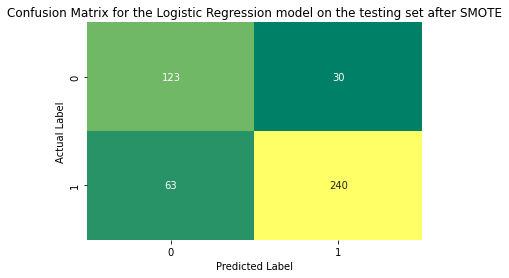

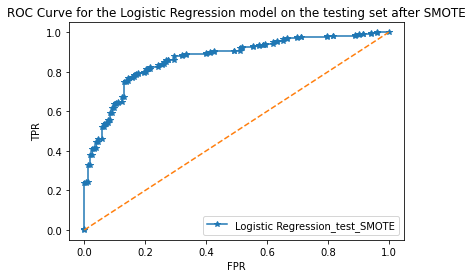



The performance metrics for the Logistic Regression model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.840186  0.910717   0.846154  0.831565  0.838796       0.834892
Test   0.796053  0.866175   0.888889  0.792079  0.837696       0.835507

In [ ]:
model_func_smote(clfLR, X_train_res, X_test, y_train_res, y_test)

#### Logistic Regression Model after SMOTE with scaling

Classification report for the Logistic Regression model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       754
           1       0.84      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



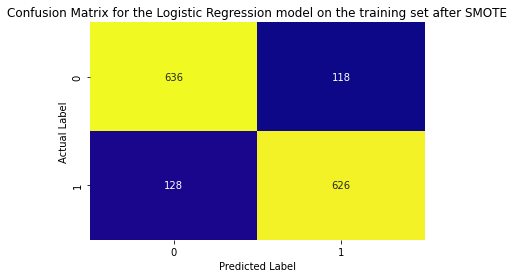

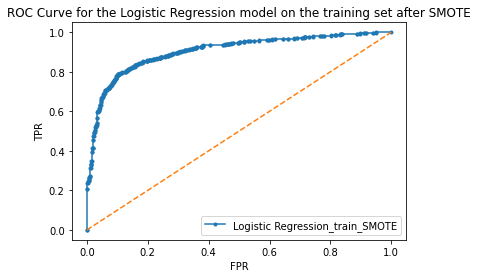



############################################Testing Set################################################ 

Classification report for the Logistic Regression model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.68      0.83      0.75       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.83      0.81      0.82       456



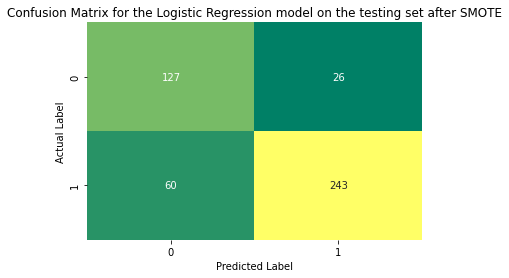

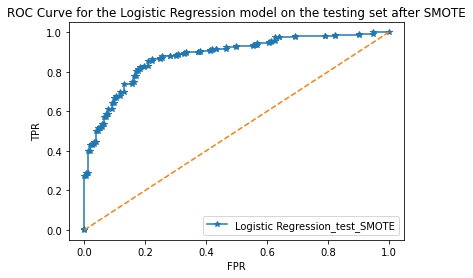



The performance metrics for the Logistic Regression model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.836870  0.904121   0.841398  0.830239  0.835781       0.832238
Test   0.811404  0.879247   0.903346  0.801980  0.849650       0.835507

In [ ]:
model_func_smote(clfLR, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### Linear Discriminant Analysis after SMOTE without Scaling

Classification report for the Linear Discriminant Analysis model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



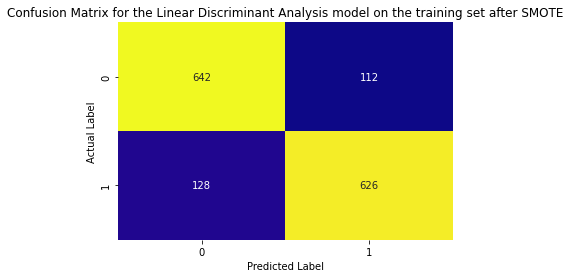

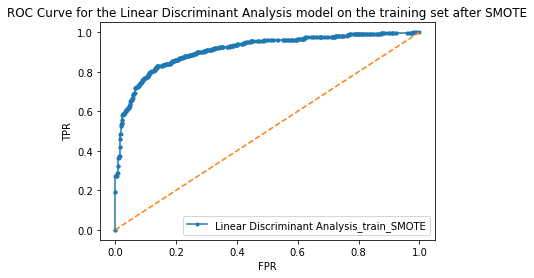



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.67      0.83      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.83      0.81      0.81       456



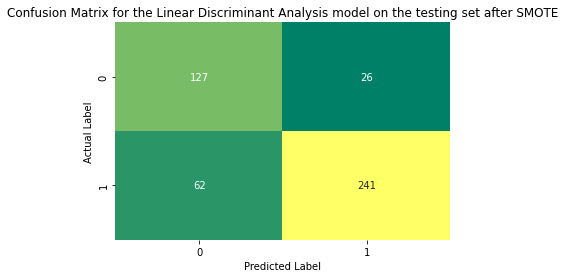

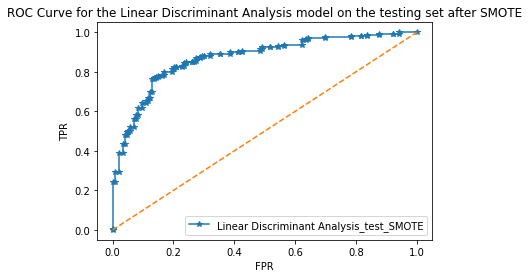



The performance metrics for the Linear Discriminant Analysis model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.840849  0.910331   0.848238  0.830239  0.839142       0.836874
Test   0.807018  0.870813   0.902622  0.795380  0.845614       0.839952

In [ ]:
model_func_smote(clfLDA, X_train_res, X_test, y_train_res, y_test)

#### Linear Discriminant Analysis after SMOTE with Scaling

Classification report for the Linear Discriminant Analysis model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



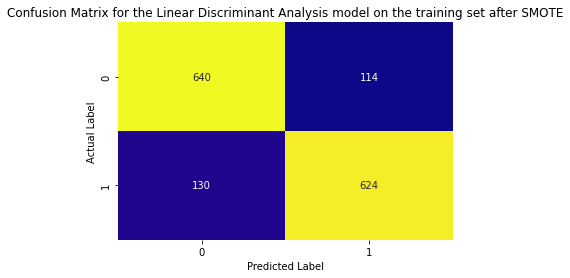

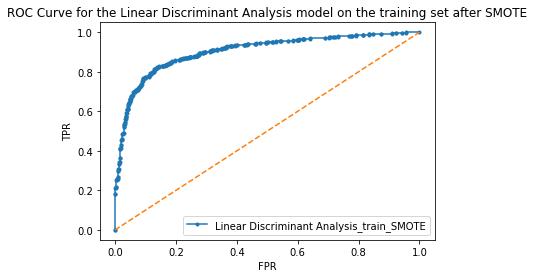



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.67      0.84      0.74       153
           1       0.91      0.79      0.84       303

    accuracy                           0.80       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.83      0.80      0.81       456



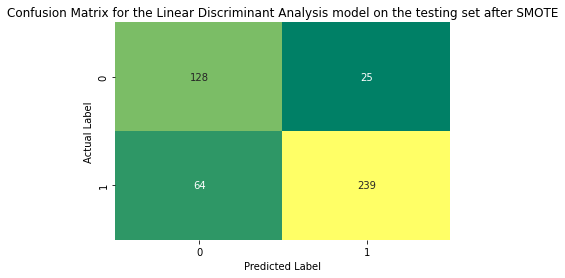

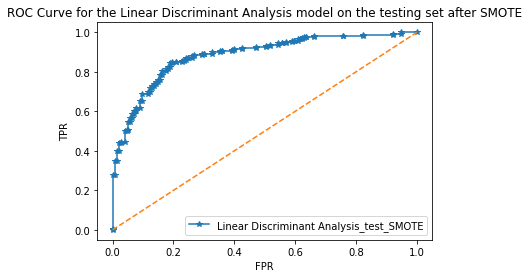



The performance metrics for the Linear Discriminant Analysis model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.838196  0.903829   0.845528  0.827586  0.836461       0.833567
Test   0.804825  0.883733   0.905303  0.788779  0.843034       0.839952

In [27]:
model_func_smote(clfLDA, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### KNN after SMOTE without Scaling

Classification report for the K-Nearest Neighbours Classifier model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       754
           1       0.95      0.83      0.89       754

    accuracy                           0.89      1508
   macro avg       0.90      0.89      0.89      1508
weighted avg       0.90      0.89      0.89      1508



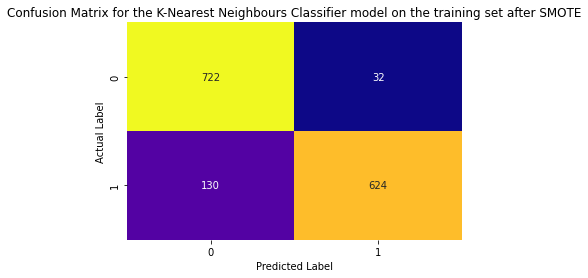

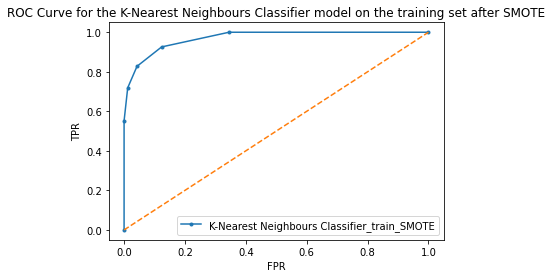



############################################Testing Set################################################ 

Classification report for the K-Nearest Neighbours Classifier model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74       153
           1       0.90      0.80      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.81      0.79       456
weighted avg       0.82      0.80      0.81       456



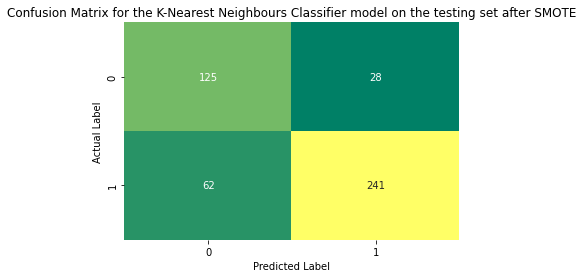

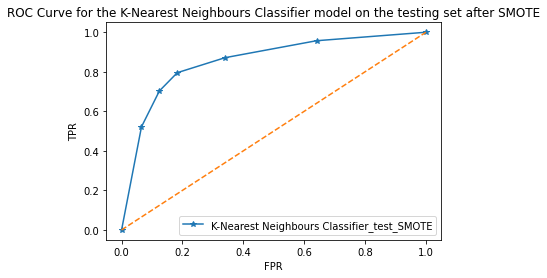



The performance metrics for the K-Nearest Neighbours Classifier model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.892573  0.970525   0.951220  0.827586  0.885106       0.851448
Test   0.802632  0.854462   0.895911  0.795380  0.842657       0.780676

In [28]:
model_func_smote(clfKNN, X_train_res, X_test, y_train_res, y_test)

#### KNN after SMOTE with Scaling

Classification report for the K-Nearest Neighbours Classifier model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       754
           1       0.95      0.81      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



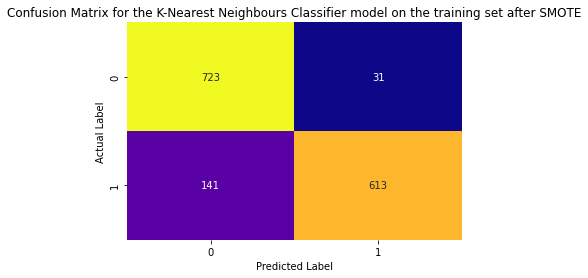

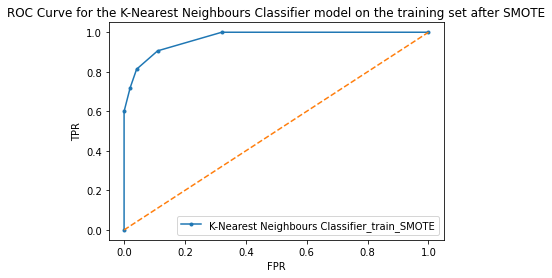



############################################Testing Set################################################ 

Classification report for the K-Nearest Neighbours Classifier model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.64      0.81      0.71       153
           1       0.89      0.77      0.82       303

    accuracy                           0.78       456
   macro avg       0.76      0.79      0.77       456
weighted avg       0.81      0.78      0.79       456



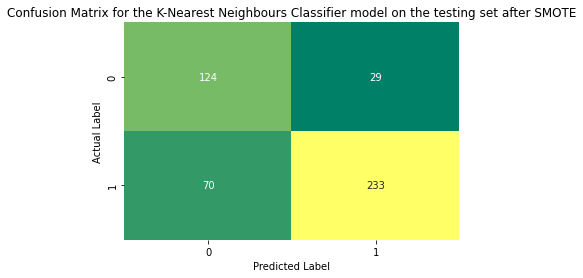

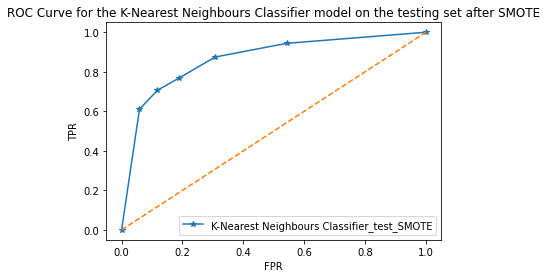



The performance metrics for the K-Nearest Neighbours Classifier model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.885942  0.968628   0.951863  0.812997  0.876967       0.848168
Test   0.782895  0.865021   0.889313  0.768977  0.824779       0.804783

In [29]:
model_func_smote(clfKNN, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### Gaussian Naive Bias after SMOTE without Scaling

Classification report for the Gaussian Naive Bias Classifier model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       754
           1       0.84      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



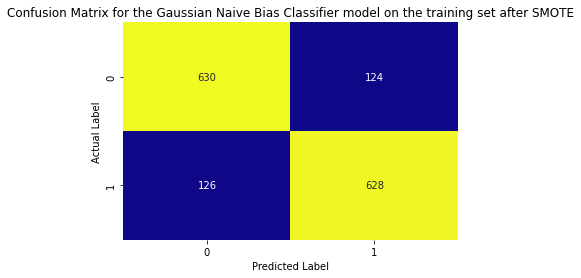

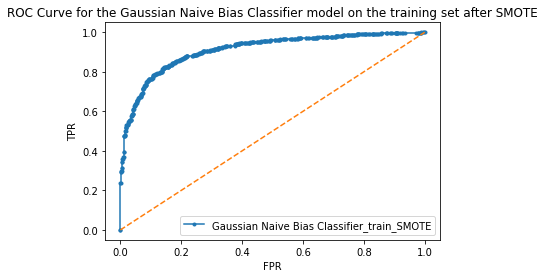



############################################Testing Set################################################ 

Classification report for the Gaussian Naive Bias Classifier model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       153
           1       0.88      0.82      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.79      0.79       456
weighted avg       0.81      0.80      0.81       456



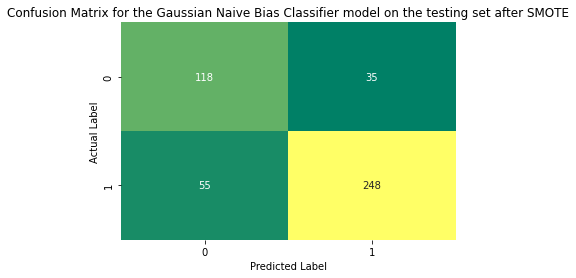

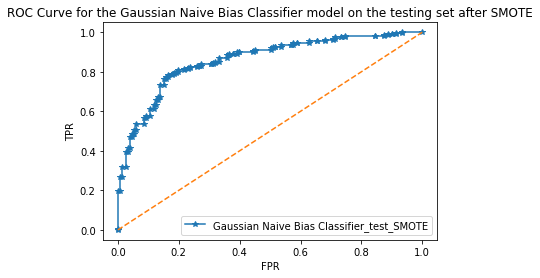



The performance metrics for the Gaussian Naive Bias Classifier model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.834218  0.911146   0.835106  0.832891  0.833997       0.834225
Test   0.802632  0.861408   0.876325  0.818482  0.846416       0.828889

In [ ]:
model_func_smote(clfNB, X_train_res, X_test, y_train_res, y_test)

#### Gaussian Naive Bias after SMOTE with Scaling

Classification report for the Gaussian Naive Bias Classifier model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       754
           1       0.84      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



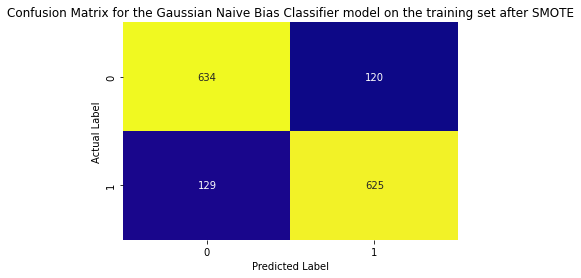

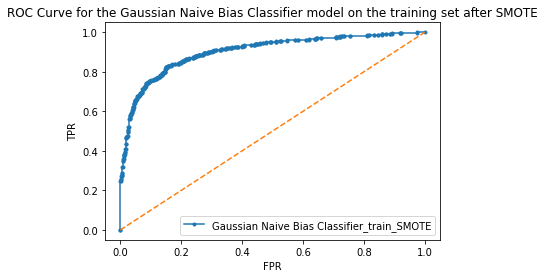



############################################Testing Set################################################ 

Classification report for the Gaussian Naive Bias Classifier model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



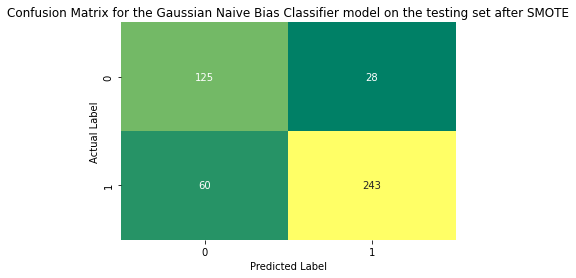

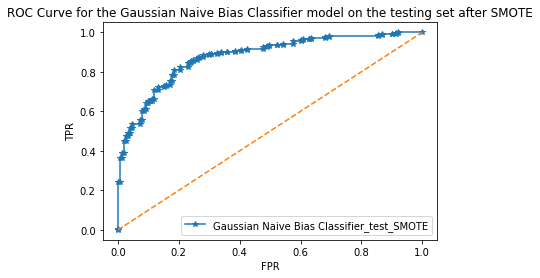



The performance metrics for the Gaussian Naive Bias Classifier model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.834881  0.903257   0.838926  0.828912  0.833889       0.828901
Test   0.807018  0.877543   0.896679  0.801980  0.846690       0.828889

In [ ]:
model_func_smote(clfNB, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### Ensemble Random Forest after SMOTE without Scaling

Classification report for the Ensemble Random Forest model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1508
   macro avg       1.00      1.00      1.00      1508
weighted avg       1.00      1.00      1.00      1508



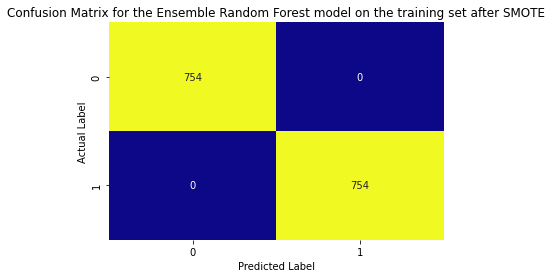

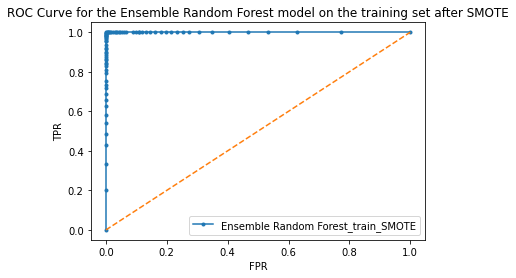



############################################Testing Set################################################ 

Classification report for the Ensemble Random Forest model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



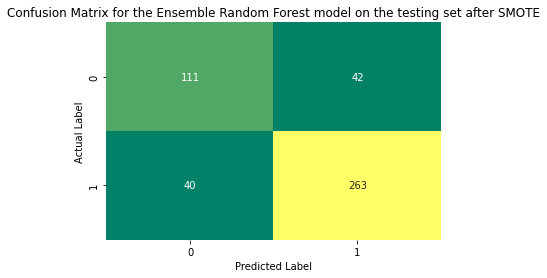

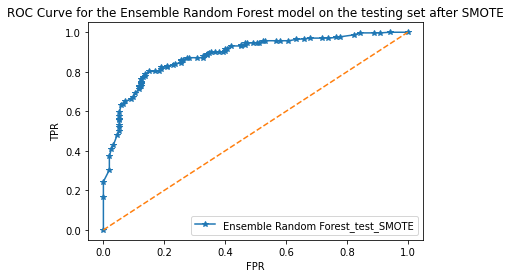



The performance metrics for the Ensemble Random Forest model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  1.000000  1.000000   1.000000  1.000000  1.000000       0.874009
Test   0.820175  0.884456   0.862295  0.867987  0.865132       0.795845

In [ ]:
model_func_smote(clfRF, X_train_res, X_test, y_train_res, y_test)

#### Ensemble Random Forest after SMOTE with Scaling

Classification report for the Ensemble Random Forest model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1508
   macro avg       1.00      1.00      1.00      1508
weighted avg       1.00      1.00      1.00      1508



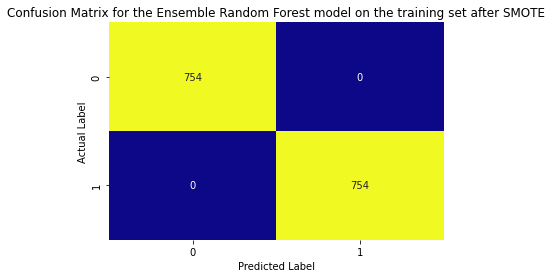

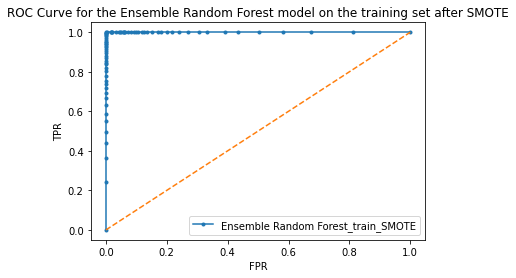



############################################Testing Set################################################ 

Classification report for the Ensemble Random Forest model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       153
           1       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



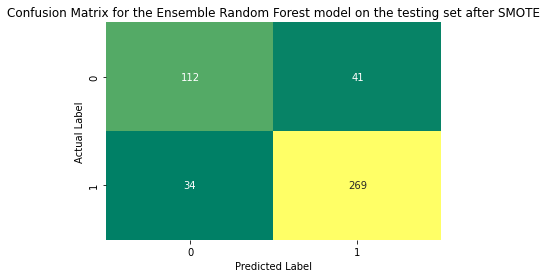

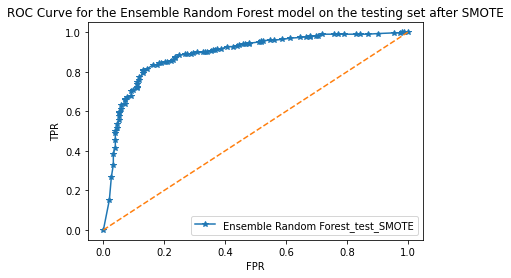



The performance metrics for the Ensemble Random Forest model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  1.000000  1.000000   1.000000  1.000000  1.000000       0.885311
Test   0.835526  0.889115   0.867742  0.887789  0.877651       0.793671

In [ ]:
model_func_smote(clfRF, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### Adaboost Model after SMOTE without Scaling

Classification report for the Ada Boost model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       754
           1       0.87      0.86      0.87       754

    accuracy                           0.87      1508
   macro avg       0.87      0.87      0.87      1508
weighted avg       0.87      0.87      0.87      1508



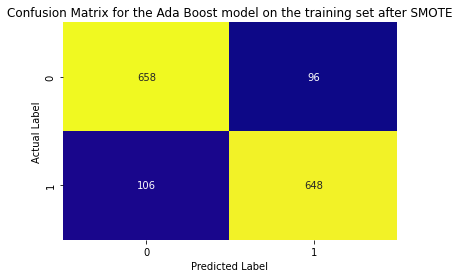

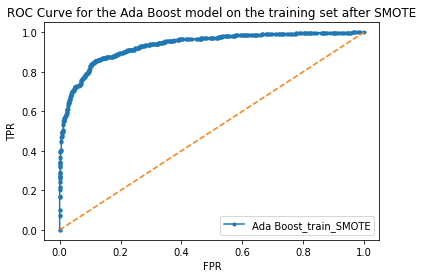



############################################Testing Set################################################ 

Classification report for the Ada Boost model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73       153
           1       0.87      0.83      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.80      0.79       456
weighted avg       0.81      0.81      0.81       456



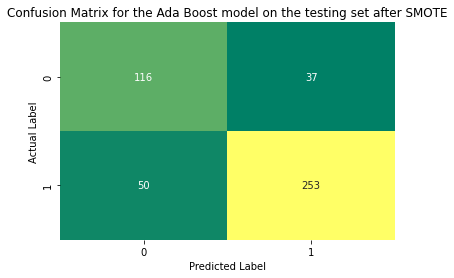

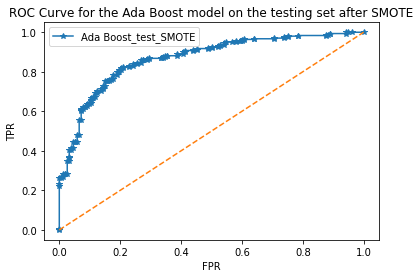



The performance metrics for the Ada Boost model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.866048  0.933926   0.870968  0.859416  0.865154       0.854786
Test   0.809211  0.867717   0.872414  0.834983  0.853288       0.774251

In [ ]:
model_func_smote(clfADB, X_train_res, X_test, y_train_res, y_test)

#### Adaboost after SMOTE with Scaling

Classification report for the Ada Boost model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       754
           1       0.89      0.87      0.88       754

    accuracy                           0.88      1508
   macro avg       0.88      0.88      0.88      1508
weighted avg       0.88      0.88      0.88      1508



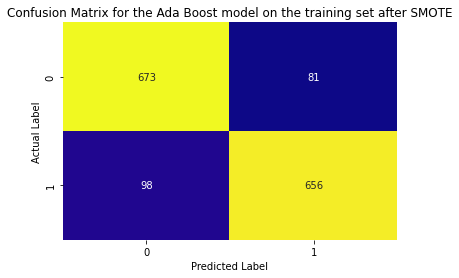

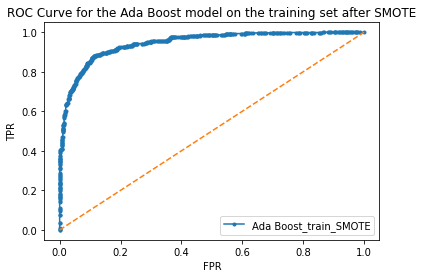



############################################Testing Set################################################ 

Classification report for the Ada Boost model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       153
           1       0.88      0.84      0.86       303

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



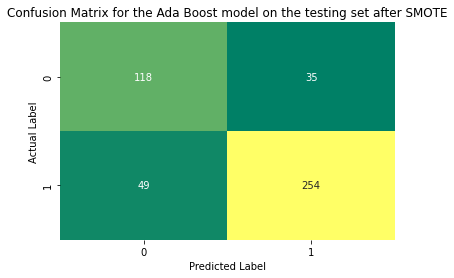

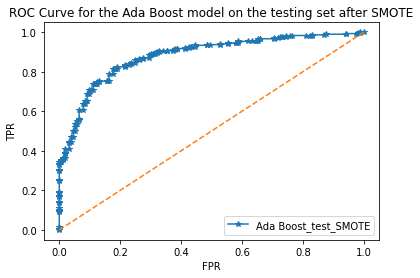



The performance metrics for the Ada Boost model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.881300  0.946242   0.890095  0.870027  0.879946       0.857457
Test   0.815789  0.882126   0.878893  0.838284  0.858108       0.776473

In [ ]:
model_func_smote(clfADB, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### Gradient Boost Classifier after SMOTE without Scaling

Classification report for the Gradient Boosting model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       754
           1       0.91      0.86      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



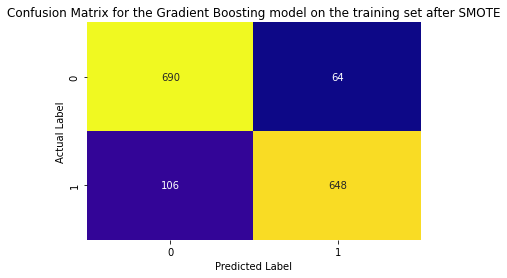

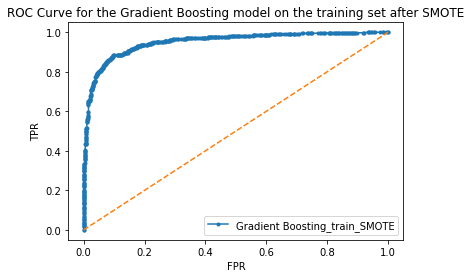



############################################Testing Set################################################ 

Classification report for the Gradient Boosting model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74       153
           1       0.89      0.83      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.83      0.82      0.82       456



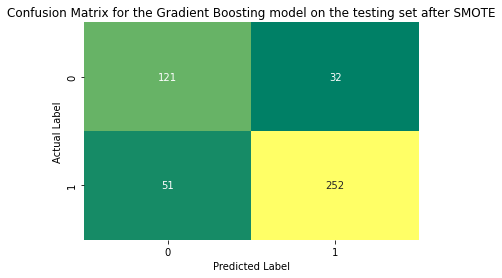

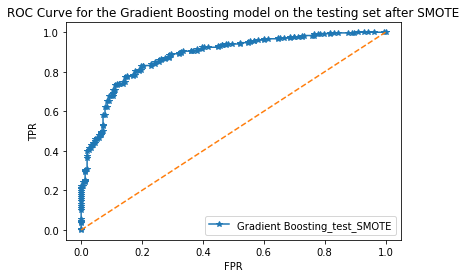



The performance metrics for the Gradient Boosting model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.887268  0.951192   0.910112  0.859416  0.884038       0.858106
Test   0.817982  0.881566   0.887324  0.831683  0.858603       0.796135

In [ ]:
model_func_smote(clfGBC, X_train_res, X_test, y_train_res, y_test)

#### Gradient Boosting Classifier after SMOTE with Scaling

Classification report for the Gradient Boosting model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.91      0.88      0.89       754

    accuracy                           0.90      1508
   macro avg       0.90      0.90      0.90      1508
weighted avg       0.90      0.90      0.90      1508



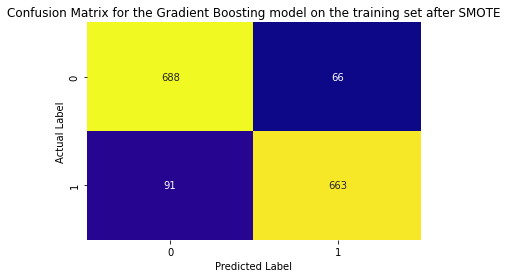

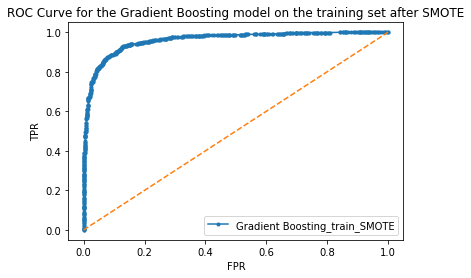



############################################Testing Set################################################ 

Classification report for the Gradient Boosting model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       153
           1       0.89      0.85      0.87       303

    accuracy                           0.83       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.83      0.83      0.83       456



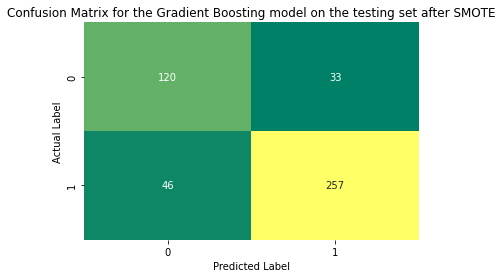

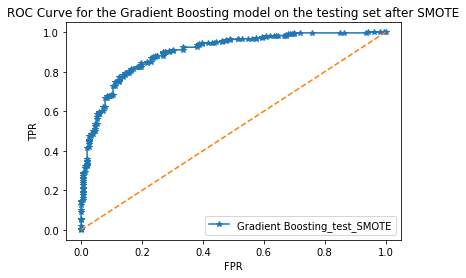



The performance metrics for the Gradient Boosting model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.895889  0.960680   0.909465  0.879310  0.894134       0.866733
Test   0.826754  0.899146   0.886207  0.848185  0.866779       0.796135

In [ ]:
model_func_smote(clfGBC, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### Bagging Classifier after SMOTE without Scaling


Classification report for the Bagging Classifier Model model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       754
           1       0.98      0.96      0.97       754

    accuracy                           0.97      1508
   macro avg       0.97      0.97      0.97      1508
weighted avg       0.97      0.97      0.97      1508



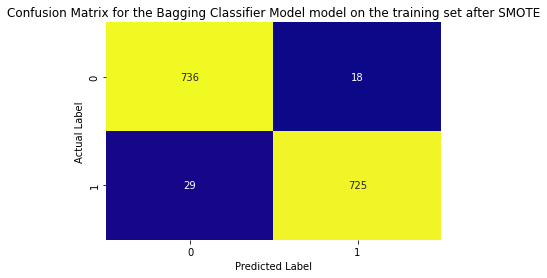

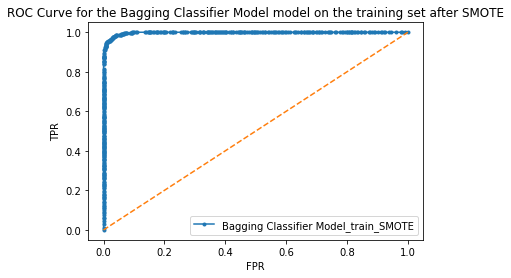



############################################Testing Set################################################ 

Classification report for the Bagging Classifier Model model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       153
           1       0.87      0.86      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



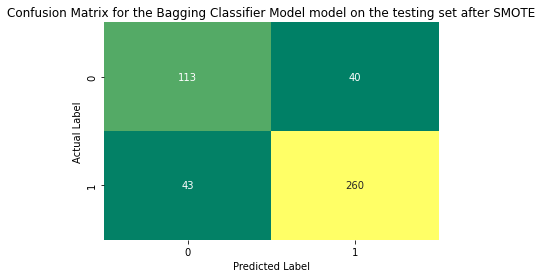

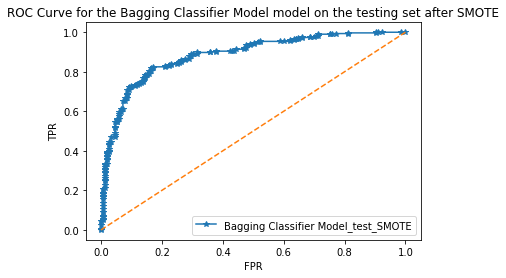



The performance metrics for the Bagging Classifier Model model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.968833  0.997617   0.975774  0.961538  0.968604       0.871347
Test   0.817982  0.885189   0.866667  0.858086  0.862355       0.795894

In [ ]:
model_func_smote(clfBGCL, X_train_res, X_test, y_train_res, y_test)

#### Bagging classifier after SMOTE with Scaling


Classification report for the Bagging Classifier Model model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       754
           1       0.97      0.98      0.98       754

    accuracy                           0.98      1508
   macro avg       0.98      0.98      0.98      1508
weighted avg       0.98      0.98      0.98      1508



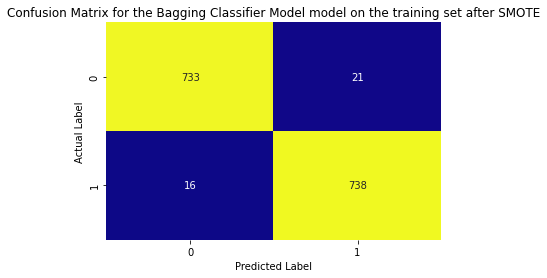

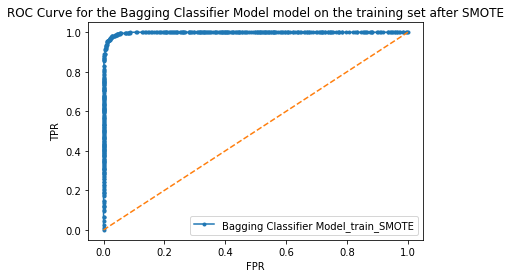



############################################Testing Set################################################ 

Classification report for the Bagging Classifier Model model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



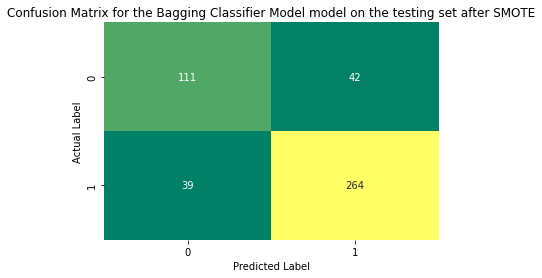

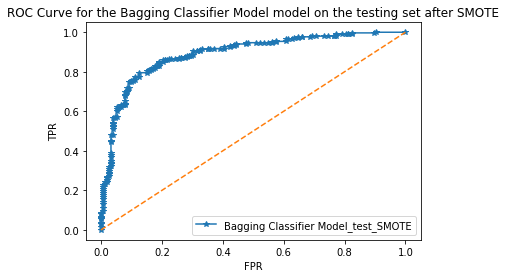



The performance metrics for the Bagging Classifier Model model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.975464  0.997795   0.972332  0.978780  0.975545       0.887956
Test   0.822368  0.892135   0.862745  0.871287  0.866995       0.798068

In [ ]:
model_func_smote(clfBGCL, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### SVM after SMOTE without Scaling



Classification report for the Support Vector Machine model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       754
           1       0.81      0.81      0.81       754

    accuracy                           0.81      1508
   macro avg       0.81      0.81      0.81      1508
weighted avg       0.81      0.81      0.81      1508



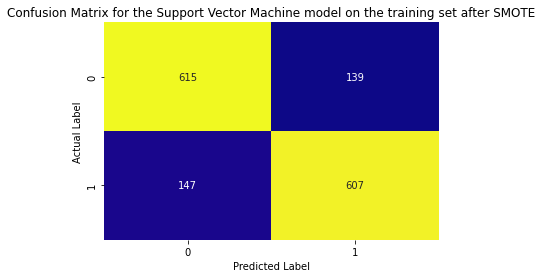

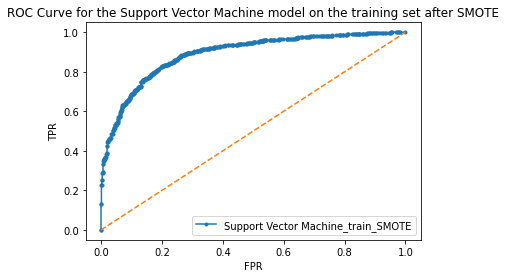



############################################Testing Set################################################ 

Classification report for the Support Vector Machine model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.66      0.80      0.72       153
           1       0.89      0.79      0.84       303

    accuracy                           0.79       456
   macro avg       0.77      0.80      0.78       456
weighted avg       0.81      0.79      0.80       456



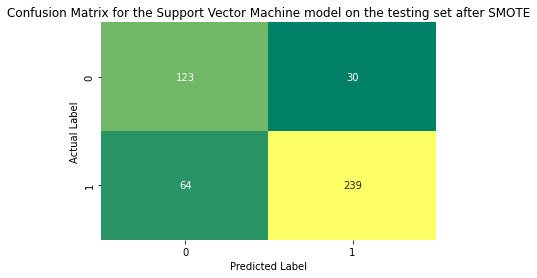

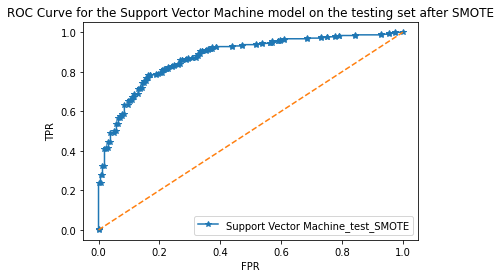



The performance metrics for the Support Vector Machine model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.810345  0.890503   0.813673  0.805040  0.809333       0.799055
Test   0.793860  0.874911   0.888476  0.788779  0.835664       0.664444

In [ ]:
model_func_smote(clfSVM, X_train_res, X_test, y_train_res, y_test)

#### SVM after SMOTE with Scaling

Classification report for the Support Vector Machine model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       754
           1       0.92      0.84      0.88       754

    accuracy                           0.88      1508
   macro avg       0.89      0.88      0.88      1508
weighted avg       0.89      0.88      0.88      1508



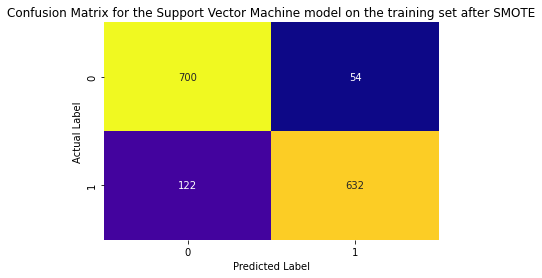

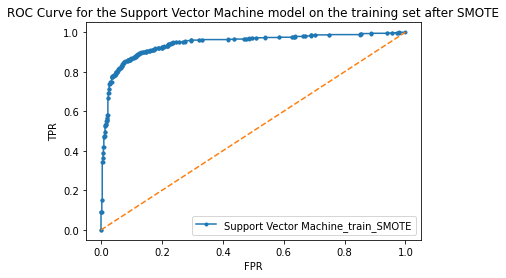



############################################Testing Set################################################ 

Classification report for the Support Vector Machine model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.69      0.81      0.74       153
           1       0.89      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.82      0.81      0.81       456



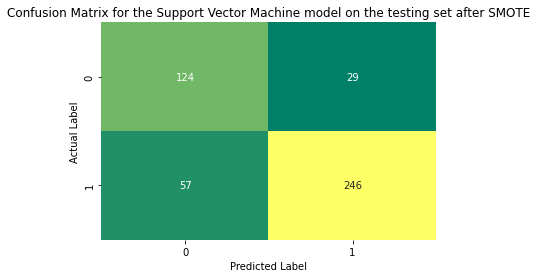

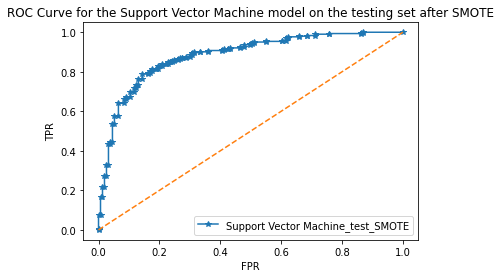



The performance metrics for the Support Vector Machine model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.883289  0.942429   0.921283  0.838196  0.877778       0.851457
Test   0.811404  0.882342   0.894545  0.811881  0.851211       0.822222

In [ ]:
model_func_smote(clfSVM, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

#### XGBoost after SMOTE without Scaling


Classification report for the XGBoost model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       754
           1       0.87      0.81      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



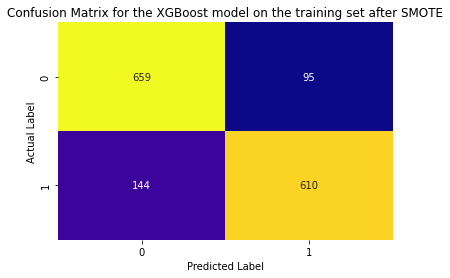

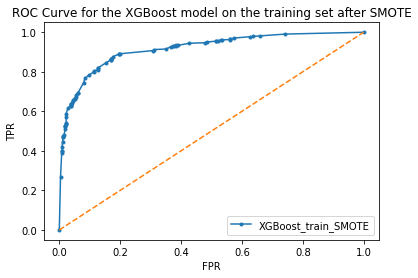



############################################Testing Set################################################ 

Classification report for the XGBoost model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.63      0.75      0.68       153
           1       0.86      0.78      0.82       303

    accuracy                           0.77       456
   macro avg       0.74      0.76      0.75       456
weighted avg       0.78      0.77      0.77       456



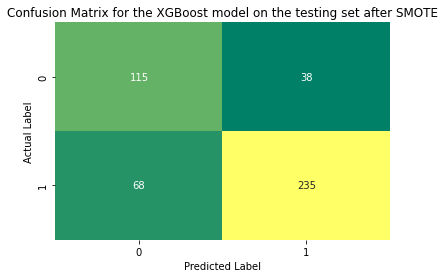

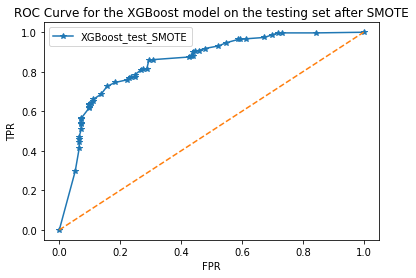



The performance metrics for the XGBoost model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.841512  0.915955   0.865248  0.809019  0.836189       0.844839
Test   0.767544  0.849317   0.860806  0.775578  0.815972       0.791594

In [ ]:
model_func_smote(clfXGB, X_train_res, X_test, y_train_res, y_test)

#### XGBoost after SMOTE with Scaling


Classification report for the XGBoost model on the training set after SMOTE is 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       754
           1       0.87      0.83      0.85       754

    accuracy                           0.85      1508
   macro avg       0.85      0.85      0.85      1508
weighted avg       0.85      0.85      0.85      1508



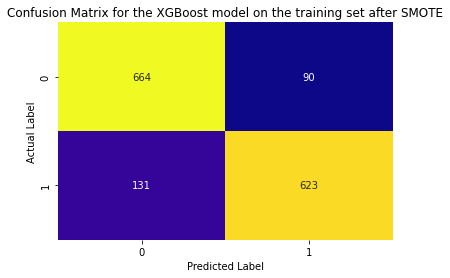

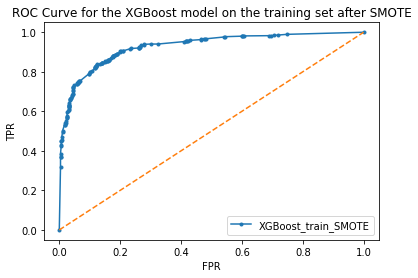



############################################Testing Set################################################ 

Classification report for the XGBoost model on the testing set after SMOTE is 
               precision    recall  f1-score   support

           0       0.65      0.82      0.73       153
           1       0.90      0.78      0.83       303

    accuracy                           0.79       456
   macro avg       0.78      0.80      0.78       456
weighted avg       0.82      0.79      0.80       456



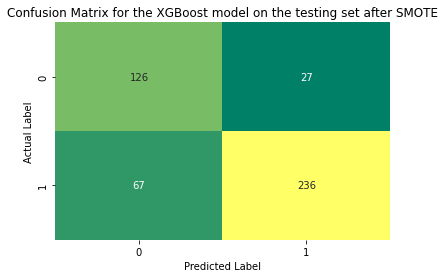

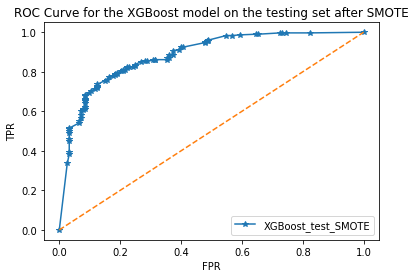



The performance metrics for the XGBoost model after SMOTE


Accuracy   ROC-AUC  Precision    Recall  F1-Score  Mean_CV_Score
Train  0.853448  0.927584   0.873773  0.826260  0.849352       0.843492
Test   0.793860  0.882838   0.897338  0.778878  0.833922       0.791594

In [ ]:
model_func_smote(clfXGB, X_scaled_train_res, X_scaled_test, y_scaled_train_res, y_scaled_test)

## **1.8. Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.**

### Custoem Function for SMOTE after Grid Search

In [ ]:
# Custom Function after grid search

def grid_model_func_gs_smote(model, best_grid_estimator, x_train, x_test, Y_train, Y_test):

  # Predict on both train and test set
  Y_train_predict = best_grid_estimator.predict(x_train)
  Y_test_predict = best_grid_estimator.predict(x_test)

  # Print classification report for the training data
  print('Classification report for the {} model after grid search and SMOTE on the training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

  # Display the confusion matrix for the train data
  sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
  plt.title('Confusion Matrix for the {} model after grid search and SMOTE on the training set'.format(model_names[model]))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the train data
  fpr_train, tpr_train, thresholds = roc_curve(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
  plt.plot(fpr_train, tpr_train, marker='.')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model after grid search on the training set'.format(model_names[model]))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_train_GS_SMOTE'.format(model_names[model])], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the train set

  acc_train = accuracy_score(Y_train,Y_train_predict)
  roc_train = roc_auc_score(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
  precision_train = precision_score(Y_train,Y_train_predict)
  recall_train = recall_score(Y_train,Y_train_predict)
  f1_train = f1_score(Y_train,Y_train_predict)
  train_scores = cross_val_score(best_grid_estimator, x_train, Y_train, cv=10)
  mean_cv_score_train = np.mean(train_scores)
  
  print('############################################Testing Set################################################', '\n')

  # Print classification report for the testing data
  print('Classification report for the {} model after grid search and SMOTE on the testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

  # Display the confusion matrix for the test data
  sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
  plt.title('Confusion Matrix for the {} model after grid search and SMOTE on the testing set'.format(model_names[model]))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the test data
  fpr_test, tpr_test, thresholds = roc_curve(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
  plt.plot(fpr_test, tpr_test, marker='*')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model after grid search and SMOTE on the testing set'.format(model_names[model]))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_test_GS'.format(model_names[model])], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the test set
  acc_test = accuracy_score(Y_test,Y_test_predict)
  roc_test = roc_auc_score(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
  precision_test = precision_score(Y_test,Y_test_predict)
  recall_test = recall_score(Y_test,Y_test_predict)
  f1_test = f1_score(Y_test,Y_test_predict)
  test_scores = cross_val_score(best_grid_estimator, x_test, Y_test, cv=10)
  mean_cv_score_test = np.mean(test_scores)
  
  # Display the performance metrics in a dataframe
  index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
  data = pd.DataFrame({'Train':[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       'Test':[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
  round(data,3)
  print('The performance metrics for the {} model after grid search and SMOTE'.format(model_names[model]))
  return data

## **Problem 2:**
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from nltk.tokenize import word_tokenize
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [ ]:
speech_list=[]
speech_list.append(inaugural.raw('1941-Roosevelt.txt'))
speech_list.append(inaugural.raw('1961-Kennedy.txt'))
speech_list.append(inaugural.raw('1973-Nixon.txt'))
speeches=pd.Series(data=speech_list,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])
speech_df=pd.DataFrame(speeches,columns=['Speech'])

In [ ]:
speech_df.head()

Speech
1941-Roosevelt  On each national day of inauguration since 178...
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

## **2.1. Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)**

In [ ]:
#Number of characters with space
[len(x) for x in speech_df.Speech]

[7571, 7618, 9991]

In [ ]:
speech_df.Speech.apply(lambda x: len(x))

1941-Roosevelt    7571
1961-Kennedy      7618
1973-Nixon        9991
Name: Speech, dtype: int64

In [ ]:
#No. of characters without Space
no_char=0
speech_df.Speech.apply(lambda x: sum([len(x) for x in x.split()]))

1941-Roosevelt    6174
1961-Kennedy      6202
1973-Nixon        8122
Name: Speech, dtype: int64

In [ ]:
#No. of words
[len(x.split()) for x in speech_df['Speech']]

[1360, 1390, 1819]

In [ ]:
speech_df.Speech.apply(lambda x: len([x for x in x.split()]))

1941-Roosevelt    1360
1961-Kennedy      1390
1973-Nixon        1819
Name: Speech, dtype: int64

In [ ]:
def no_sentence(doc):
    n=0
    n=len(re.findall('[^:,][\n]+',doc)) #exclude , or : since that becomes a phrase
    n+=len(re.findall('\?[^\n]',doc)) # Questions(end with ? withput \n)
    return n

In [ ]:
for ind,doc in speech_df.iterrows():
    no_sentences=no_sentence(doc.Speech)
    print("No. of sentences in {}'s inaugral Speech is".format(ind),no_sentences)

No. of sentences in 1941-Roosevelt's inaugral Speech is 38
No. of sentences in 1961-Kennedy's inaugral Speech is 28
No. of sentences in 1973-Nixon's inaugral Speech is 52


## **2.2. Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords**

In [ ]:
#Convert all the characters to lower case
speech_df['Speech']=speech_df['Speech'].str.lower()

In [ ]:
# No of words before removal of stopwords
speech_df.Speech.apply(lambda x: len([x for x in x.split()]))

1941-Roosevelt    1360
1961-Kennedy      1390
1973-Nixon        1819
Name: Speech, dtype: int64

In [ ]:
stopword=stopwords.words('english')

In [ ]:
speech_df['Speech']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [ ]:
# Speech after removal of stopwords
speech_df['Processed_Speech']=speech_df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

In [ ]:
speech_df['Processed_Speech']

1941-Roosevelt    national day inauguration since 1789, people r...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: Processed_Speech, dtype: object

In [ ]:
# No of words after removal of stopwords
speech_df.Processed_Speech.apply(lambda x: len([x for x in x.split()]))

1941-Roosevelt    666
1961-Kennedy      730
1973-Nixon        861
Name: Processed_Speech, dtype: int64

In [ ]:
features=speech_df['Processed_Speech']
processed_features = []

for sentence in range(0, len(features)):
    
    processed_feature = re.sub(r"'s", 's', features[sentence])
    
    #Remove punctualtions and hyphens
    processed_feature = re.sub(r"\W", ' ', processed_feature)
   
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I) #flags - I - Ignorecase
    #Flags allow you to control the regular expression engine. Because regular expressions are so powerful, they are a useful way of switching on and off certain features (e.g. whether to ignore capitalization when matching your regex).

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
speech_df['Processed_Speech']=processed_features

In [ ]:
speech_df['Processed_Speech']

1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: Processed_Speech, dtype: object

In [ ]:
# No of words after removal of stopwords
speech_df.Processed_Speech.apply(lambda x: len([x for x in x.split()]))

1941-Roosevelt    651
1961-Kennedy      708
1973-Nixon        847
Name: Processed_Speech, dtype: int64

## **2.3. Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)**

In [ ]:
[x for x in speech_df['Processed_Speech'].str.split()]

[['national',
  'day',
  'inauguration',
  'since',
  '1789',
  'people',
  'renewed',
  'sense',
  'dedication',
  'united',
  'states',
  'washingtons',
  'day',
  'task',
  'people',
  'create',
  'weld',
  'together',
  'nation',
  'lincolns',
  'day',
  'task',
  'people',
  'preserve',
  'nation',
  'disruption',
  'within',
  'day',
  'task',
  'people',
  'save',
  'nation',
  'institutions',
  'disruption',
  'without',
  'us',
  'come',
  'time',
  'midst',
  'swift',
  'happenings',
  'pause',
  'moment',
  'take',
  'stock',
  'recall',
  'place',
  'history',
  'been',
  'rediscover',
  'may',
  'be',
  'not',
  'risk',
  'real',
  'peril',
  'inaction',
  'lives',
  'nations',
  'determined',
  'count',
  'years',
  'lifetime',
  'human',
  'spirit',
  'life',
  'man',
  'three',
  'score',
  'years',
  'ten',
  'little',
  'more',
  'little',
  'less',
  'life',
  'nation',
  'fullness',
  'measure',
  'live',
  'men',
  'doubt',
  'this',
  'men',
  'believe',
  'democr

In [ ]:
speech_df['Processed_Speech']

1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: Processed_Speech, dtype: object

In [ ]:
for index,doc in speech_df.iterrows():
    print("Top words in  {}'s inaugral speech are :\n".format(index),pd.Series(doc.Processed_Speech.split()).value_counts(),'\n')

Top words in  1941-Roosevelt's inaugral speech are :
 nation        11
know          10
democracy      9
spirit         9
us             8
              ..
constantly     1
valiantly      1
seas           1
downfall       1
initiative     1
Length: 443, dtype: int64 

Top words in  1961-Kennedy's inaugral speech are :
 let          16
us           12
sides         8
world         8
pledge        7
             ..
to            1
believe       1
different     1
dark          1
fruitful      1
Length: 467, dtype: int64 

Top words in  1973-Nixon's inaugral speech are :
 us           26
let          22
peace        19
world        16
new          15
             ..
measure       1
defending     1
full          1
beyond        1
periods       1
Length: 428, dtype: int64 



In [ ]:
for index,doc in speech_df.iterrows():
    print("Top 3 words in  {}'s inaugral speech are :\n".format(index),pd.Series(doc.Processed_Speech.split()).value_counts()[:3],'\n')

Top 3 words in  1941-Roosevelt's inaugral speech are :
 nation       11
know         10
democracy     9
dtype: int64 

Top 3 words in  1961-Kennedy's inaugral speech are :
 let      16
us       12
sides     8
dtype: int64 

Top 3 words in  1973-Nixon's inaugral speech are :
 us       26
let      22
peace    19
dtype: int64 



## **2.4. Plot the word cloud of each of the three speeches. (after removing the stopwords)**

In [ ]:
for i,doc in speech_df.iterrows(): # iterating in processes features through each sentence
    word_tokens = word_tokenize(doc.Processed_Speech) # converting each sentence to a token
    print(word_tokens)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washingtons', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincolns', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'been', 'rediscover', 'may', 'be', 'not', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three', 'score', 'years', 'ten', 'little', 'more', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'this', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'that', 'unexplained', 'reason', 'tyranny', 'slavery', 'becom

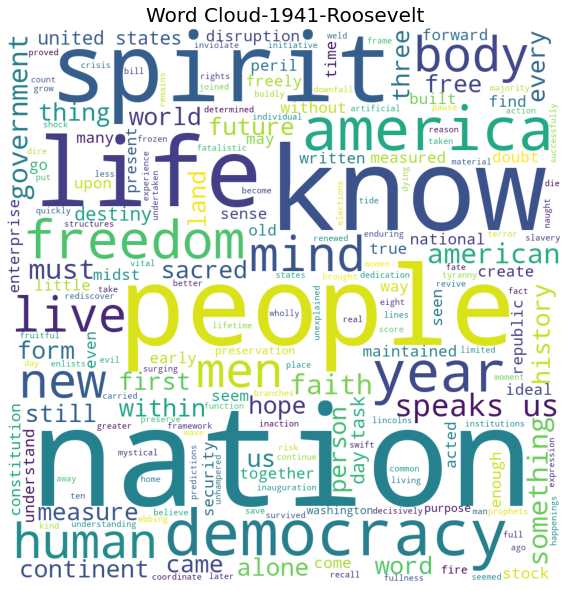

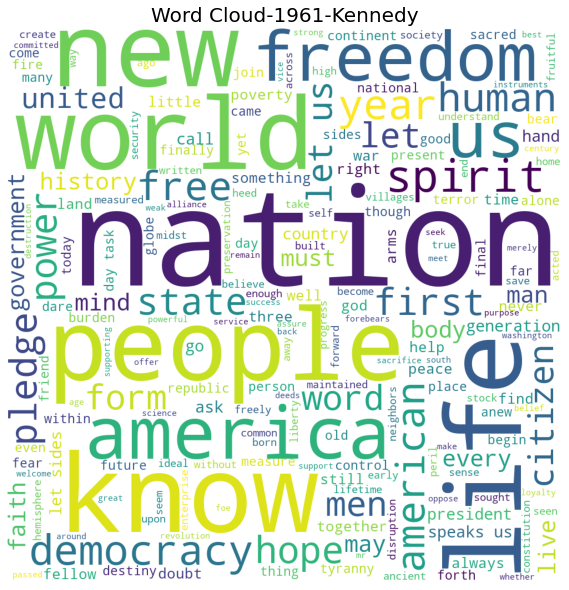

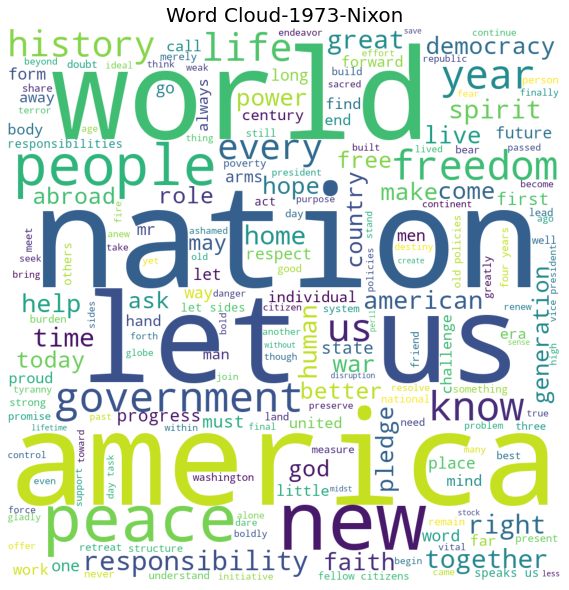

In [ ]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i,doc in speech_df.iterrows(): # iterating in processes features through each sentence
    word_tokens = word_tokenize(doc.Processed_Speech) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

    comment_words = ' ' #empty string
    stop_words = set(STOPWORDS) #stopwords from Wordcloud

    for words in filtered_sentence:
        comment_words = comment_words + words + ' ' #converting to string
          
            
    wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.title('Word Cloud-'+i, size=20)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()